### Javier Delgado Final Project: S&P500 stocks next day price prediction with Artificial Neural Networks machine learning (Deep learning)

- This project is about to predict the future value of S&P500 stocks or a full portfolio.
- The data used to predict will be the same stock with previous closing prices, other stocks previous prices high correlations (positive and negative),  the fixed income market treasury bonds yields past yields and the 3 main stock market indicators past values: NASDAQ, SP500 and DowJones
  - Data: All SP500 stocks, Treasury bond yields and stock markets indexes


In [869]:
import pandas as pd 
import datetime
from datetime import datetime
from datetime import date
from pandas_datareader import data, wb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [870]:
## Getting the data

# First: Getting the symbols of all stocks listed in the S&P 500 with wikipedia

html_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

sp500_stocks_symbols = html_data[0][['Symbol','Security']]
sp500_stocks_symbols.head() 

Symbol             Security
0    MMM           3M Company
1    ABT  Abbott Laboratories
2   ABBV          AbbVie Inc.
3   ABMD          ABIOMED Inc
4    ACN        Accenture plc

In [914]:
# Second : Getting the stock market reporting dates from Jan 2017 to the most recent date of reporting in the NYSE

import pandas_market_calendars as mcal
import datetime
from datetime import datetime
from datetime import date


nyse = mcal.get_calendar('NYSE')
nyse_calendar = nyse.schedule(start_date='2017-01-01', end_date = date.today()).reset_index(level = 0).rename(columns={"index": "Reporting date"})
reporting_dates = nyse_calendar[['Reporting date']]
reporting_dates

Reporting date
0       2017-01-03
1       2017-01-04
2       2017-01-05
3       2017-01-06
4       2017-01-09
..             ...
975     2020-11-16
976     2020-11-17
977     2020-11-18
978     2020-11-19
979     2020-11-20

[980 rows x 1 columns]

In [916]:
# Create the data frame that will contain all S&P 500 closing prices and other economic indexes from Jan 2017 to the last reporting date
financial_historical_data = pd.DataFrame({"Reporting Date": reporting_dates['Reporting date']})
financial_historical_data.tail()

Reporting Date
975     2020-11-16
976     2020-11-17
977     2020-11-18
978     2020-11-19
979     2020-11-20

In [917]:
# Getting all the stocks closing prices for each stock and adding them to the historical data frame

for symbol in sp500_stocks_symbols["Symbol"]:
    
    try:
        stock_data = data.DataReader(symbol, 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]
        financial_historical_data[symbol] = stock_data["Close"]
    except:
        pass
    

financial_historical_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD         ACN  \
0     2017-01-03  178.050003  39.049999  62.410000  112.360001  116.459999   
1     2017-01-04  178.320007  39.360001  63.290001  115.739998  116.739998   
2     2017-01-05  177.710007  39.700001  63.770000  114.809998  114.989998   
3     2017-01-06  178.229996  40.779999  63.790001  115.419998  116.300003   
4     2017-01-09  177.270004  40.740002  64.209999  117.110001  115.000000   

        ATVI        ADBE    AMD         AAP  ...       WYNN        XEL  \
0  36.639999  103.480003  11.43  170.600006  ...  87.459999  40.619999   
1  37.360001  104.139999  11.43  172.000000  ...  90.279999  40.799999   
2  37.939999  105.910004  11.24  171.880005  ...  91.440002  40.799999   
3  37.910000  108.300003  11.32  169.630005  ...  92.430000  40.919998   
4  37.700001  108.570000  11.49  169.529999  ...  92.750000  40.299999   

         XRX       XLNX        XYL        YUM       ZBRA         ZBH  \
0  27.559999  59.070000  49.650002  63.209999  86.250000  103.330002   
1  28.600000  58.639999  50.389999  63.439999  87.029999  104.279999   
2  28.480000  57.930000  49.930000  63.650002  84.750000  104.949997   
3  28.040001  59.049999  49.580002  64.419998  85.959999  104.959999   
4  27.879999  59.060001  49.369999  64.599998  85.970001  107.000000   

        ZION        ZTS  
0  43.180000  53.590000  
1  43.799999  54.110001  
2  43.090000  53.930000  
3  43.369999  54.099998  
4  42.900002  53.950001  

[5 rows x 504 columns]

In [918]:
financial_historical_data.tail()

Reporting Date         MMM         ABT        ABBV        ABMD  \
975     2020-11-16  173.860001  113.669998   98.360001  272.750000   
976     2020-11-17  173.639999  113.059998   99.209999  269.929993   
977     2020-11-18  171.399994  109.769997   98.720001  266.209991   
978     2020-11-19  171.610001  111.000000   99.669998  270.609985   
979     2020-11-20  172.889999  110.889999  100.839996  268.209991   

            ACN       ATVI        ADBE        AMD         AAP  ...       WYNN  \
975  244.949997  77.440002  460.950012  83.730003  151.059998  ...  94.739998   
976  243.820007  77.110001  467.950012  83.360001  149.300003  ...  94.230003   
977  239.729996  75.500000  459.470001  82.540001  148.100006  ...  95.639999   
978  243.199997  75.930000  466.410004  85.540001  146.080002  ...  98.750000   
979  243.440002  76.809998  462.920013  84.639999  144.330002  ...  95.290001   

           XEL        XRX        XLNX        XYL         YUM        ZBRA  \
975  74.709999  22.700001  131.309998  97.389999  104.760002  345.980011   
976  72.629997  22.160000  130.410004  95.949997  104.040001  340.790009   
977  70.500000  21.870001  129.080002  94.980003  104.169998  337.579987   
978  69.349998  21.910000  132.960007  94.370003  105.269997  358.390015   
979  69.309998  21.910000  132.380005  94.379997  104.989998  354.989990   

            ZBH       ZION         ZTS  
975  150.220001  39.750000  165.289993  
976  150.149994  39.599998  165.429993  
977  148.190002  38.939999  163.500000  
978  146.529999  38.389999  166.309998  
979  145.940002  38.279999  166.199997  

[5 rows x 504 columns]

In [919]:
# DROPING STOCKS WITH NULL VALUES IN MY DATA FRAME
financial_historical_data = financial_historical_data.dropna(axis=1, how="any")
financial_historical_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD         ACN  \
0     2017-01-03  178.050003  39.049999  62.410000  112.360001  116.459999   
1     2017-01-04  178.320007  39.360001  63.290001  115.739998  116.739998   
2     2017-01-05  177.710007  39.700001  63.770000  114.809998  114.989998   
3     2017-01-06  178.229996  40.779999  63.790001  115.419998  116.300003   
4     2017-01-09  177.270004  40.740002  64.209999  117.110001  115.000000   

        ATVI        ADBE    AMD         AAP  ...       WYNN        XEL  \
0  36.639999  103.480003  11.43  170.600006  ...  87.459999  40.619999   
1  37.360001  104.139999  11.43  172.000000  ...  90.279999  40.799999   
2  37.939999  105.910004  11.24  171.880005  ...  91.440002  40.799999   
3  37.910000  108.300003  11.32  169.630005  ...  92.430000  40.919998   
4  37.700001  108.570000  11.49  169.529999  ...  92.750000  40.299999   

         XRX       XLNX        XYL        YUM       ZBRA         ZBH  \
0  27.559999  59.070000  49.650002  63.209999  86.250000  103.330002   
1  28.600000  58.639999  50.389999  63.439999  87.029999  104.279999   
2  28.480000  57.930000  49.930000  63.650002  84.750000  104.949997   
3  28.040001  59.049999  49.580002  64.419998  85.959999  104.959999   
4  27.879999  59.060001  49.369999  64.599998  85.970001  107.000000   

        ZION        ZTS  
0  43.180000  53.590000  
1  43.799999  54.110001  
2  43.090000  53.930000  
3  43.369999  54.099998  
4  42.900002  53.950001  

[5 rows x 494 columns]

In [920]:
## Checking Null values in my new historical data frame

print(sum([i for i in financial_historical_data.isna().sum()]))
print(financial_historical_data.shape)

0
(980, 494)


In [921]:
#Getting the 3 main indexes in the US

Nasdaq_index = data.DataReader("^NDX", 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]
SP500_index = data.DataReader("^GSPC", 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]
Dowjones_index = data.DataReader("^DJI", 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]

financial_indexes = pd.DataFrame({'Reporting Date':reporting_dates['Reporting date'], "NASDAQ": Nasdaq_index['Close'], "SP500": SP500_index['Close'], 'DowJones': Dowjones_index['Close']})
financial_indexes.head()

Reporting Date       NASDAQ        SP500      DowJones
0     2017-01-03  4911.330078  2257.830078  19881.759766
1     2017-01-04  4937.209961  2270.750000  19942.160156
2     2017-01-05  4964.950195  2269.000000  19899.289062
3     2017-01-06  5007.080078  2276.979980  19963.800781
4     2017-01-09  5024.899902  2268.899902  19887.380859

In [922]:
financial_indexes.tail()

Reporting Date        NASDAQ        SP500      DowJones
975     2020-11-16  12013.379883  3626.909912  29950.439453
976     2020-11-17  11977.490234  3609.530029  29783.349609
977     2020-11-18  11894.709961  3567.790039  29438.419922
978     2020-11-19  11985.429688  3581.870117  29483.230469
979     2020-11-20  11906.440430  3557.540039  29263.480469

In [923]:
## GETTING FIX INCOME MARKET DATA: Daily Treasury Yield Curve Rates
treasury_yields_list = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

current_year = date.today().year
year = 2017

while year <= current_year:
    
    yields_html_data = pd.read_html(f'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year={str(year)}')[1]
    
    list_iterator = 0 
    while list_iterator <= 12:
        for column in yields_html_data.columns:
            if column == "Date":
                for data in yields_html_data[column]:
                    treasury_yields_list[list_iterator].append(data)
                list_iterator += 1
            else:
                for data in yields_html_data[column]:
                    treasury_yields_list[list_iterator].append(float(data)/100)
                list_iterator += 1
            
    year += 1

treasury_yields = pd.DataFrame({'Reporting Date': treasury_yields_list[0],
                                '1 month Tbond': treasury_yields_list[1],
                                '2 month Tbond': treasury_yields_list[2],
                                '3 month Tbond': treasury_yields_list[3],
                                '6 month Tbond': treasury_yields_list[4],
                                '1 year Tbond': treasury_yields_list[5],
                                '2 year Tbond': treasury_yields_list[6],
                                '3 year Tbond': treasury_yields_list[7],
                                '5 year Tbond': treasury_yields_list[8],
                                '7 year Tbond': treasury_yields_list[9],
                                '10 year Tbond': treasury_yields_list[10],
                                '20 year Tbond': treasury_yields_list[11],
                                '30 year Tbond': treasury_yields_list[12] })
treasury_yields


Reporting Date  1 month Tbond  2 month Tbond  3 month Tbond  \
0         01/03/17         0.0052            NaN         0.0053   
1         01/04/17         0.0049            NaN         0.0053   
2         01/05/17         0.0051            NaN         0.0052   
3         01/06/17         0.0050            NaN         0.0053   
4         01/09/17         0.0050            NaN         0.0050   
..             ...            ...            ...            ...   
969       11/16/20         0.0009         0.0010         0.0009   
970       11/17/20         0.0008         0.0008         0.0009   
971       11/18/20         0.0007         0.0009         0.0009   
972       11/19/20         0.0008         0.0008         0.0007   
973       11/20/20         0.0009         0.0009         0.0007   

     6 month Tbond  1 year Tbond  2 year Tbond  3 year Tbond  5 year Tbond  \
0           0.0065        0.0089        0.0122        0.0150        0.0194   
1           0.0063        0.0087        0.0124        0.0150        0.0194   
2           0.0062        0.0083        0.0117        0.0143        0.0186   
3           0.0061        0.0085        0.0122        0.0150        0.0192   
4           0.0060        0.0082        0.0121        0.0147        0.0189   
..             ...           ...           ...           ...           ...   
969         0.0012        0.0012        0.0019        0.0024        0.0041   
970         0.0010        0.0012        0.0018        0.0022        0.0039   
971         0.0010        0.0011        0.0016        0.0022        0.0040   
972         0.0010        0.0011        0.0018        0.0022        0.0039   
973         0.0010        0.0011        0.0016        0.0021        0.0038   

     7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  
0          0.0226         0.0245         0.0278         0.0304  
1          0.0226         0.0246         0.0278         0.0305  
2          0.0218         0.0237         0.0269         0.0296  
3          0.0223         0.0242         0.0273         0.0300  
4          0.0218         0.0238         0.0269         0.0297  
..            ...            ...            ...            ...  
969        0.0066         0.0091         0.0144         0.0166  
970        0.0063         0.0087         0.0140         0.0162  
971        0.0064         0.0088         0.0142         0.0162  
972        0.0063         0.0086         0.0138         0.0158  
973        0.0062         0.0083         0.0133         0.0153  

[974 rows x 13 columns]

In [924]:
# CONVERTING ALL DATES (STRING FORMATS) INTO TIMESTAMP

financial_historical_data['Reporting Date'] = pd.to_datetime(financial_historical_data['Reporting Date'])
treasury_yields['Reporting Date'] = pd.to_datetime(treasury_yields['Reporting Date'])
financial_indexes['Reporting Date'] = pd.to_datetime(financial_indexes['Reporting Date'])

for i in financial_historical_data['Reporting Date'][0:1]:
    print("SP500 Dates: ", type(i))
print('-------')
for i in treasury_yields['Reporting Date'][0:1]:
    print("Treasury Dates: ", type(i))
print('-------')
for i in financial_indexes['Reporting Date'][0:1]:
    print("indexes Dates: ", type(i))
print('-------')

SP500 Dates:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------
Treasury Dates:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------
indexes Dates:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------


In [925]:
## JOIN THE 3 DATA FRAMES INTO ONE TO GET OUR FINAL DATA FRAME

final_finacial_data = pd.merge(pd.merge(financial_historical_data,treasury_yields,how = "left", on = 'Reporting Date'), financial_indexes, how = "left", on = 'Reporting Date')
final_finacial_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD         ACN  \
0     2017-01-03  178.050003  39.049999  62.410000  112.360001  116.459999   
1     2017-01-04  178.320007  39.360001  63.290001  115.739998  116.739998   
2     2017-01-05  177.710007  39.700001  63.770000  114.809998  114.989998   
3     2017-01-06  178.229996  40.779999  63.790001  115.419998  116.300003   
4     2017-01-09  177.270004  40.740002  64.209999  117.110001  115.000000   

        ATVI        ADBE    AMD         AAP  ...  2 year Tbond  3 year Tbond  \
0  36.639999  103.480003  11.43  170.600006  ...        0.0122        0.0150   
1  37.360001  104.139999  11.43  172.000000  ...        0.0124        0.0150   
2  37.939999  105.910004  11.24  171.880005  ...        0.0117        0.0143   
3  37.910000  108.300003  11.32  169.630005  ...        0.0122        0.0150   
4  37.700001  108.570000  11.49  169.529999  ...        0.0121        0.0147   

   5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  \
0        0.0194        0.0226         0.0245         0.0278         0.0304   
1        0.0194        0.0226         0.0246         0.0278         0.0305   
2        0.0186        0.0218         0.0237         0.0269         0.0296   
3        0.0192        0.0223         0.0242         0.0273         0.0300   
4        0.0189        0.0218         0.0238         0.0269         0.0297   

        NASDAQ        SP500      DowJones  
0  4911.330078  2257.830078  19881.759766  
1  4937.209961  2270.750000  19942.160156  
2  4964.950195  2269.000000  19899.289062  
3  5007.080078  2276.979980  19963.800781  
4  5024.899902  2268.899902  19887.380859  

[5 rows x 509 columns]

In [926]:
#Checking all the null values in my joined data frame
sum([i for i in final_finacial_data.isna().sum()])

532

In [927]:
# Since Stock prices data frame and indexes data frame have the same shape, the treasury bonds part probably will have all the missing values

test_null = final_finacial_data[['1 month Tbond','2 month Tbond','3 month Tbond','6 month Tbond','1 year Tbond','2 year Tbond','3 year Tbond','5 year Tbond','7 year Tbond',
                     '10 year Tbond','20 year Tbond','30 year Tbond','NASDAQ','SP500','DowJones']]
test_null.info()
                                

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 15 columns):
1 month Tbond    973 non-null float64
2 month Tbond    525 non-null float64
3 month Tbond    973 non-null float64
6 month Tbond    973 non-null float64
1 year Tbond     973 non-null float64
2 year Tbond     973 non-null float64
3 year Tbond     973 non-null float64
5 year Tbond     973 non-null float64
7 year Tbond     973 non-null float64
10 year Tbond    973 non-null float64
20 year Tbond    973 non-null float64
30 year Tbond    973 non-null float64
NASDAQ           980 non-null float64
SP500            980 non-null float64
DowJones         980 non-null float64
dtypes: float64(15)
memory usage: 122.5 KB


In [928]:
#Getting rid of the 2 months treasury bond column and counting nulls again
final_finacial_data = final_finacial_data.drop(['2 month Tbond'],axis = 1)
sum([i for i in final_finacial_data.isna().sum()])


77

In [929]:
# USING THE mean to fill nthe last null values
final_finacial_data = final_finacial_data.fillna(final_finacial_data.mean())
print(sum([i for i in final_finacial_data.isna().sum()]))

0


In [1874]:
## FINAL DATA FRAME
final_finacial_data

Reporting Date         MMM         ABT        ABBV        ABMD  \
0       2017-01-03  178.050003   39.049999   62.410000  112.360001   
1       2017-01-04  178.320007   39.360001   63.290001  115.739998   
2       2017-01-05  177.710007   39.700001   63.770000  114.809998   
3       2017-01-06  178.229996   40.779999   63.790001  115.419998   
4       2017-01-09  177.270004   40.740002   64.209999  117.110001   
..             ...         ...         ...         ...         ...   
975     2020-11-16  173.860001  113.669998   98.360001  272.750000   
976     2020-11-17  173.639999  113.059998   99.209999  269.929993   
977     2020-11-18  171.399994  109.769997   98.720001  266.209991   
978     2020-11-19  171.610001  111.000000   99.669998  270.609985   
979     2020-11-20  172.889999  110.889999  100.839996  268.209991   

            ACN       ATVI        ADBE        AMD         AAP  ...  \
0    116.459999  36.639999  103.480003  11.430000  170.600006  ...   
1    116.739998  37.360001  104.139999  11.430000  172.000000  ...   
2    114.989998  37.939999  105.910004  11.240000  171.880005  ...   
3    116.300003  37.910000  108.300003  11.320000  169.630005  ...   
4    115.000000  37.700001  108.570000  11.490000  169.529999  ...   
..          ...        ...         ...        ...         ...  ...   
975  244.949997  77.440002  460.950012  83.730003  151.059998  ...   
976  243.820007  77.110001  467.950012  83.360001  149.300003  ...   
977  239.729996  75.500000  459.470001  82.540001  148.100006  ...   
978  243.199997  75.930000  466.410004  85.540001  146.080002  ...   
979  243.440002  76.809998  462.920013  84.639999  144.330002  ...   

     2 year Tbond  3 year Tbond  5 year Tbond  7 year Tbond  10 year Tbond  \
0          0.0122        0.0150        0.0194        0.0226         0.0245   
1          0.0124        0.0150        0.0194        0.0226         0.0246   
2          0.0117        0.0143        0.0186        0.0218         0.0237   
3          0.0122        0.0150        0.0192        0.0223         0.0242   
4          0.0121        0.0147        0.0189        0.0218         0.0238   
..            ...           ...           ...           ...            ...   
975        0.0019        0.0024        0.0041        0.0066         0.0091   
976        0.0018        0.0022        0.0039        0.0063         0.0087   
977        0.0016        0.0022        0.0040        0.0064         0.0088   
978        0.0018        0.0022        0.0039        0.0063         0.0086   
979        0.0016        0.0021        0.0038        0.0062         0.0083   

     20 year Tbond  30 year Tbond        NASDAQ        SP500      DowJones  
0           0.0278         0.0304   4911.330078  2257.830078  19881.759766  
1           0.0278         0.0305   4937.209961  2270.750000  19942.160156  
2           0.0269         0.0296   4964.950195  2269.000000  19899.289062  
3           0.0273         0.0300   5007.080078  2276.979980  19963.800781  
4           0.0269         0.0297   5024.899902  2268.899902  19887.380859  
..             ...            ...           ...          ...           ...  
975         0.0144         0.0166  12013.379883  3626.909912  29950.439453  
976         0.0140         0.0162  11977.490234  3609.530029  29783.349609  
977         0.0142         0.0162  11894.709961  3567.790039  29438.419922  
978         0.0138         0.0158  11985.429688  3581.870117  29483.230469  
979         0.0133         0.0153  11906.440430  3557.540039  29263.480469  

[980 rows x 508 columns]

In [931]:
final_finacial_data.describe()

MMM         ABT        ABBV        ABMD         ACN        ATVI  \
count  980.000000  980.000000  980.000000  980.000000  980.000000  980.000000   
mean   189.331765   71.434857   84.844347  241.269459  168.650551   61.294500   
std     26.677308   18.391843   13.071893   88.119964   32.823983   12.297556   
min    117.870003   39.049999   60.000000  104.099998  113.209999   36.639999   
25%    166.625004   56.897500   73.917500  168.035000  147.139996   49.344999   
50%    191.595001   70.755001   86.959999  238.464996  162.919998   61.330002   
75%    208.107502   84.902502   94.247498  301.839996  192.407505   71.482500   
max    258.630005  114.419998  123.209999  449.750000  247.179993   86.839996   

             ADBE         AMD         AAP         AES  ...  2 year Tbond  \
count  980.000000  980.000000  980.000000  980.000000  ...    980.000000   
mean   262.865970   29.689633  139.818776   14.367908  ...      0.016084   
std    100.260887   20.906153   25.010106    3.043840  ...      0.008375   
min    103.480003    9.530000   75.029999    9.560000  ...      0.001100   
25%    182.300003   13.072500  118.860001   11.400000  ...      0.012675   
50%    257.000000   23.190000  146.904999   13.840000  ...      0.016100   
75%    306.390007   39.447499  158.787498   16.912500  ...      0.023425   
max    533.799988   92.180000  184.720001   21.370001  ...      0.029800   

       3 year Tbond  5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  \
count    980.000000    980.000000    980.000000     980.000000     980.000000   
mean       0.016785      0.018228      0.019782       0.020976       0.023783   
std        0.008382      0.008301      0.008041       0.007752       0.006616   
min        0.001000      0.001900      0.003600       0.005200       0.008700   
25%        0.014400      0.015500      0.016300       0.017200       0.020000   
50%        0.016350      0.018850      0.021500       0.023300       0.026200   
75%        0.024200      0.025200      0.026200       0.027200       0.028900   
max        0.030500      0.030900      0.031800       0.032400       0.033700   

       30 year Tbond        NASDAQ        SP500      DowJones  
count     980.000000    980.000000   980.000000    980.000000  
mean        0.025584   7536.469566  2809.083488  24884.183982  
std         0.006351   1693.145212   311.246717   2439.533346  
min         0.009900   4911.330078  2237.399902  18591.929688  
25%         0.021775   6385.502563  2582.074890  23432.452637  
50%         0.028400   7243.494873  2789.255005  25284.745117  
75%         0.030300   8169.885010  2987.072449  26555.677734  
max         0.034600  12420.540039  3626.909912  29950.439453  

[8 rows x 507 columns]

### Exploratory data analysis

- Top 20 stocks with highest returns in 2020?
- Top 20 stocks with lowest returns in 2020?
- Top 20 stocks with the highest price change from jan-1 2020 to nov 6 2020
- Top 20 stocks with the lowest price change from jan-1 2020 to nov 6 2020
- Buiding Visualization of the 3 main indexes and the treasury bond yields
- Choosing 5 stocks and create the visualizations
- Getting the top 15 stocks which correlate the most with each stoack in our porfolio

In [932]:
# Creates a data frame that will contain all the daily returns in my data frame

Data_returns = final_finacial_data.set_index("Reporting Date").pct_change()
Data_returns = Data_returns.reset_index()
Data_returns.head()

Reporting Date       MMM       ABT      ABBV      ABMD       ACN      ATVI  \
0     2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1     2017-01-04  0.001516  0.007939  0.014100  0.030082  0.002404  0.019651   
2     2017-01-05 -0.003421  0.008638  0.007584 -0.008035 -0.014991  0.015525   
3     2017-01-06  0.002926  0.027204  0.000314  0.005313  0.011392 -0.000791   
4     2017-01-09 -0.005386 -0.000981  0.006584  0.014642 -0.011178 -0.005539   

       ADBE       AMD       AAP  ...  2 year Tbond  3 year Tbond  \
0       NaN       NaN       NaN  ...           NaN           NaN   
1  0.006378  0.000000  0.008206  ...      0.016393      0.000000   
2  0.016996 -0.016623 -0.000698  ...     -0.056452     -0.046667   
3  0.022566  0.007117 -0.013091  ...      0.042735      0.048951   
4  0.002493  0.015018 -0.000590  ...     -0.008197     -0.020000   

   5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  \
0           NaN           NaN            NaN            NaN            NaN   
1      0.000000      0.000000       0.004082       0.000000       0.003289   
2     -0.041237     -0.035398      -0.036585      -0.032374      -0.029508   
3      0.032258      0.022936       0.021097       0.014870       0.013514   
4     -0.015625     -0.022422      -0.016529      -0.014652      -0.010000   

     NASDAQ     SP500  DowJones  
0       NaN       NaN       NaN  
1  0.005269  0.005722  0.003038  
2  0.005619 -0.000771 -0.002150  
3  0.008485  0.003517  0.003242  
4  0.003559 -0.003549 -0.003828  

[5 rows x 508 columns]

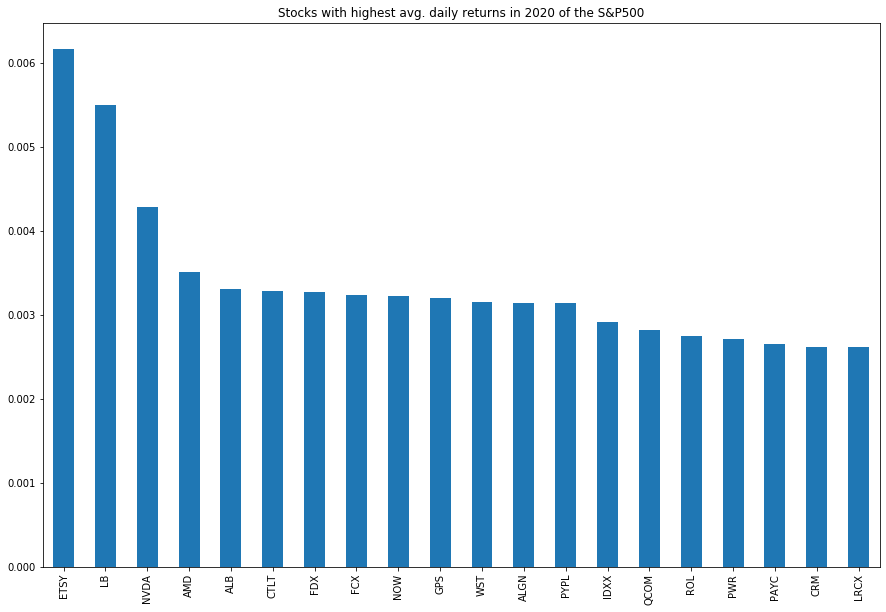

In [933]:
# Top 20 stocks with highest daily average returns

Data_returns_2020 = Data_returns[Data_returns["Reporting Date"] >= "2020-01-01"]

plt.figure(figsize = [15,10])
plt.title("Stocks with highest avg. daily returns in 2020 of the S&P500")
Data_returns_2020.drop(['Reporting Date'],axis = 1).iloc[:, 0:492].mean().sort_values(ascending = False).head(20).plot(kind = "bar")


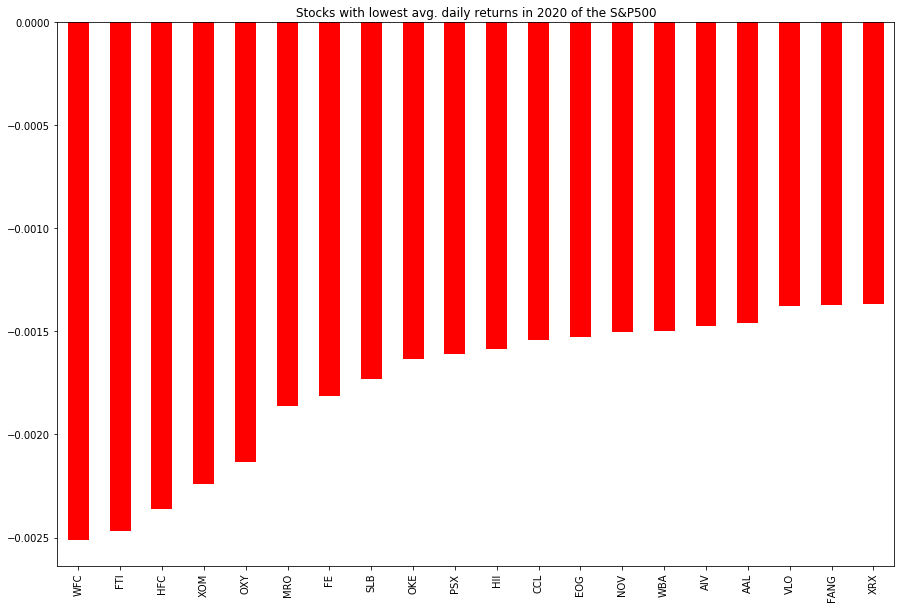

In [934]:
# Top 20 stocks with highest lowest average returns

Data_returns_2020 = Data_returns[Data_returns["Reporting Date"] >= "2020-01-01"]

plt.figure(figsize = [15,10])
plt.title("Stocks with lowest avg. daily returns in 2020 of the S&P500")
Data_returns_2020.drop(['Reporting Date'],axis = 1).iloc[:, 0:492].mean().sort_values(ascending = True).head(20).plot(kind = "bar", color = "red")


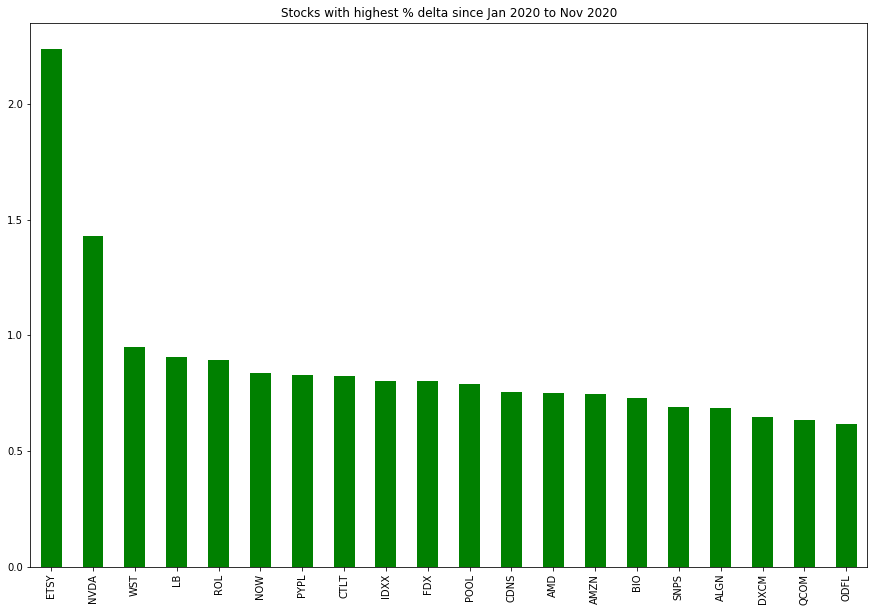

In [935]:
# Top 20 stocks with the highest price change from jan-1 2020 to nov 6 2020

Prices_deltas_2020 = final_finacial_data[(final_finacial_data["Reporting Date"] == "2020-01-02") | (final_finacial_data["Reporting Date"] == "2020-11-06")]
plt.figure(figsize = [15,10])
plt.title("Stocks with highest % delta since Jan 2020 to Nov 2020")
Prices_deltas_2020.drop(['Reporting Date'],axis = 1).iloc[:,0:492].pct_change().iloc[1:2,:].sum().sort_values(ascending = False).head(20).plot(kind = "bar" ,color = "green")

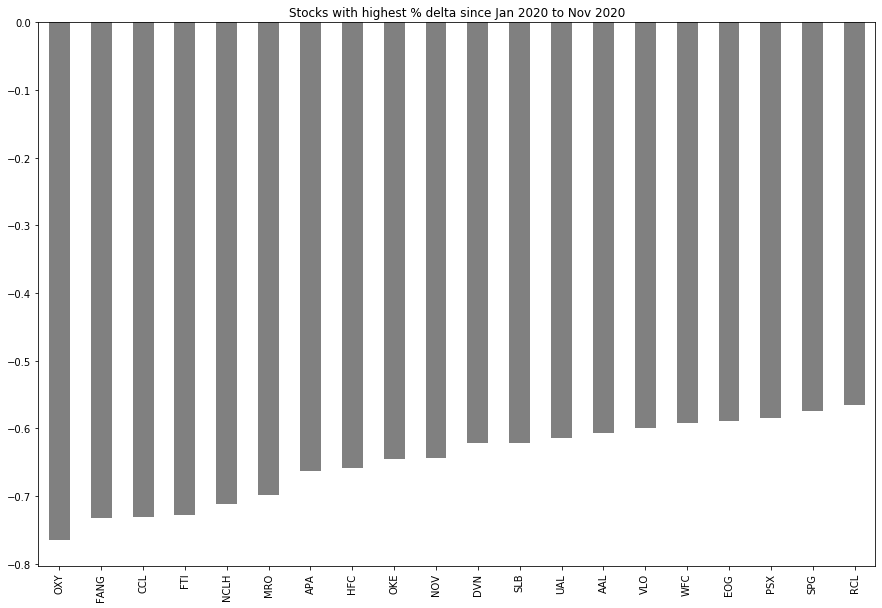

In [936]:
# Top 20 stocks with the lowest price change from jan-1 2020 to nov 6 2020

Prices_deltas_2020 = final_finacial_data[(final_finacial_data["Reporting Date"] == "2020-01-02") | (final_finacial_data["Reporting Date"] == "2020-11-06")]
plt.figure(figsize = [15,10])
plt.title("Stocks with highest % delta since Jan 2020 to Nov 2020")
Prices_deltas_2020.drop(['Reporting Date'],axis = 1).iloc[:,0:492].pct_change().iloc[1:2,:].sum().sort_values(ascending = True).head(20).plot(kind = "bar" ,color = "grey")

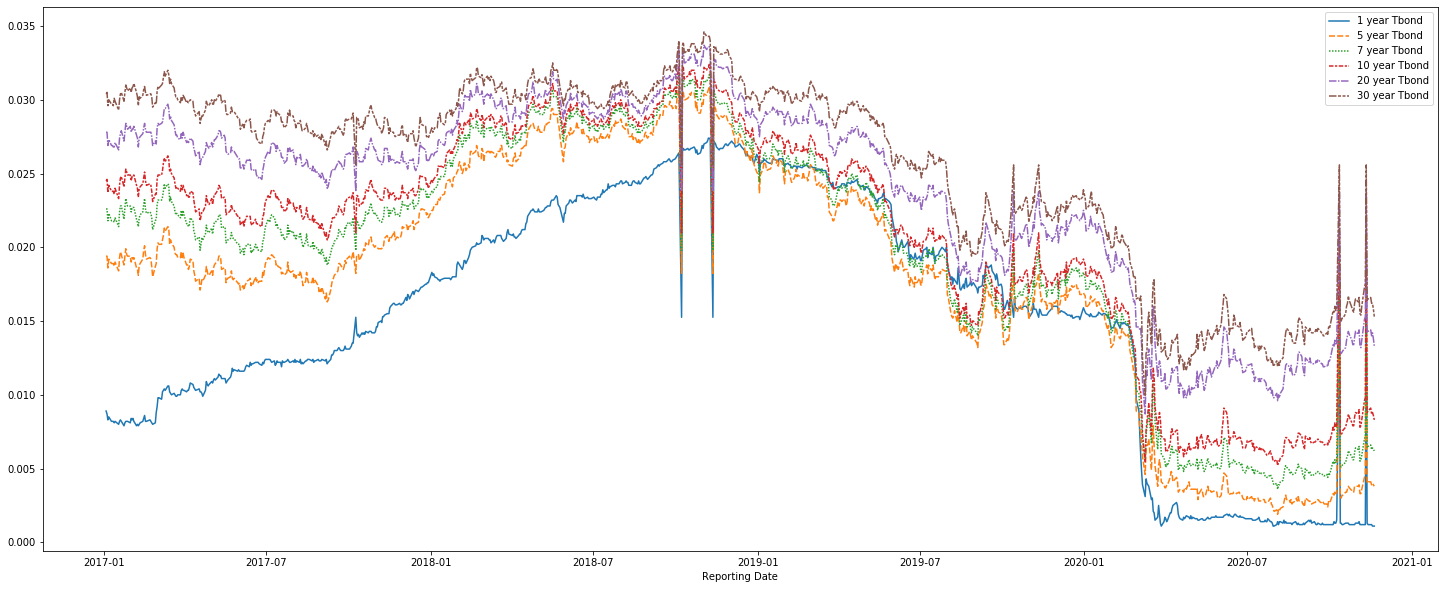

In [937]:
# EXPLANATION OF THE US ECONOMY WITH THE 3 MAIN INDEXES AND TREASURY BONDS YIEDS
plt.figure(figsize = [25,10])
sns.lineplot(data = final_finacial_data.set_index("Reporting Date")[['1 year Tbond','5 year Tbond','7 year Tbond','10 year Tbond','20 year Tbond','30 year Tbond']])

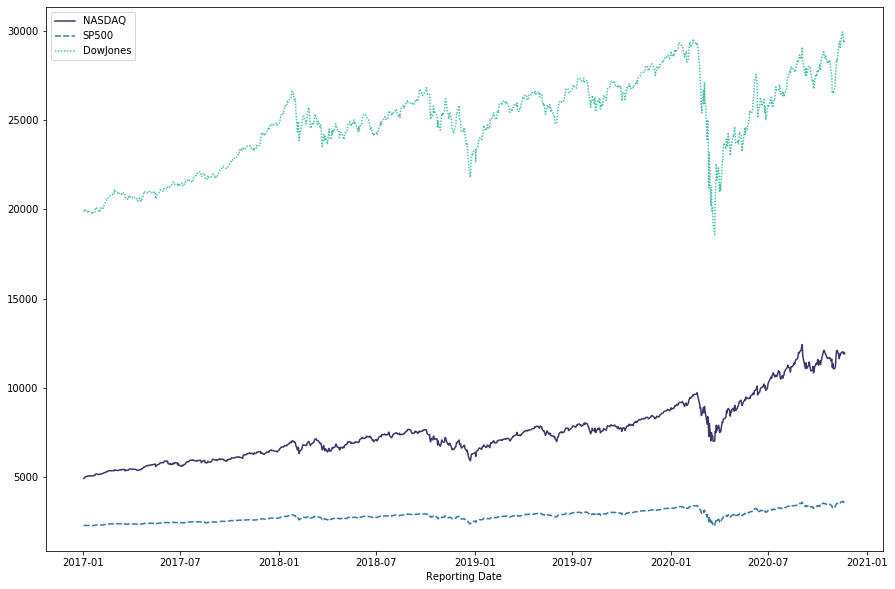

In [938]:
# EXPLANATION OF THE US ECONOMY WITH THE 3 MAIN INDEXES AND TREASURY BONDS YIEDS
plt.figure(figsize = [15,10])
sns.lineplot(data = final_finacial_data.set_index("Reporting Date")[['NASDAQ', 'SP500', 'DowJones']], palette ="mako")

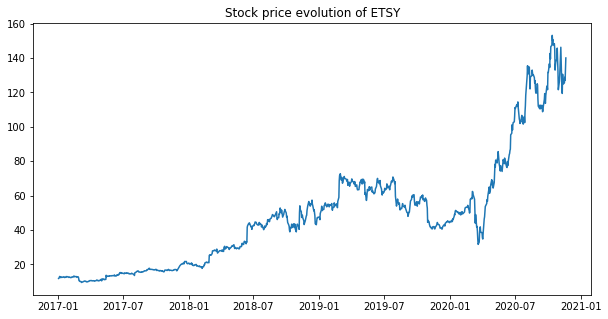

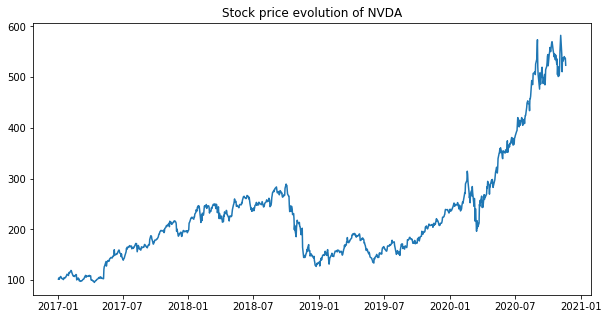

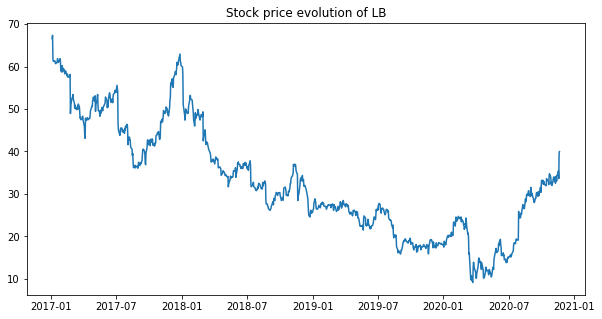

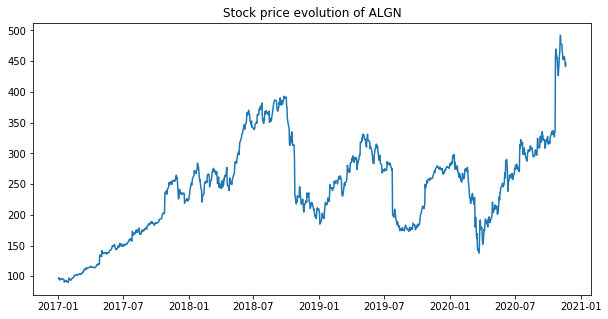

In [939]:
# Getting the the line chartwith the data frame of the top 5 performers stocks : ETYS,  NVDA, LB, AMD, ALGN
my_stocks = ['ETSY',  'NVDA', 'LB', 'ALGN']

for ps in my_stocks:
    plt.figure(figsize = [10,5])
    plt.title(f'Stock price evolution of {ps}')
    sns.lineplot(data = final_finacial_data.set_index("Reporting Date")[ps], palette ="mako")
    plt.show()
    

In [1875]:
## CREATING A FUNCTION THAT WILL SHOW A PLOT OF COORELED SECURITIES FOR EDA

def correlated_stocks(stock, number_of_securities):

    #for stock in my_stocks:  ## LEST MAKE IT A FUNCTION :)

    stock_symbol = [] 
    stock_correl = []

    for symbol in [str(i) for i in final_finacial_data.columns if i != 'Reporting Date']:

        if symbol == stock:
             correl_with_stock = 1
        else:
            correl_with_stock = [i for i in final_finacial_data[[stock,symbol]].corr()[stock]][1]
            
        stock_symbol.append(symbol)
        stock_correl.append(correl_with_stock)

    high = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = False).head(number_of_securities)
    low = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = True).head(number_of_securities)
    correlations = pd.concat([high,low])

    plt.figure(figsize = [20,8])
    plt.title(f'Stock indexes and bonds that have high correlation with {stock}')
    sns.barplot(data= correlations, x = "Symbol", y =  "Correlation")


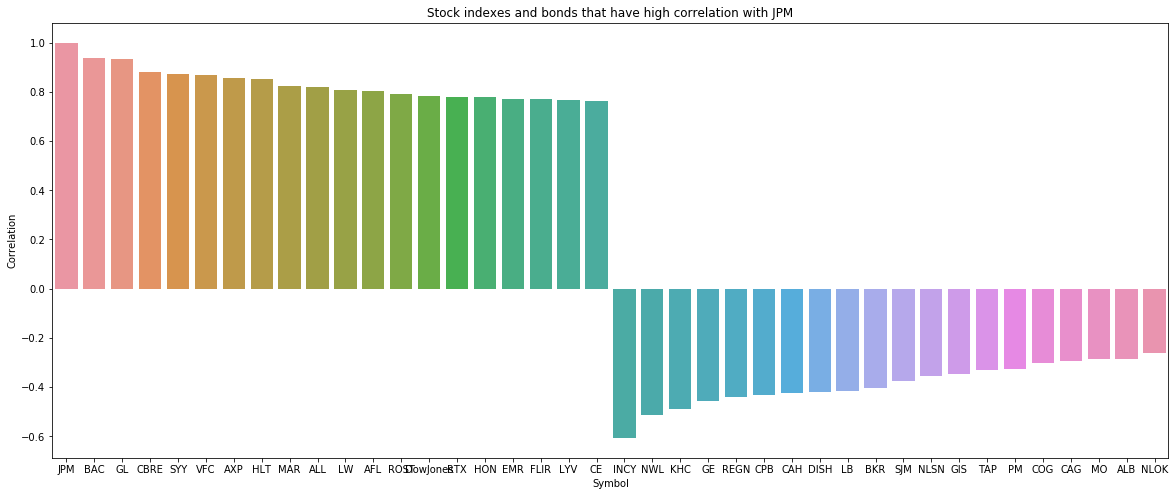

In [1492]:
correlated_stocks("JPM", 20)

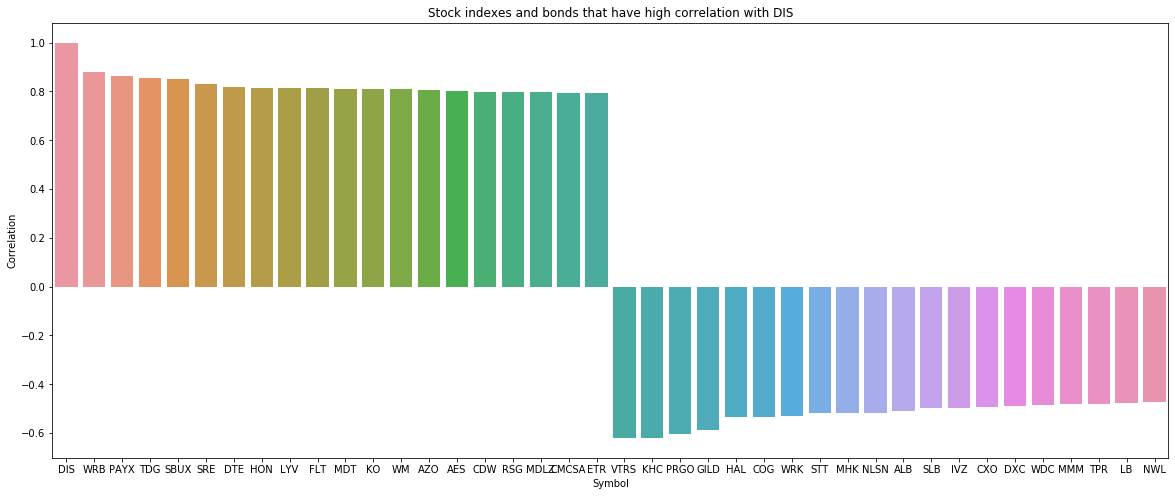

In [1691]:
correlated_stocks("DIS", 20)

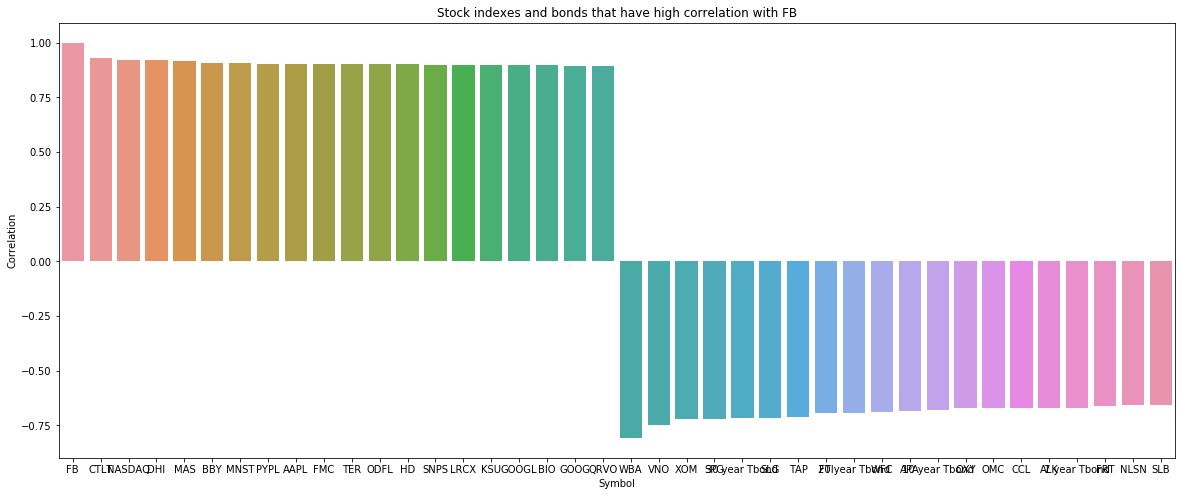

In [1692]:
correlated_stocks("FB", 20)

In [1693]:
# Created a function to see the evolution of 2 stocks and prove high or low correlation

In [1694]:
def stock_correlation_evolution(stock, number_of_securities):
    
    stock_symbol = [] 
    stock_correl = []

    stock_symbols_timeline = []


    for symbol in [str(i) for i in final_finacial_data.columns if i != 'Reporting Date']:

        if symbol == stock:
             correl_with_stock = 1
        else:
            correl_with_stock = [i for i in final_finacial_data[[stock,symbol]].corr()[stock]][1]
        
        stock_symbol.append(symbol)
        stock_correl.append(correl_with_stock)

    high = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = False).head(number_of_securities)
    low = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = True).head(number_of_securities)
    correlations = pd.concat([high,low])
    
    for i in correlations['Symbol']:
        corr_data_frame = final_finacial_data[['Reporting Date',stock,i]].set_index('Reporting Date')
        ax = corr_data_frame.plot(y= stock, figsize = [20,8])
        ax1 = ax.twinx()
        corr_data_frame.plot(y= i,ax=ax1, color='r', figsize = [20,8], title= f'Prices evolution of {stock} (blue line) with {i} (red line)')
        plt.legend(loc='upper center')

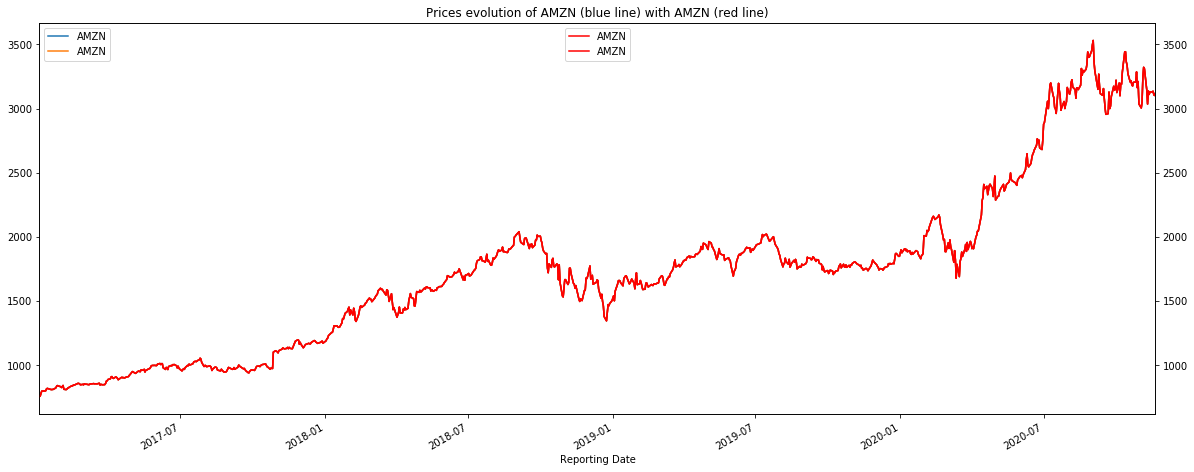

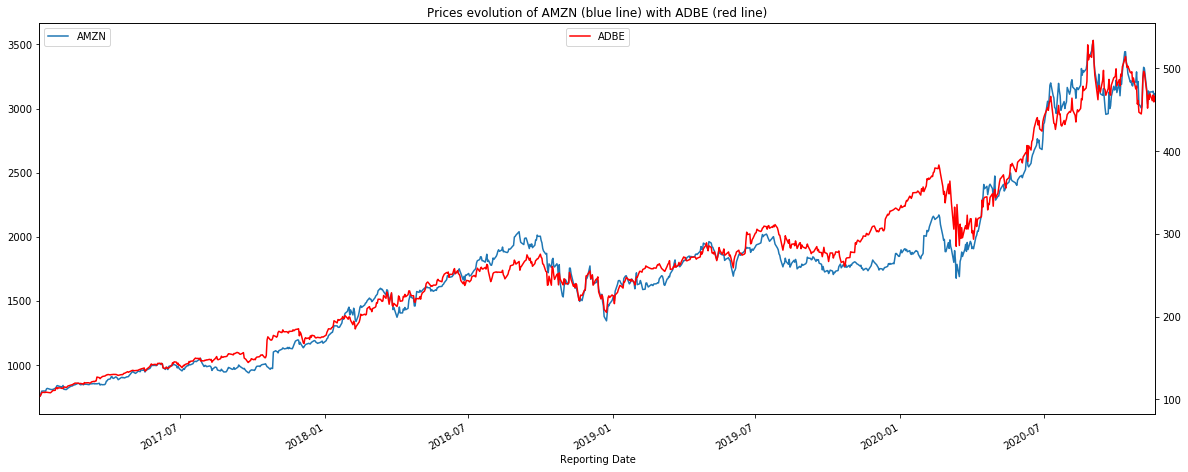

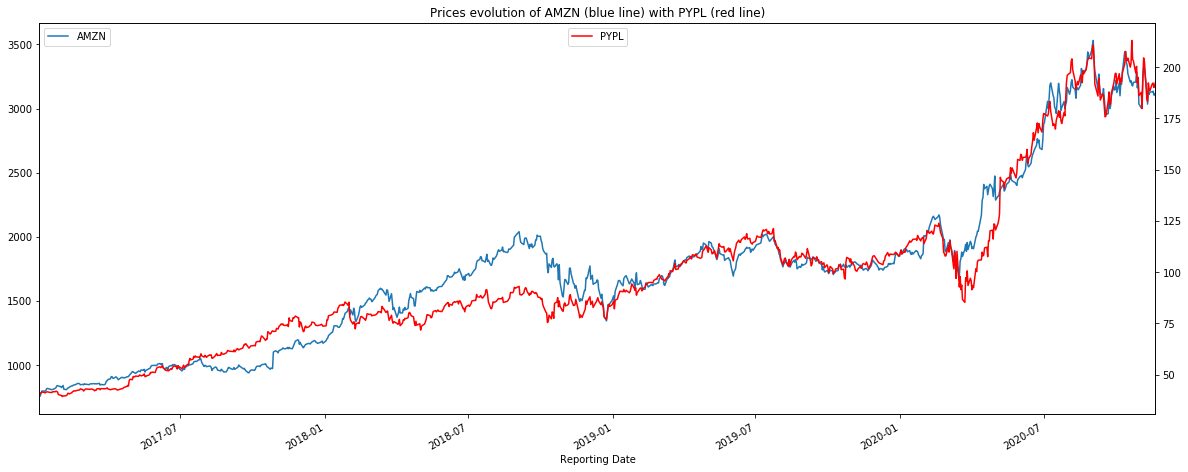

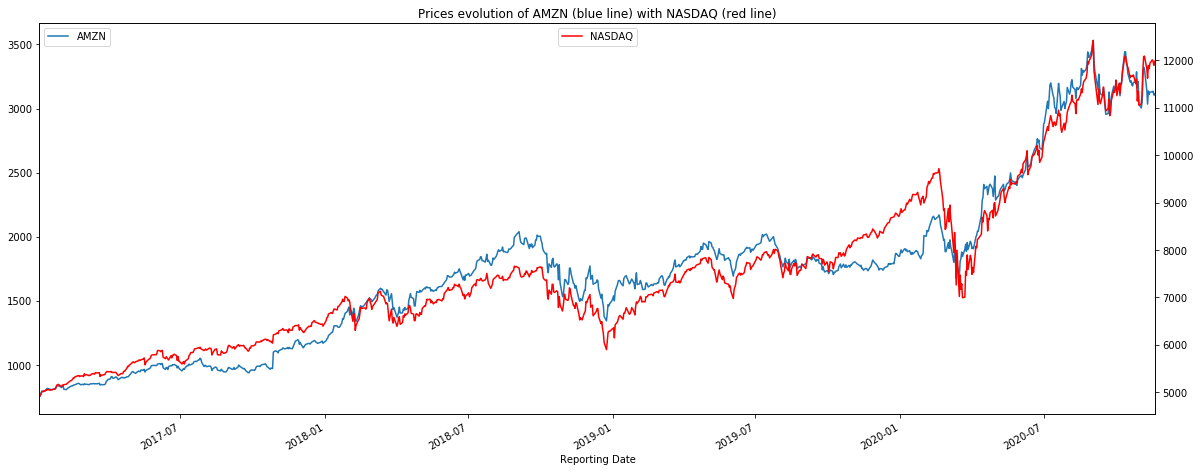

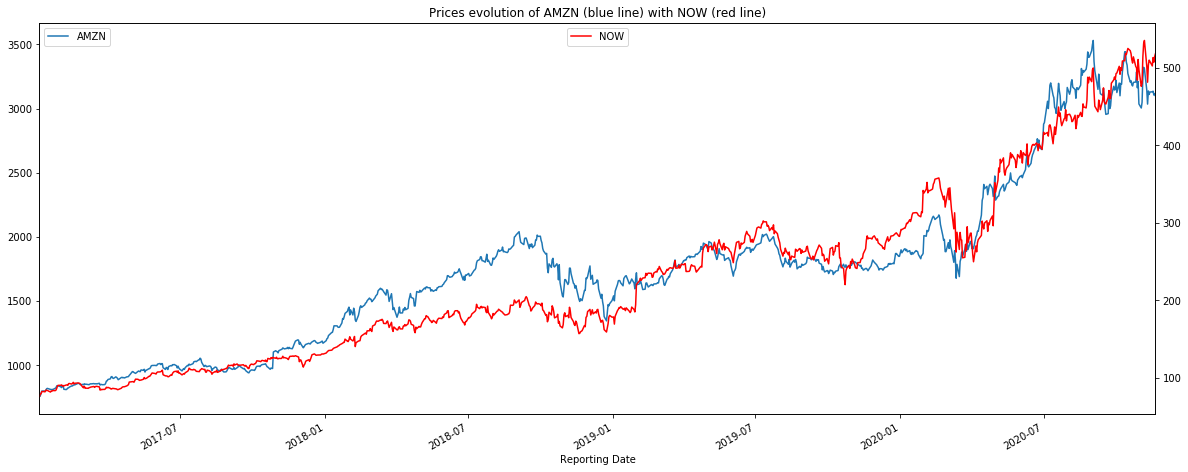

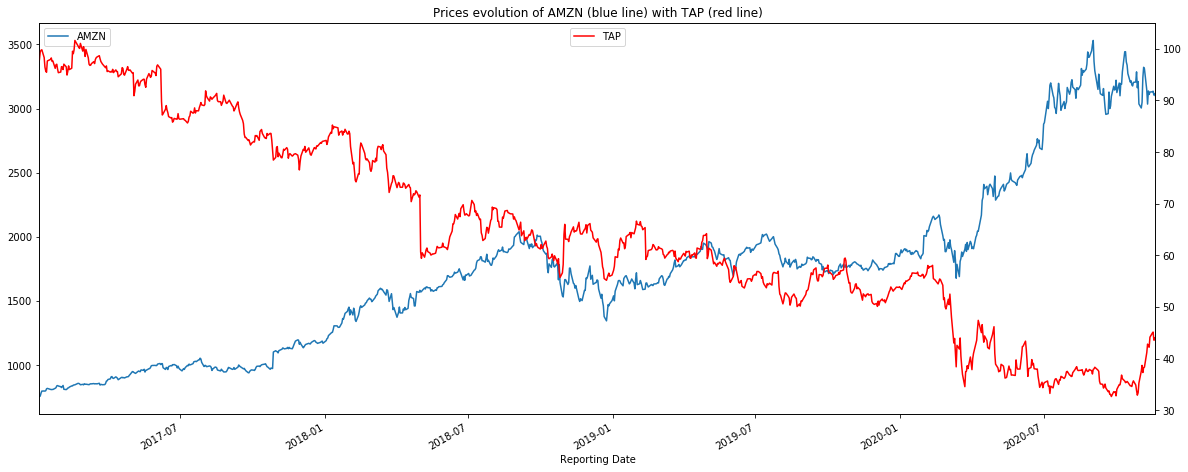

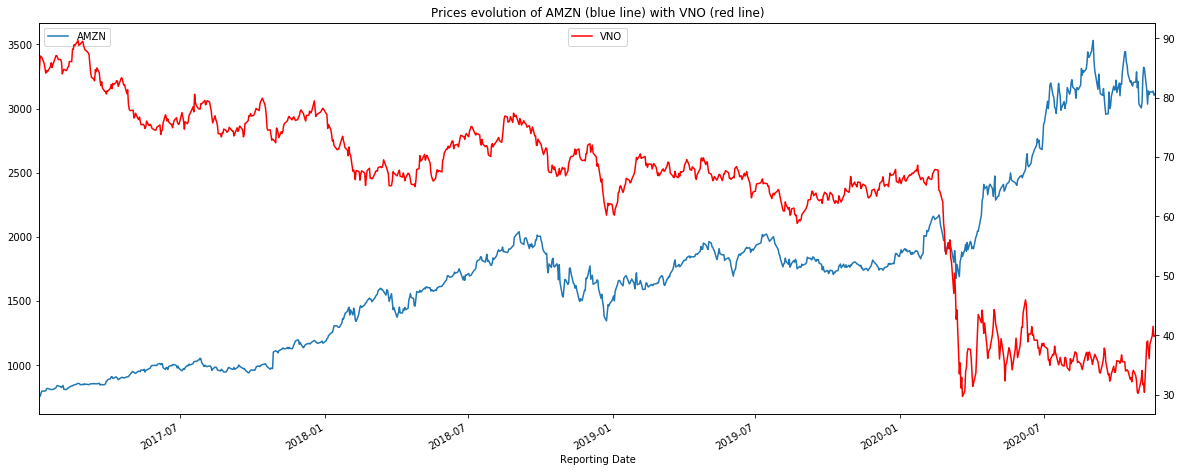

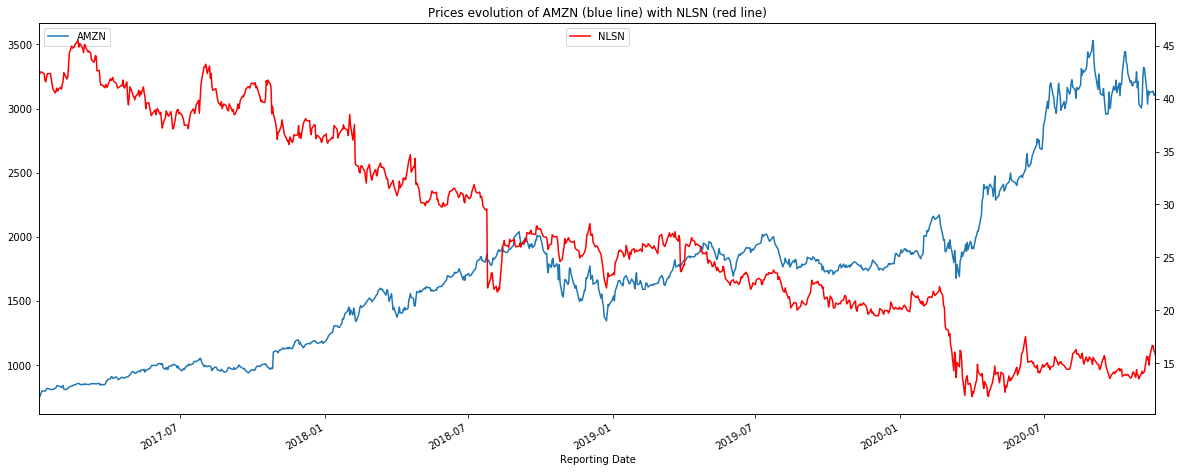

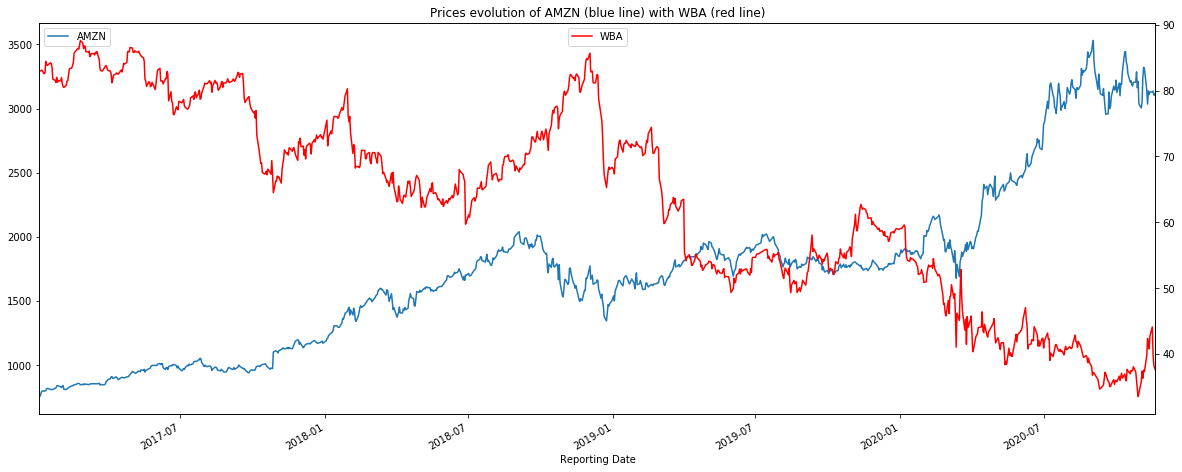

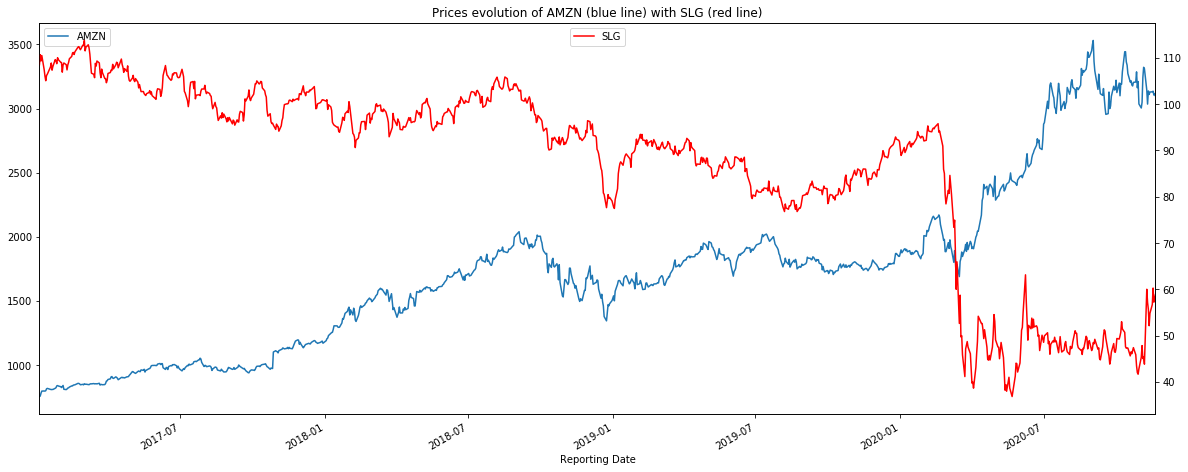

In [1695]:
# EXAMPLE WITH APPLE AND TOP 5 highest and lowest securities in terms of correlation
stock_correlation_evolution("AMZN", 5)

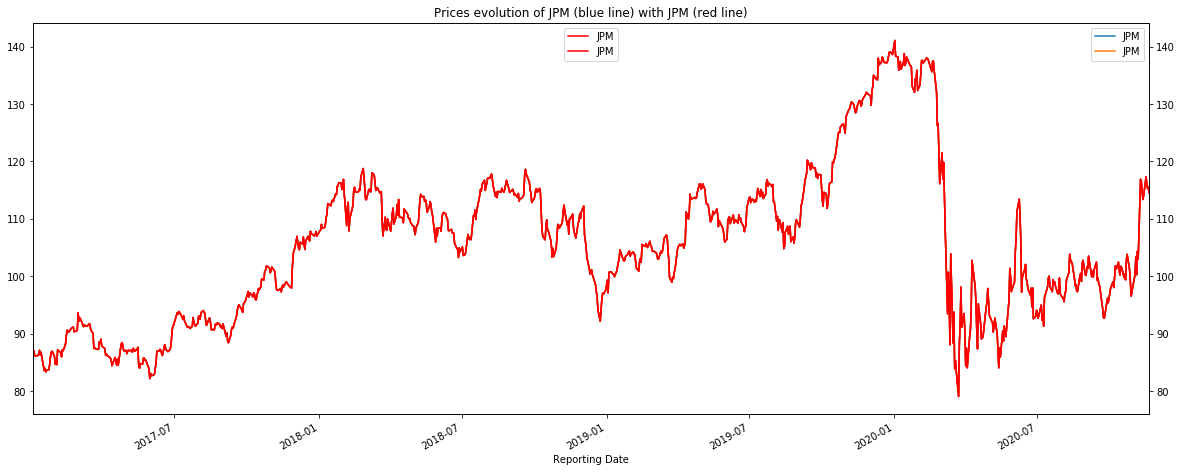

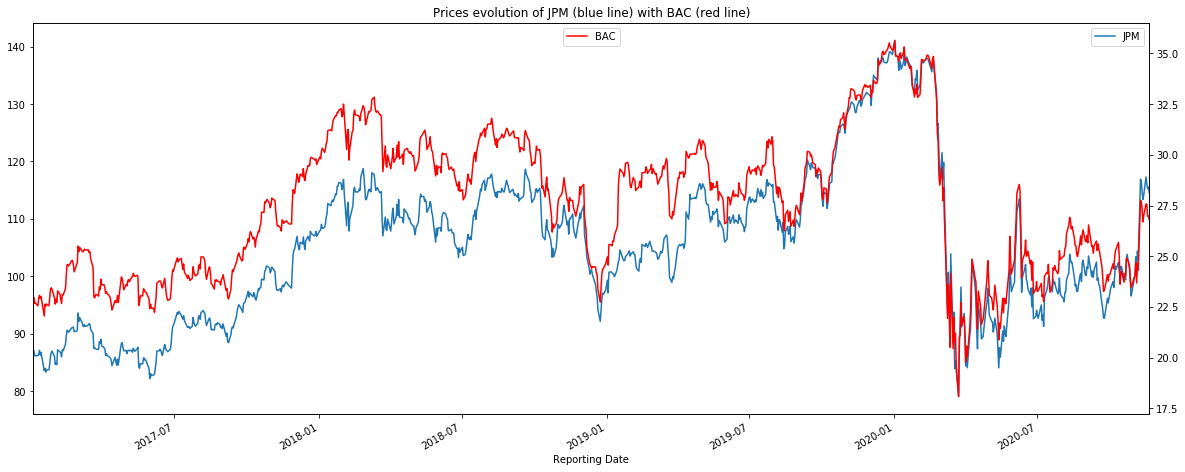

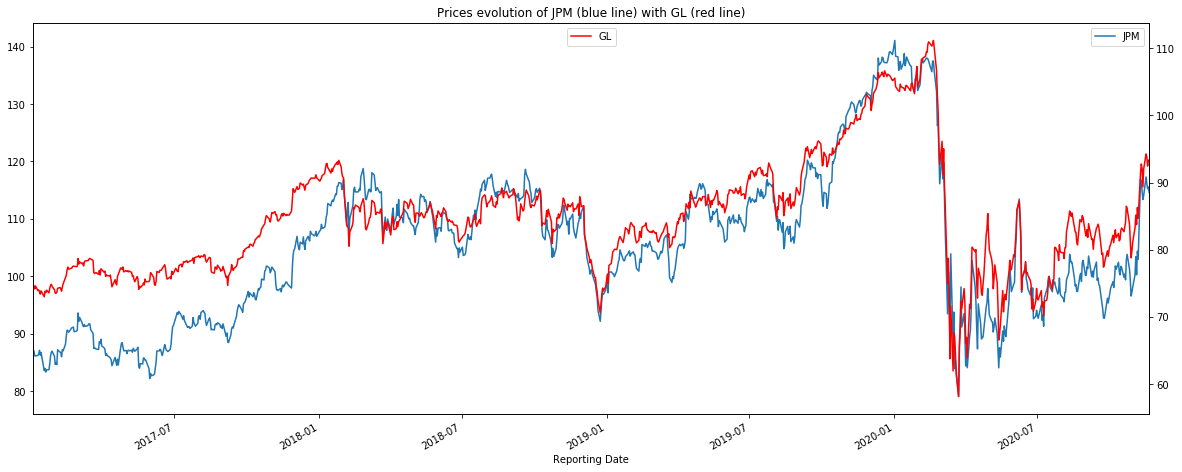

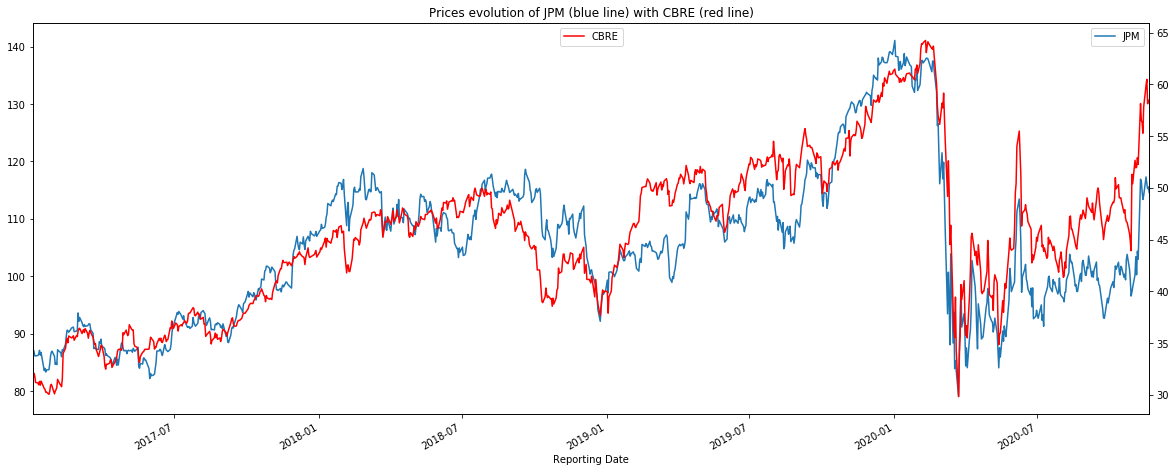

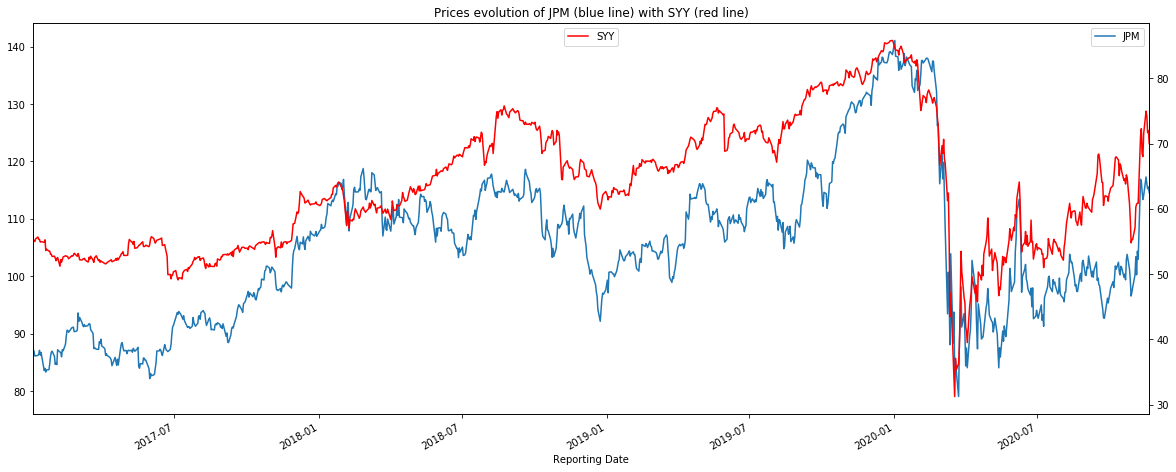

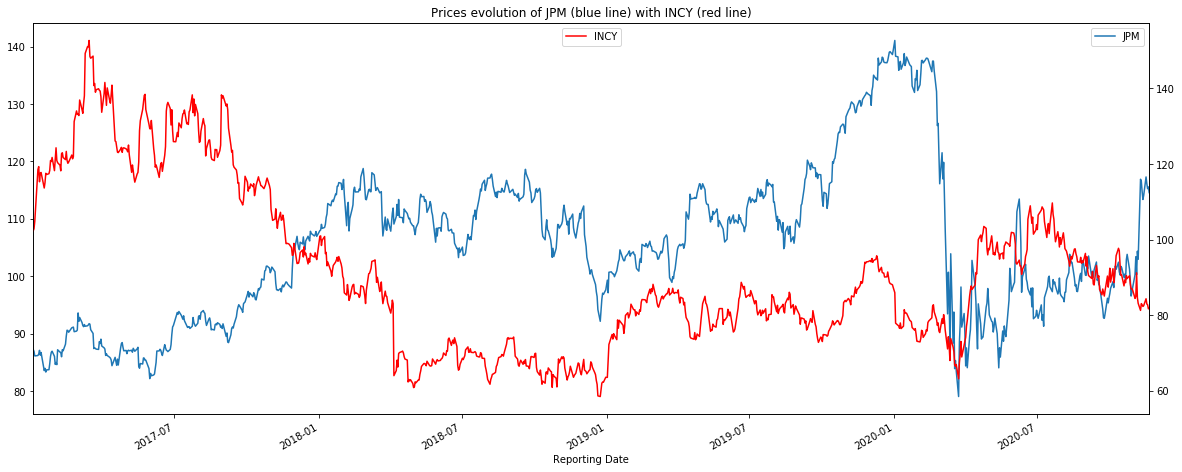

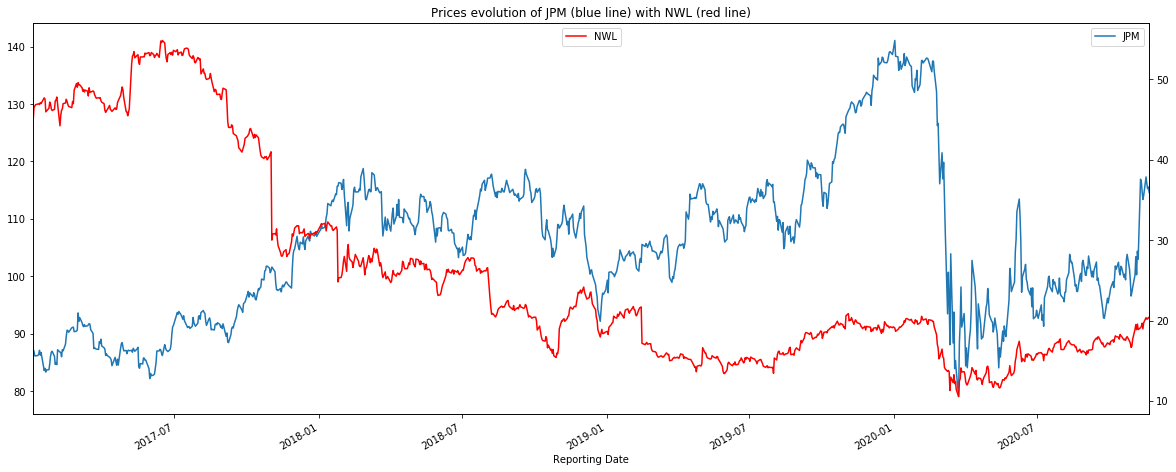

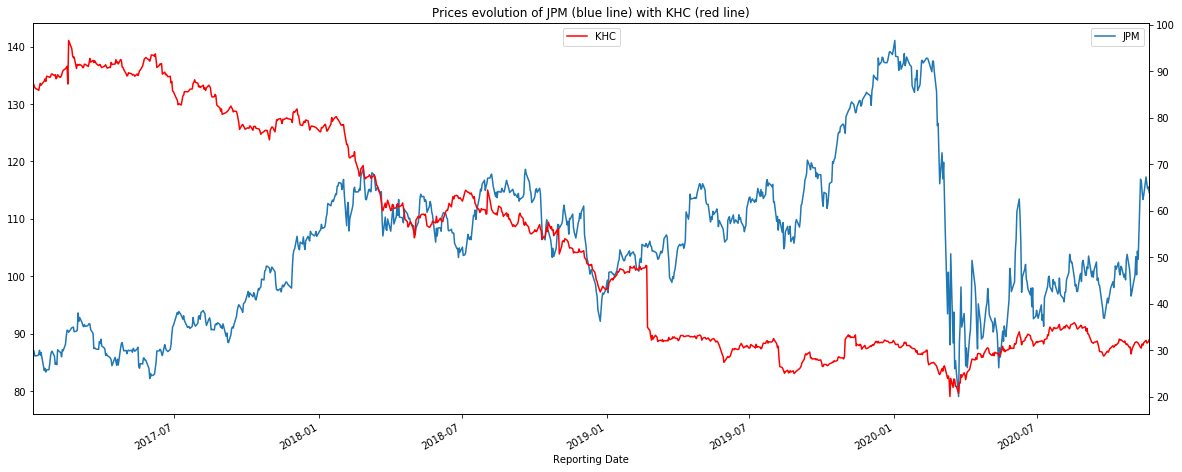

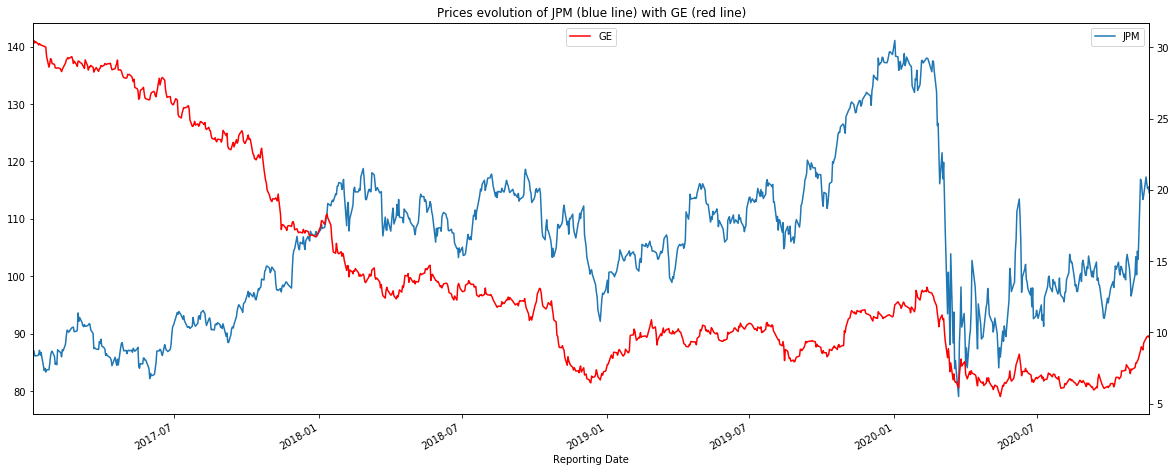

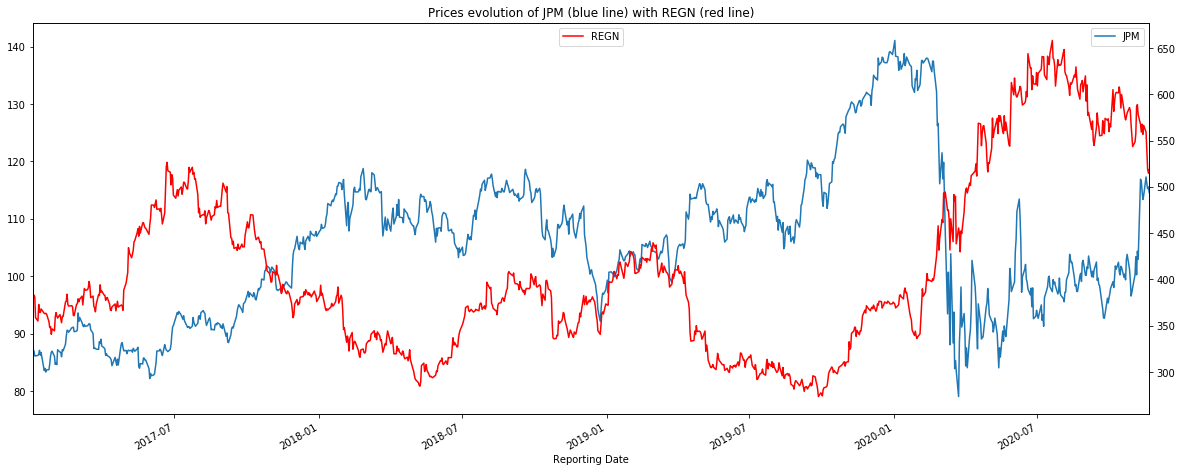

In [1696]:
# EXAMPLE WITH JP MORGAN AND TOP 5 highest and lowest securities in terms of correlation
stock_correlation_evolution("JPM", 5)

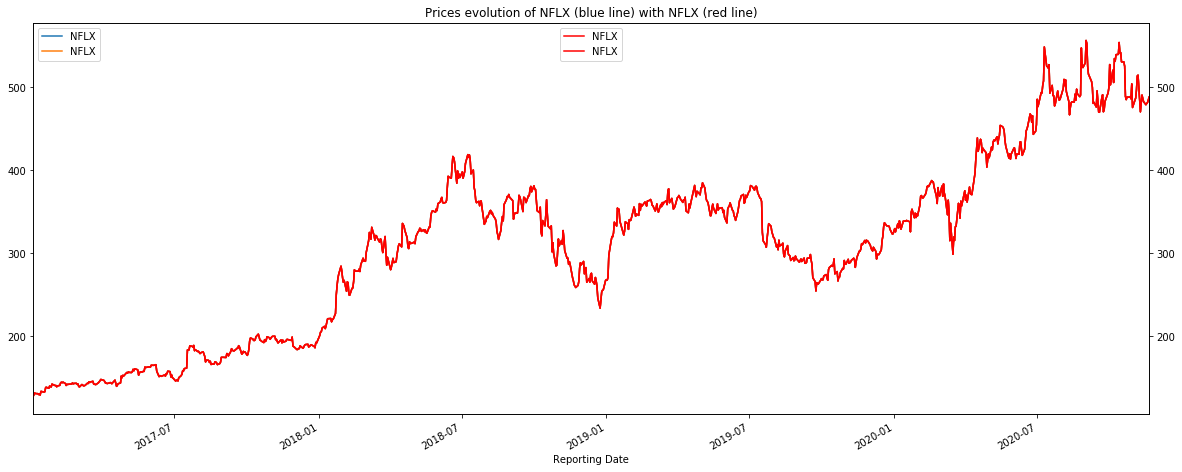

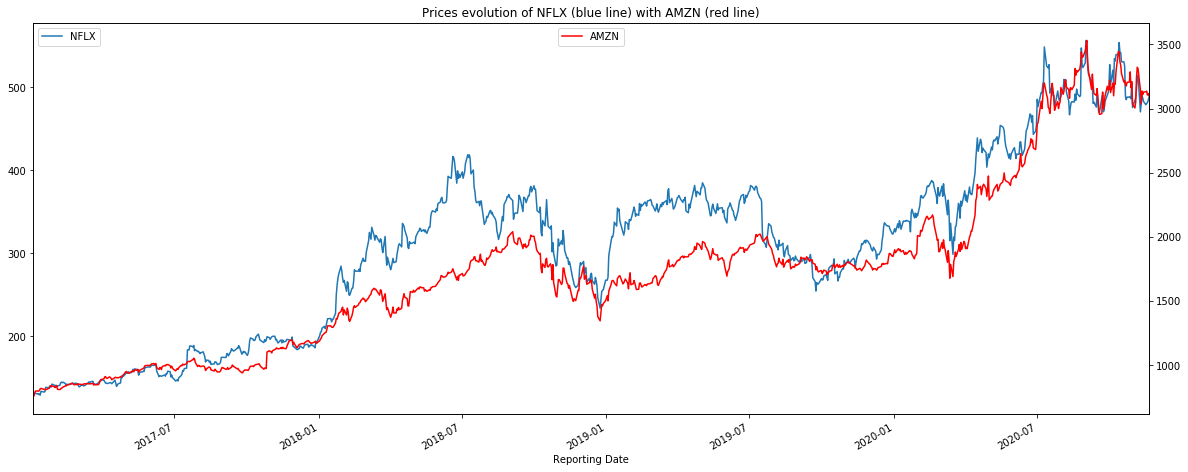

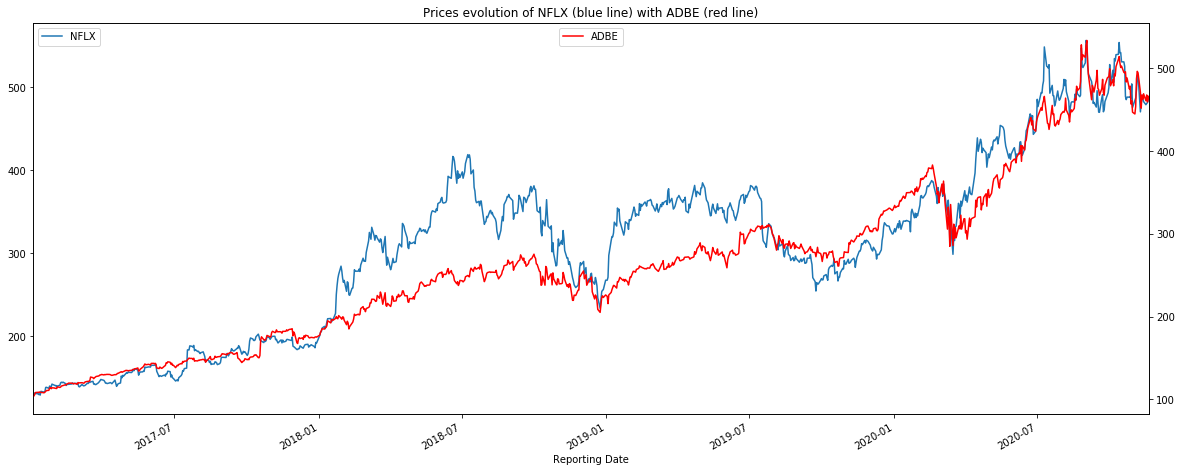

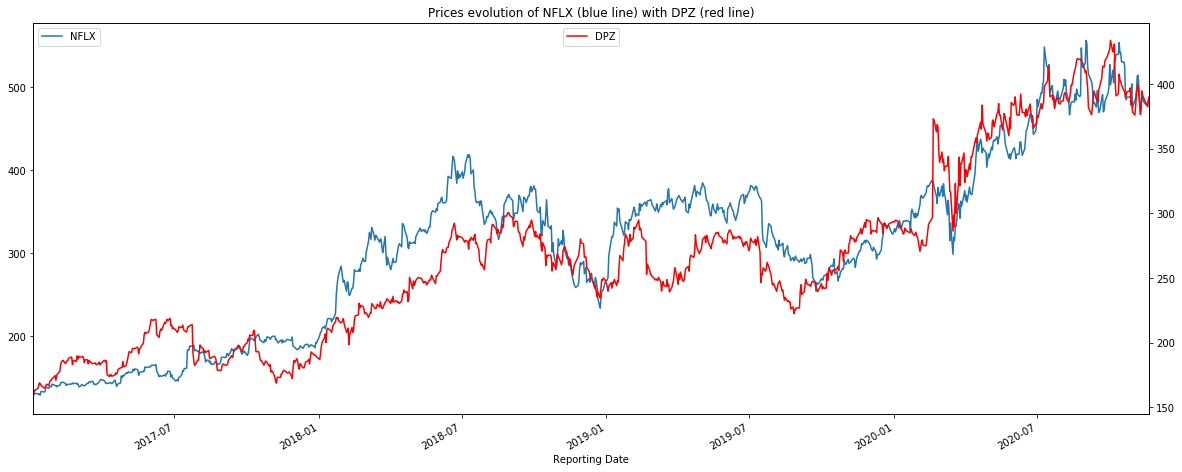

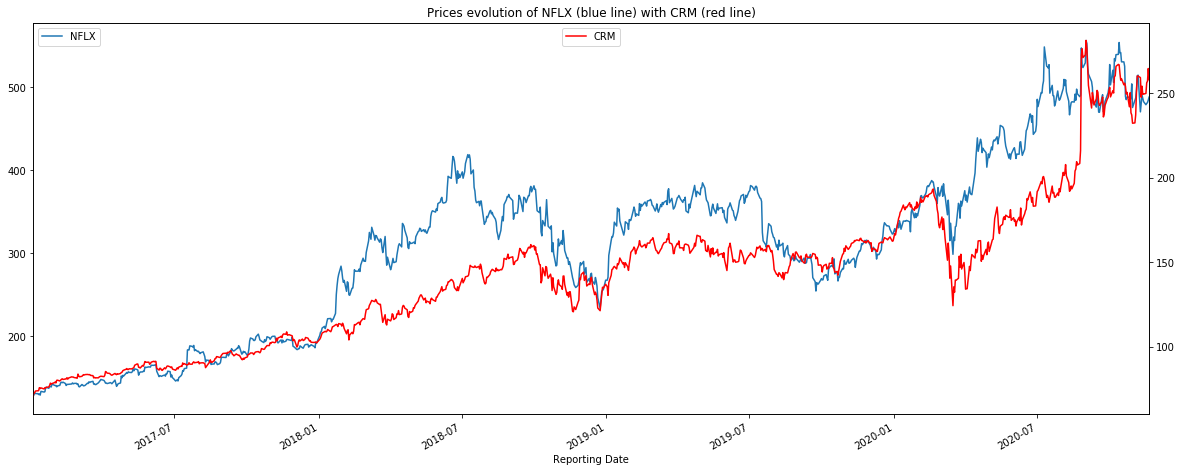

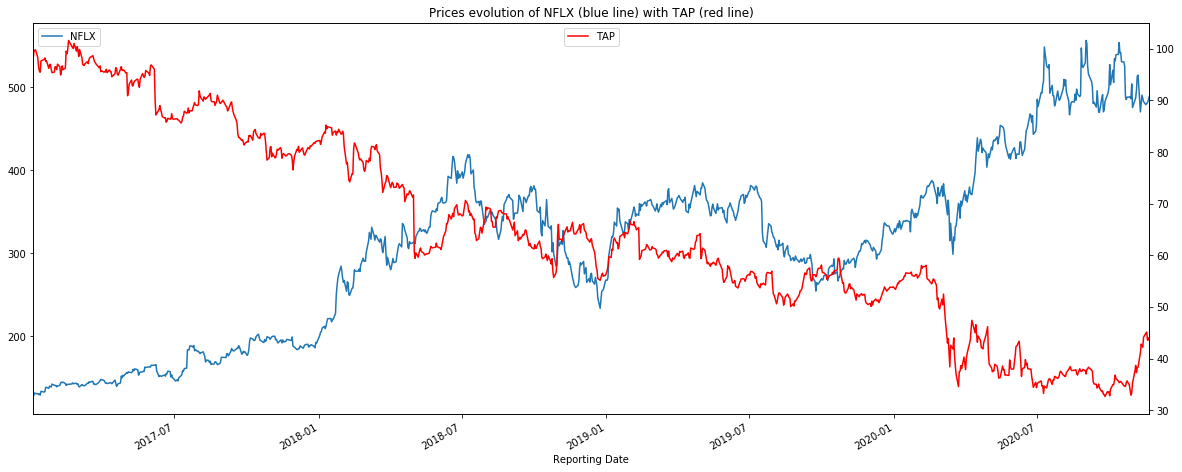

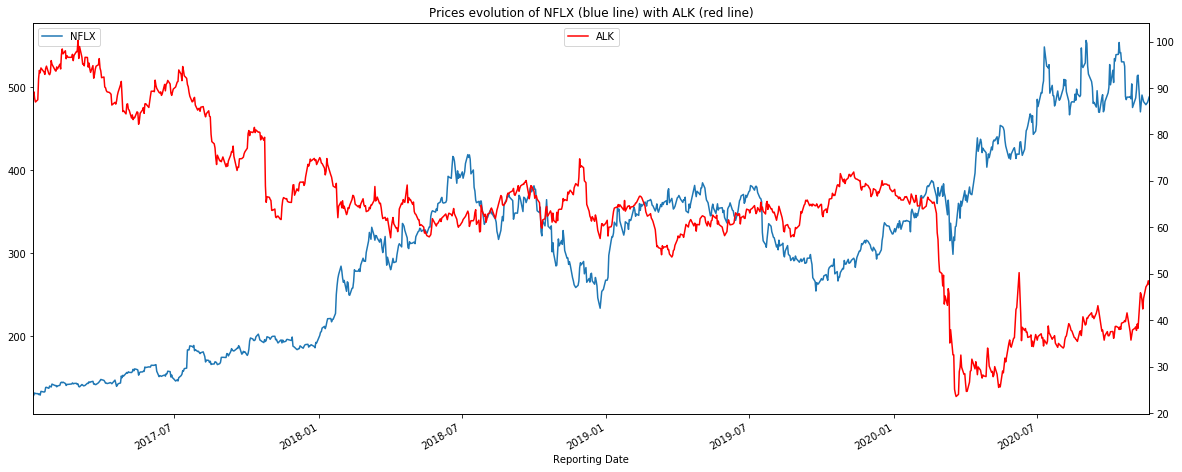

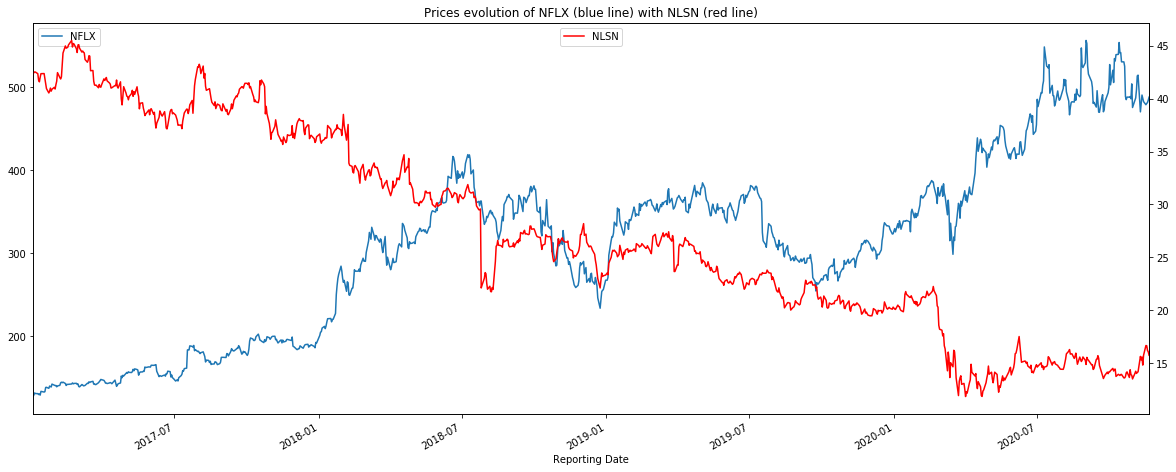

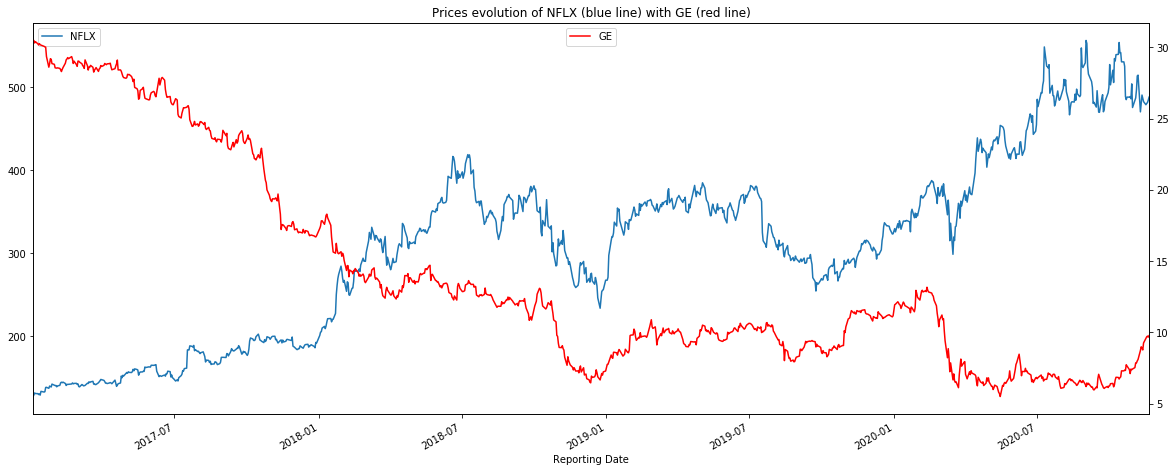

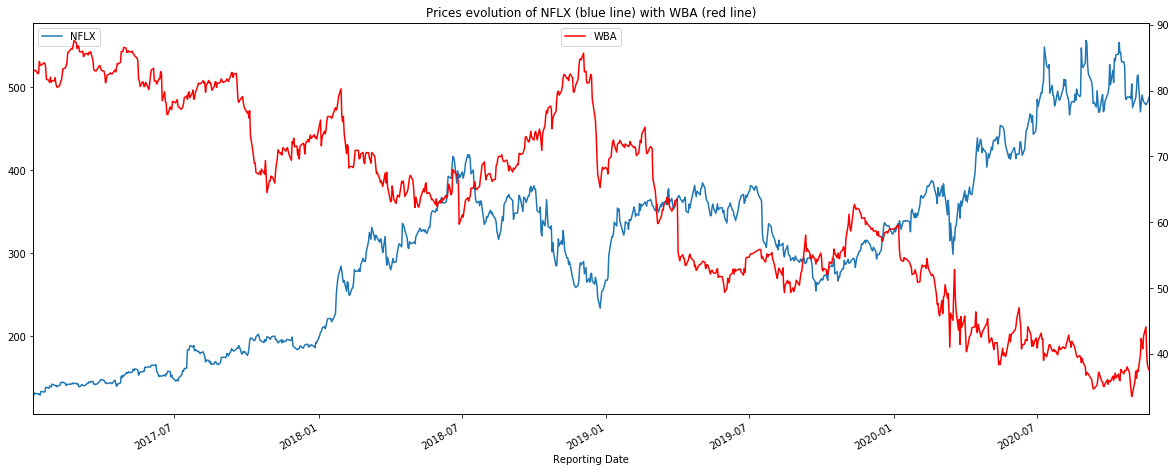

In [1697]:
# EXAMPLE WITH NETFLIX AND TOP 5 highest and lowest securities in terms of correlation
stock_correlation_evolution("NFLX", 5)

### NEXT STEPS

- Create different data frames for each stock we want to predict
- Reshape those data frame with past and current data: t0, t-1, t-2,t-3, t-n
- Test Neural Networks or Random Forests to predict our selected stocks future prices


In [1715]:
# CREATING A FUNCTION THAT WILL BUILD OUR TRAINING DATA SETS

#def training_data_set_gen(stock, correlation_threshold, periods_of_training):
def training_data_set_gen(stock, correlation_threshold, periods_of_training):
    
    #my_stock = "AMZN"
    stock_symbol = [] 
    stock_correl = []


    for symbol in [str(i) for i in final_finacial_data.columns if i != 'Reporting Date']:
        
        if symbol == stock:
            correl_with_stock = 1
        else:
            correl_with_stock = [i for i in final_finacial_data[[stock,symbol]].corr()[stock]][1]
            
        stock_symbol.append(symbol)
        stock_correl.append(correl_with_stock)

    correlations = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = False)
    correlations = correlations[(correlations["Correlation"] >= correlation_threshold)|(correlations["Correlation"] <= -correlation_threshold)]
    
    securities_used_for_train_data = [str(i) for i in correlations['Symbol']]
    print(f'Securities used to predict the price of {stock}: ' + str(securities_used_for_train_data))
    
    my_stock_df = final_finacial_data[['Reporting Date', stock]]

    for symbol in correlations["Symbol"]:
        for i in range(1,periods_of_training+1):
            my_stock_df[f'{symbol} t-{i}'] = final_finacial_data.shift(periods=i)[symbol]
                 
    my_stock_df.dropna(axis=0, how='any', inplace= True)
    my_stock_df = my_stock_df.set_index('Reporting Date')
    return my_stock_df

#### SOME EXAMPLES OF MY FUNCTION

In [1716]:
AMAZON = training_data_set_gen("AMZN",0.7,20)
AMAZON

Securities used to predict the price of AMZN: ['AMZN', 'ADBE', 'PYPL', 'NASDAQ', 'NOW', 'ODFL', 'IDXX', 'ETSY', 'CRM', 'BIO', 'POOL', 'ADSK', 'MSFT', 'DPZ', 'NFLX', 'TMO', 'NDAQ', 'SPGI', 'ANSS', 'MSCI', 'CDNS', 'SNPS', 'ROL', 'DHR', 'HD', 'ABT', 'FAST', 'AAPL', 'GOOG', 'LOW', 'DG', 'GOOGL', 'ZTS', 'WST', 'TSCO', 'PKI', 'MCO', 'VRSK', 'CTLT', 'NKE', 'PGR', 'AMD', 'INTU', 'ACN', 'RMD', 'LIN', 'ISRG', 'FTNT', 'TYL', 'ZBRA', 'COST', 'DXCM', 'UNH', 'ROP', 'SHW', 'EXPD', 'HUM', 'AKAM', 'CTAS', 'APD', 'NEE', 'TMUS', 'TGT', 'A', 'CPRT', 'MA', 'BBY', 'JKHY', 'CMG', 'WMT', 'MKC', 'CLX', 'AJG', 'CTXS', 'PAYC', 'SP500', 'V', 'NVDA', 'STE', 'TTWO', 'TXN', 'CCI', 'SBAC', 'PLD', 'VRTX', 'INFO', 'CHD', 'TER', 'MKTX', 'ICE', 'AWK', 'KSU', 'HRL', 'UNP', 'LLY', 'FB', 'MNST', 'EL', 'GRMN', 'KLAC', 'MTD', 'FIS', 'EQIX', 'BR', 'QCOM', 'IEX', 'AMGN', 'MMC', 'TT', 'MXIM', 'EW', 'AME', 'AMT', 'LRCX', 'VRSN', 'ORLY', 'TROW', 'FMC', 'DHI', 'NSC', 'KEYS', 'ADI', 'IQV', 'TFX', 'ARE', 'DRE', 'DLR', 'QRVO', 'VAR', 

AMZN     AMZN t-1     AMZN t-2     AMZN t-3  \
Reporting Date                                                       
2017-02-01       832.349976   823.479980   830.380005   835.770020   
2017-02-02       839.950012   832.349976   823.479980   830.380005   
2017-02-03       810.200012   839.950012   832.349976   823.479980   
2017-02-06       807.640015   810.200012   839.950012   832.349976   
2017-02-07       812.500000   807.640015   810.200012   839.950012   
...                     ...          ...          ...          ...   
2020-11-16      3131.060059  3128.810059  3110.280029  3137.389893   
2020-11-17      3135.659912  3131.060059  3128.810059  3110.280029   
2020-11-18      3105.459961  3135.659912  3131.060059  3128.810059   
2020-11-19      3117.020020  3105.459961  3135.659912  3131.060059   
2020-11-20      3099.399902  3117.020020  3105.459961  3135.659912   

                   AMZN t-4     AMZN t-5     AMZN t-6     AMZN t-7  \
Reporting Date                                                       
2017-02-01       839.150024   836.520020   822.440002   817.880005   
2017-02-02       835.770020   839.150024   836.520020   822.440002   
2017-02-03       830.380005   835.770020   839.150024   836.520020   
2017-02-06       823.479980   830.380005   835.770020   839.150024   
2017-02-07       832.349976   823.479980   830.380005   835.770020   
...                     ...          ...          ...          ...   
2020-11-16      3035.020020  3143.739990  3311.370117  3322.000000   
2020-11-17      3137.389893  3035.020020  3143.739990  3311.370117   
2020-11-18      3110.280029  3137.389893  3035.020020  3143.739990   
2020-11-19      3128.810059  3110.280029  3137.389893  3035.020020   
2020-11-20      3131.060059  3128.810059  3110.280029  3137.389893   

                   AMZN t-8     AMZN t-9  ...   TAP t-11   TAP t-12  \
Reporting Date                            ...                         
2017-02-01       808.330017   809.039978  ...  97.910004  97.620003   
2017-02-02       817.880005   808.330017  ...  98.199997  97.910004   
2017-02-03       822.440002   817.880005  ...  97.540001  98.199997   
2017-02-06       836.520020   822.440002  ...  97.620003  97.540001   
2017-02-07       839.150024   836.520020  ...  96.190002  97.620003   
...                     ...          ...  ...        ...        ...   
2020-11-16      3241.159912  3048.409912  ...  35.259998  33.380001   
2020-11-17      3322.000000  3241.159912  ...  37.549999  35.259998   
2020-11-18      3311.370117  3322.000000  ...  38.680000  37.549999   
2020-11-19      3143.739990  3311.370117  ...  37.290001  38.680000   
2020-11-20      3035.020020  3143.739990  ...  38.250000  37.290001   

                 TAP t-13   TAP t-14   TAP t-15   TAP t-16   TAP t-17  \
Reporting Date                                                          
2017-02-01      95.430000  95.669998  96.410004  98.279999  99.790001   
2017-02-02      97.620003  95.430000  95.669998  96.410004  98.279999   
2017-02-03      97.910004  97.620003  95.430000  95.669998  96.410004   
2017-02-06      98.199997  97.910004  97.620003  95.430000  95.669998   
2017-02-07      97.540001  98.199997  97.910004  97.620003  95.430000   
...                   ...        ...        ...        ...        ...   
2020-11-16      32.910000  33.810001  34.880001  35.680000  35.299999   
2020-11-17      33.380001  32.910000  33.810001  34.880001  35.680000   
2020-11-18      35.259998  33.380001  32.910000  33.810001  34.880001   
2020-11-19      37.549999  35.259998  33.380001  32.910000  33.810001   
2020-11-20      38.680000  37.549999  35.259998  33.380001  32.910000   

                 TAP t-18   TAP t-19   TAP t-20  
Reporting Date                                   
2017-02-01      99.680000  99.410004  97.879997  
2017-02-02      99.790001  99.680000  99.410004  
2017-02-03      98.279999  99.790001  99.680000  
2017-02-06      96.410004  98.279999  99.790001  
2017-02-07      95.669998  

In [1717]:
GOOGLE = training_data_set_gen("GOOGL",0.7,20)
GOOGLE

Securities used to predict the price of GOOGL: ['GOOGL', 'GOOG', 'NASDAQ', 'ANSS', 'SP500', 'ODFL', 'SHW', 'HD', 'SPGI', 'MCO', 'ADBE', 'ACN', 'ADSK', 'TYL', 'BIO', 'NDAQ', 'MSFT', 'TMO', 'KSU', 'A', 'INFO', 'LIN', 'RMD', 'CPRT', 'ZBRA', 'ZTS', 'CRM', 'CTAS', 'TXN', 'NOW', 'MSCI', 'NKE', 'IDXX', 'NEE', 'TER', 'SNPS', 'POOL', 'PYPL', 'AMZN', 'GRMN', 'AAPL', 'AME', 'KLAC', 'FAST', 'LOW', 'FMC', 'DHR', 'PLD', 'ISRG', 'BBY', 'AJG', 'MA', 'LRCX', 'ABT', 'TGT', 'V', 'INTU', 'PAYC', 'CDNS', 'UNH', 'VRSK', 'CTLT', 'DG', 'PKI', 'ROP', 'MMC', 'HUM', 'COST', 'FTNT', 'EL', 'WMT', 'ICE', 'FIS', 'APD', 'STE', 'FB', 'TROW', 'DOV', 'CCI', 'ADI', 'DHI', 'IEX', 'AMD', 'TDY', 'WST', 'APH', 'AWK', 'ARE', 'QRVO', 'TFX', 'GPN', 'AMGN', 'EW', 'EXPD', 'SBAC', 'ETN', 'TT', 'JKHY', 'DPZ', 'UNP', 'PGR', 'MNST', 'QCOM', 'VRTX', 'MTD', 'CMG', 'DRE', 'MXIM', 'TTWO', 'NFLX', 'TMUS', 'ROL', 'AKAM', 'MKC', 'KEYS', 'J', 'ETSY', 'IQV', 'WLTW', 'CDW', 'MKTX', 'EQIX', 'DXCM', 'NSC', 'AMT', 'RSG', 'NVDA', 'LDOS', 'XEL', 'F

GOOGL    GOOGL t-1    GOOGL t-2    GOOGL t-3  \
Reporting Date                                                       
2017-02-01       815.239990   820.190002   823.830017   845.030029   
2017-02-02       818.260010   815.239990   820.190002   823.830017   
2017-02-03       820.130005   818.260010   815.239990   820.190002   
2017-02-06       821.619995   820.130005   818.260010   815.239990   
2017-02-07       829.229980   821.619995   820.130005   818.260010   
...                     ...          ...          ...          ...   
2020-11-16      1774.030029  1772.260010  1742.819946  1747.229980   
2020-11-17      1761.660034  1774.030029  1772.260010  1742.819946   
2020-11-18      1740.640015  1761.660034  1774.030029  1772.260010   
2020-11-19      1758.569946  1740.640015  1761.660034  1774.030029   
2020-11-20      1736.380005  1758.569946  1740.640015  1761.660034   

                  GOOGL t-4    GOOGL t-5    GOOGL t-6    GOOGL t-7  \
Reporting Date                                                       
2017-02-01       856.979980   858.450012   849.530029   844.429993   
2017-02-02       845.030029   856.979980   858.450012   849.530029   
2017-02-03       823.830017   845.030029   856.979980   858.450012   
2017-02-06       820.190002   823.830017   845.030029   856.979980   
2017-02-07       815.239990   820.190002   823.830017   845.030029   
...                     ...          ...          ...          ...   
2020-11-16      1737.719971  1761.420044  1759.729980  1762.500000   
2020-11-17      1747.229980  1737.719971  1761.420044  1759.729980   
2020-11-18      1742.819946  1747.229980  1737.719971  1761.420044   
2020-11-19      1772.260010  1742.819946  1747.229980  1737.719971   
2020-11-20      1774.030029  1772.260010  1742.819946  1747.229980   

                  GOOGL t-8    GOOGL t-9  ...   TAP t-11   TAP t-12  \
Reporting Date                            ...                         
2017-02-01       828.169983   824.369995  ...  97.910004  97.620003   
2017-02-02       844.429993   828.169983  ...  98.199997  97.910004   
2017-02-03       849.530029   844.429993  ...  97.540001  98.199997   
2017-02-06       858.450012   849.530029  ...  97.620003  97.540001   
2017-02-07       856.979980   858.450012  ...  96.190002  97.620003   
...                     ...          ...  ...        ...        ...   
2020-11-16      1745.849976  1645.660034  ...  35.259998  33.380001   
2020-11-17      1762.500000  1745.849976  ...  37.549999  35.259998   
2020-11-18      1759.729980  1762.500000  ...  38.680000  37.549999   
2020-11-19      1761.420044  1759.729980  ...  37.290001  38.680000   
2020-11-20      1737.719971  1761.420044  ...  38.250000  37.290001   

                 TAP t-13   TAP t-14   TAP t-15   TAP t-16   TAP t-17  \
Reporting Date                                                          
2017-02-01      95.430000  95.669998  96.410004  98.279999  99.790001   
2017-02-02      97.620003  95.430000  95.669998  96.410004  98.279999   
2017-02-03      97.910004  97.620003  95.430000  95.669998  96.410004   
2017-02-06      98.199997  97.910004  97.620003  95.430000  95.669998   
2017-02-07      97.540001  98.199997  97.910004  97.620003  95.430000   
...                   ...        ...        ...        ...        ...   
2020-11-16      32.910000  33.810001  34.880001  35.680000  35.299999   
2020-11-17      33.380001  32.910000  33.810001  34.880001  35.680000   
2020-11-18      35.259998  33.380001  32.910000  33.810001  34.880001   
2020-11-19      37.549999  35.259998  33.380001  32.910000  33.810001   
2020-11-20      38.680000  37.549999  35.259998  33.380001  32.910000   

                 TAP t-18   TAP t-19   TAP t-20  
Reporting Date                                   
2017-02-01      99.680000  99.410004  97.879997  
2017-02-02      99.790001  99.680000  99.410004  
2017-02-03      98.279999  99.790001  99.680000  
2017-02-06      96.410004  98.279999  99.790001  
2017-02-07      95.669998 

In [1718]:
JPM = training_data_set_gen("JPM", 0.8,30)
JPM

Securities used to predict the price of JPM: ['JPM', 'BAC', 'GL', 'CBRE', 'SYY', 'VFC', 'AXP', 'HLT', 'MAR', 'ALL', 'LW', 'AFL']


JPM     JPM t-1     JPM t-2     JPM t-3     JPM t-4  \
Reporting Date                                                               
2017-02-15       90.589996   89.559998   88.150002   87.000000   87.199997   
2017-02-16       90.529999   90.589996   89.559998   88.150002   87.000000   
2017-02-17       90.230003   90.529999   90.589996   89.559998   88.150002   
2017-02-21       91.010002   90.230003   90.529999   90.589996   89.559998   
2017-02-22       91.059998   91.010002   90.230003   90.529999   90.589996   
...                    ...         ...         ...         ...         ...   
2020-11-16      117.300003  114.080002  113.370003  114.779999  116.519997   
2020-11-17      116.110001  117.300003  114.080002  113.370003  114.779999   
2020-11-18      115.250000  116.110001  117.300003  114.080002  113.370003   
2020-11-19      115.559998  115.250000  116.110001  117.300003  114.080002   
2020-11-20      114.570000  115.559998  115.250000  116.110001  117.300003   

                   JPM t-5     JPM t-6     JPM t-7     JPM t-8     JPM t-9  \
Reporting Date                                                               
2017-02-15       85.959999   86.720001   86.769997   87.180000   84.589996   
2017-02-16       87.199997   85.959999   86.720001   86.769997   87.180000   
2017-02-17       87.000000   87.199997   85.959999   86.720001   86.769997   
2017-02-21       88.150002   87.000000   87.199997   85.959999   86.720001   
2017-02-22       89.559998   88.150002   87.000000   87.199997   85.959999   
...                    ...         ...         ...         ...         ...   
2020-11-16      116.900002  102.959999  104.349998  100.250000  103.410004   
2020-11-17      116.519997  116.900002  102.959999  104.349998  100.250000   
2020-11-18      114.779999  116.519997  116.900002  102.959999  104.349998   
2020-11-19      113.370003  114.779999  116.519997  116.900002  102.959999   
2020-11-20      114.080002  113.370003  114.779999  116.519997  116.900002   

                ...   AFL t-21   AFL t-22   AFL t-23   AFL t-24   AFL t-25  \
Reporting Date  ...                                                          
2017-02-15      ...  34.939999  34.820000  34.785000  34.930000  34.715000   
2017-02-16      ...  34.985001  34.939999  34.820000  34.785000  34.930000   
2017-02-17      ...  34.730000  34.985001  34.939999  34.820000  34.785000   
2017-02-21      ...  35.040001  34.730000  34.985001  34.939999  34.820000   
2017-02-22      ...  34.674999  35.040001  34.730000  34.985001  34.939999   
...             ...        ...        ...        ...        ...        ...   
2020-11-16      ...  37.209999  37.250000  36.980000  37.209999  38.400002   
2020-11-17      ...  36.480000  37.209999  37.250000  36.980000  37.209999   
2020-11-18      ...  36.910000  36.480000  37.209999  37.250000  36.980000   
2020-11-19      ...  36.650002  36.910000  36.480000  37.209999  37.250000   
2020-11-20      ...  37.509998  36.650002  36.910000  36.480000  37.209999   

                 AFL t-26   AFL t-27   AFL t-28   AFL t-29   AFL t-30  
Reporting Date                                                         
2017-02-15      34.759998  35.095001  34.974998  35.205002  34.884998  
2017-02-16      34.715000  34.759998  35.095001  34.974998  35.205002  
2017-02-17      34.930000  34.715000  34.759998  35.095001  34.974998  
2017-02-21      34.785000  34.930000  34.715000  34.759998  35.095001  
2017-02-22      34.820000  34.785000  34.930000  34.715000  34.759998  
...                   ...        ...        ...        ...        ...  
2020-11-16      38.099998  38.240002  37.910000  37.369999  37.430000  
2020-11-17      38.400002  38.099998  38.240002  37.910000  37.369999  
2020-11-18      37.209999  38.400002  38.099998  38.240002  37.910000  
2020-11-19      36.980000  37.209999  38.400002  38.099998  38.240002  
2020-11-20      37.250000  36.980000  37.209999  38.400002  38.099998  

[950 rows x 361 columns]

### CREATING OUR FIRST NEURAL NETWORKS 1
---- PREDICTING GOOGLE STOCK PRICE

In [1589]:
from sklearn.model_selection import train_test_split

In [1590]:
# Convert Pandas to Numpy for Keras
# Features
X = GOOGLE.drop(['GOOGL'], axis = 1).values

# Label
y = GOOGLE['GOOGL'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=42)

In [1591]:
print('X shape =', X.shape)
print('y shape =',y.shape)
print('X_train shape =', X_train.shape)
print('y_train shape =',y_train.shape)
print('X_test shape =', X_test.shape)
print('y_test shape =',y_test.shape)

X shape = (960, 4520)
y shape = (960,)
X_train shape = (288, 4520)
y_train shape = (288,)
X_test shape = (672, 4520)
y_test shape = (672,)


## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [1623]:
from sklearn.preprocessing import MinMaxScaler

In [1624]:
scaler = MinMaxScaler()

In [1625]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [1626]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1627]:
print('Scaled X_train = ',X_train)
print()
print('Scaled X_test = ',X_test)

Scaled X_train =  [[0.64548022 0.66297308 0.65850101 ... 0.05788395 0.0593494  0.04789895]
 [0.40410302 0.4069085  0.41214879 ... 0.41090272 0.40606688 0.3975904 ]
 [0.65792304 0.65549849 0.69637313 ... 0.32664129 0.32502932 0.31575084]
 ...
 [0.65369892 0.62681626 0.60682394 ... 0.15518758 0.14097308 0.12900386]
 [0.30885803 0.29882592 0.2931342  ... 0.42438458 0.43215127 0.41595654]
 [0.13856009 0.15930393 0.17592245 ... 0.93903874 0.93508206 0.90008822]]

Scaled X_test =  [[0.62891767 0.62915401 0.63219076 ... 0.07927902 0.08997655 0.10990302]
 [0.18357513 0.21328232 0.2276729  ... 0.47464831 0.47186409 0.44916252]
 [0.3694239  0.38152839 0.37780915 ... 0.42174683 0.41984177 0.41140172]
 ...
 [0.13166594 0.1382325  0.14358489 ... 0.84144197 0.84583826 0.83940651]
 [0.64408266 0.66476568 0.66922426 ... 0.3181419  0.32019348 0.29165447]
 [0.37961384 0.36606555 0.36267295 ... 0.34979489 0.3446659  0.30414342]]


# TensorFlow

In [1628]:
import tensorflow as tf

In [1629]:
from tensorflow.keras.models import Sequential

In [1630]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor = "val_loss" , mode = "min", verbose = 1, patience = 25)

## Creating a first version of the NNW Model

In [1631]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [1632]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

##model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')

In [1633]:
#model.fit(X_train,y_train,epochs=1000, validation_data = (X_test, y_test), callbacks = [early_stop])
model.fit(X_train,y_train,epochs=1600)

Epoch 1/1600
9/9 [==============================] - 0s 2ms/step - loss: 1409424.5000
Epoch 2/1600
9/9 [==============================] - 0s 2ms/step - loss: 1209316.8750
Epoch 3/1600
9/9 [==============================] - 0s 3ms/step - loss: 824166.0625
Epoch 4/1600
9/9 [==============================] - 0s 3ms/step - loss: 306379.1250
Epoch 5/1600
9/9 [==============================] - 0s 3ms/step - loss: 98303.1562
Epoch 6/1600
9/9 [==============================] - 0s 3ms/step - loss: 94493.2188
Epoch 7/1600
9/9 [==============================] - 0s 3ms/step - loss: 61529.4805
Epoch 8/1600
9/9 [==============================] - 0s 3ms/step - loss: 53013.7500
Epoch 9/1600
9/9 [==============================] - 0s 2ms/step - loss: 40925.8789
Epoch 10/1600
9/9 [==============================] - 0s 3ms/step - loss: 36145.5938
Epoch 11/1600
9/9 [==============================] - 0s 3ms/step - loss: 30394.7266
Epoch 12/1600
9/9 [==============================] - 0s 2ms/step - loss: 26287.

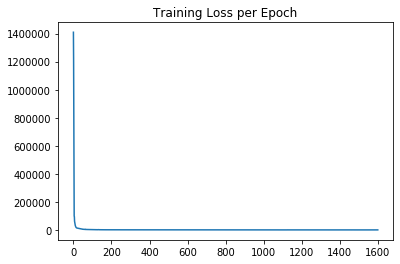

In [1634]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1635]:
model.metrics_names

['loss']

In [1636]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [1637]:
predictions = model.predict(X_test)

In [1638]:
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE =", mean_absolute_error(y_test,predictions))

MSE= 811.0822393908553
MAE = 19.933963139851887


In [1639]:
explained_variance_score(y_test,predictions)

0.9807981319540428

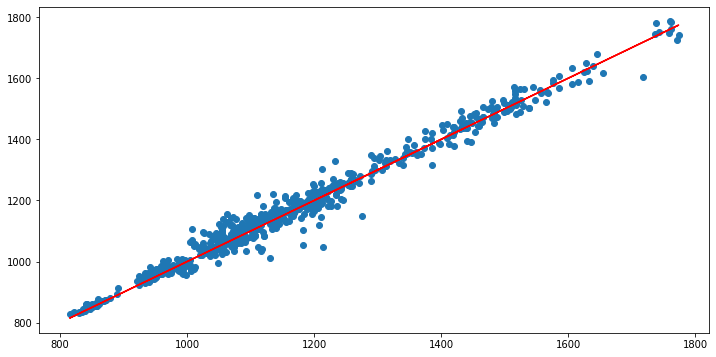

In [1640]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,"r")

In [1641]:
## PREDICTING THE WHOLE GOOGLE DATA FRAME

all_data_to_predict = GOOGLE.drop(['GOOGL'],axis = 1 )
real_stock_prices = GOOGLE[['GOOGL']].rename(columns={"GOOGL": "Google Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

In [1642]:
real_stock_prices.head()

Google Real price
Reporting Date                   
2017-02-01             815.239990
2017-02-02             818.260010
2017-02-03             820.130005
2017-02-06             821.619995
2017-02-07             829.229980

In [1643]:
all_data_predictions[0:5]

array([[815.0237 ],
       [814.46564],
       [817.1925 ],
       [819.97266],
       [820.39777]], dtype=float32)

In [1644]:
## Ceeating a data frame

In [1645]:
real_stock_prices["Google Price Predictions"] = all_data_predictions
real_stock_prices.head()

Google Real price  Google Price Predictions
Reporting Date                                             
2017-02-01             815.239990                815.023682
2017-02-02             818.260010                814.465637
2017-02-03             820.130005                817.192505
2017-02-06             821.619995                819.972656
2017-02-07             829.229980                820.397766

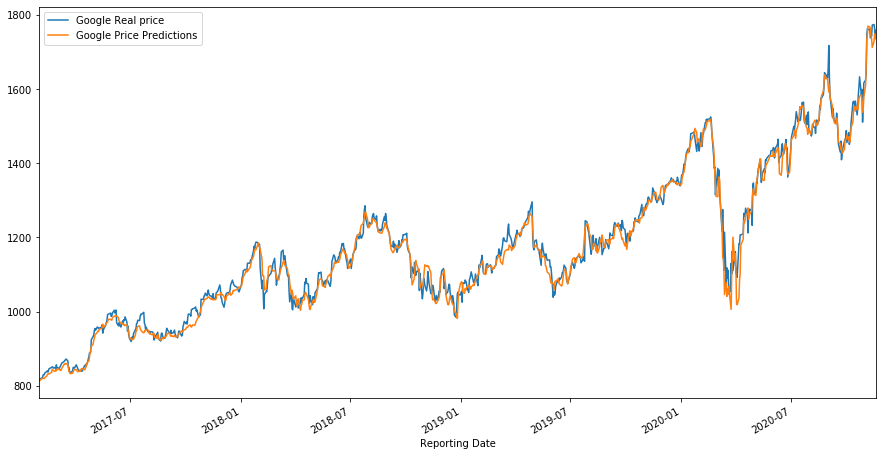

In [1646]:
real_stock_prices.plot(figsize = [15,8])

### PREDICTING t+1 reporting date stock price for GOOGLE

In [1647]:
## USING THE SAME NUMBER OF PREDICTING PERIODS = 30 AND STOCKS WITH ABS CORR > 0.8

GOOGLE_SEC = ['GOOGL', 'GOOG', 'NASDAQ', 'ANSS', 'SP500', 'ODFL', 'SHW', 'HD', 'SPGI', 'MCO', 'ADBE', 'ACN', 'ADSK', 'TYL', 'BIO', 'NDAQ', 'MSFT', 'TMO', 'KSU', 'A', 'INFO', 'LIN', 'RMD', 'CPRT', 'ZBRA', 'ZTS', 'CRM', 'CTAS', 'TXN', 'NOW', 'MSCI', 'NKE', 'IDXX', 'NEE', 'TER', 'SNPS', 'POOL', 'PYPL', 'AMZN', 'GRMN', 'AAPL', 'AME', 'KLAC', 'FAST', 'LOW', 'FMC', 'DHR', 'PLD', 'ISRG', 'BBY', 'AJG', 'MA', 'LRCX', 'ABT', 'TGT', 'V', 'INTU', 'PAYC', 'CDNS', 'UNH', 'VRSK', 'CTLT', 'DG', 'PKI', 'ROP', 'MMC', 'HUM', 'COST', 'FTNT', 'EL', 'WMT', 'ICE', 'FIS', 'APD', 'STE', 'FB', 'TROW', 'DOV', 'CCI', 'ADI', 'DHI', 'IEX', 'AMD', 'TDY', 'WST', 'APH', 'AWK', 'ARE', 'QRVO', 'TFX', 'GPN', 'AMGN', 'EW', 'EXPD', 'SBAC', 'ETN', 'TT', 'JKHY', 'DPZ', 'UNP', 'PGR', 'MNST', 'QCOM', 'VRTX', 'MTD', 'CMG', 'DRE', 'MXIM', 'TTWO', 'NFLX', 'TMUS', 'ROL', 'AKAM', 'MKC', 'KEYS', 'J', 'ETSY', 'IQV', 'WLTW', 'CDW', 'MKTX', 'EQIX', 'DXCM', 'NSC', 'AMT', 'RSG', 'NVDA', 'LDOS', 'XEL', 'FISV', 'DE', 'PHM', 'AON', 'DowJones', 'ITW', 'AVY', 'BR', 'LLY', 'AVGO', 'MAS', 'CHTR', 'ECL', 'BAX', 'TSCO', 'VAR', 'ORLY', 'CTXS', 'VRSN', 'WEC', 'CHD', 'BLL', 'ES', 'HRL', 'ROK', 'HOLX', 'SYK', 'LNT', 'LMT', 'WM', 'AEE', 'KMX', 'CSX', 'CLX', 'COO', 'NVR', 'CMS', 'MCHP', 'PG', 'DLR', 'MCD', 'AZO', 'TDG', 'PEP', 'ORCL', 'TJX', 'FRC', 'GWW', 'BLK', 'MDT', 'NEM', 'ILMN', 'MSI', 'ANTM', 'ALLE', 'XYL', 'LHX', 'BDX', 'HON', 'MDLZ', 'FLT', 'LH', 'AMAT', 'MU', 'AES', 'TWTR', 'EXR', 'TIF', 'INTC', 'ETR', 'PCAR', 'PAYX', 'JNJ', 'VTRS', 'CXO', 'DVN', '30 year Tbond', 'CCL', 'IVZ', 'GE', 'HAL', 'SLG', 'BKR', 'KHC', 'ALK', 'XOM', 'UNM', 'FTI', 'MO', 'APA', 'AAL', 'SLB', 'VNO', 'BEN', 'NLSN', 'WBA', 'TAP']
data = final_finacial_data[['GOOGL']]

for symbol in GOOGLE_SEC:
    for i in range(0,20):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        

        
data_to_predict = data.drop(['GOOGL'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
data_to_predict

array([[0.00516277, 0.00895924, 0.03107045, ..., 0.9722948 , 0.9683784 ,
        0.9461851 ],
       [0.        , 0.00516277, 0.00895924, ..., 0.9738904 , 0.9722948 ,
        0.9683784 ],
       [0.00314982, 0.        , 0.00516277, ..., 0.95198727, 0.9738904 ,
        0.9722948 ],
       ...,
       [0.96517484, 0.98709833, 1.        , ..., 0.03234696, 0.04395125,
        0.03843919],
       [0.98387542, 0.96517484, 0.98709833, ..., 0.01682622, 0.03234696,
        0.04395125],
       [0.96073173, 0.98387542, 0.96517484, ..., 0.00377137, 0.01682622,
        0.03234696]])

In [1651]:
## PREDICTION OF NEXT REPORTING DAY FOR GOOGLE 
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF GOOGLE STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${ next_day_prediction[-1][0]} USD')

THE PREDICTION OF GOOGLE STOCK PRICE FOR THE NEXT REPORTING DAY IS: $1723.83203125 USD


### CREATING OUR FIRST NEURAL NETWORKS 2
---- PREDICTING JP MORGAN STOCK PRICE

In [1652]:
from sklearn.model_selection import train_test_split

In [1653]:
# Convert Pandas to Numpy for Keras
# Features
X = JPM.drop(['JPM'], axis = 1).values

# Label
y = JPM['JPM'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [1654]:
from sklearn.preprocessing import MinMaxScaler

In [1655]:
scaler = MinMaxScaler()

In [1656]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [1657]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1658]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [1659]:
model = Sequential()

model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

##model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')

In [1660]:
model.fit(X_train,y_train,epochs= 1600)

Epoch 1/1600
6/6 [==============================] - 0s 1ms/step - loss: 11411.3789
Epoch 2/1600
6/6 [==============================] - 0s 1ms/step - loss: 11286.3438
Epoch 3/1600
6/6 [==============================] - 0s 1ms/step - loss: 10994.7793
Epoch 4/1600
6/6 [==============================] - 0s 1ms/step - loss: 10345.0195
Epoch 5/1600
6/6 [==============================] - 0s 2ms/step - loss: 9021.4062
Epoch 6/1600
6/6 [==============================] - 0s 1ms/step - loss: 6661.1045
Epoch 7/1600
6/6 [==============================] - 0s 1ms/step - loss: 3304.0398
Epoch 8/1600
6/6 [==============================] - 0s 1ms/step - loss: 1181.8284
Epoch 9/1600
6/6 [==============================] - 0s 2ms/step - loss: 1736.0898
Epoch 10/1600
6/6 [==============================] - 0s 1ms/step - loss: 1113.5444
Epoch 11/1600
6/6 [==============================] - 0s 1ms/step - loss: 1126.1511
Epoch 12/1600
6/6 [==============================] - 0s 1ms/step - loss: 1074.7010
Epoch 13/

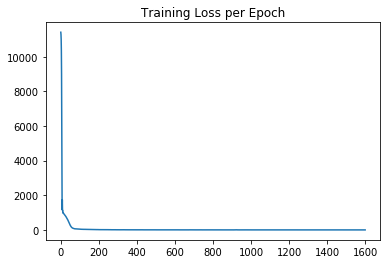

In [1661]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1662]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [1663]:
predictions = model.predict(X_test)

In [1664]:
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 8.98860077548544
MAE= 2.095095654537803
EVS= 0.9471072279526954


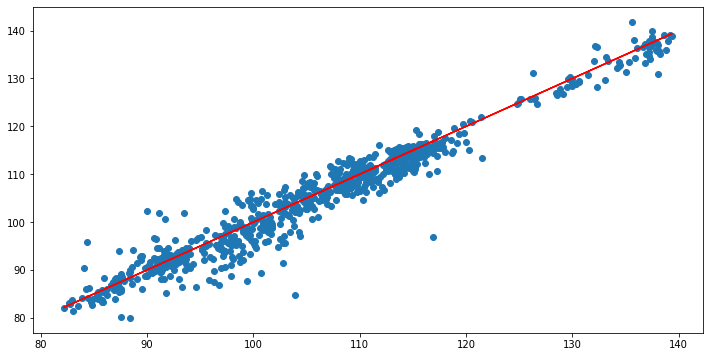

In [1665]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,"r")

In [1666]:
## PREDICTING THE WHOLE JPM DATA FRAME

all_data_to_predict = JPM.drop(['JPM'],axis = 1 )
real_stock_prices = JPM[['JPM']].rename(columns={"JPM": "JPM Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

In [1667]:
real_stock_prices.head()

JPM Real price
Reporting Date                
2017-02-15           90.589996
2017-02-16           90.529999
2017-02-17           90.230003
2017-02-21           91.010002
2017-02-22           91.059998

In [1668]:
all_data_predictions[0:5]

array([[66.82469],
       [67.69393],
       [67.3529 ],
       [67.01447],
       [67.25968]], dtype=float32)

In [1669]:
## Creating the data frame
real_stock_prices["JPM Price Predictions"] = all_data_predictions
real_stock_prices.head()

JPM Real price  JPM Price Predictions
Reporting Date                                       
2017-02-15           90.589996              66.824692
2017-02-16           90.529999              67.693932
2017-02-17           90.230003              67.352898
2017-02-21           91.010002              67.014473
2017-02-22           91.059998              67.259682

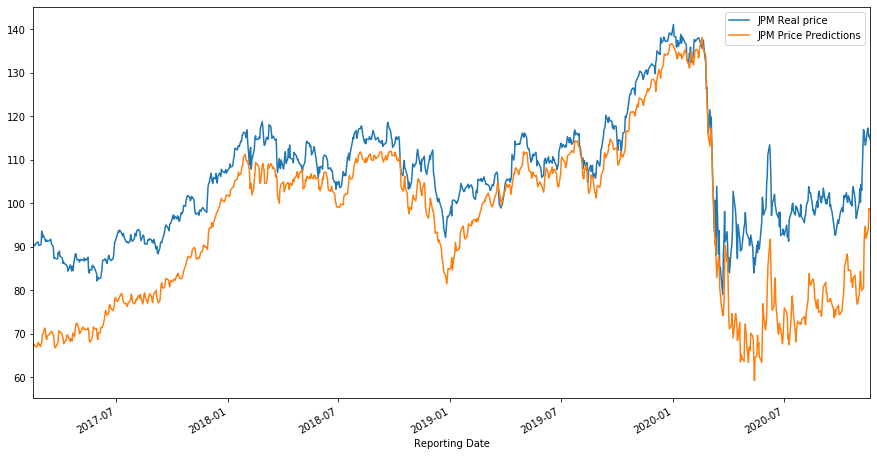

In [1670]:
real_stock_prices.plot(figsize = [15,8])

### PREDICTING t+1 reporting date stock price for JP MORGAN

In [1671]:
## USING THE SAME NUMBER OF PREDICTING PERIODS = 30 AND STOCKS WITH ABS CORR > 0.8
JPM_SEC = ['JPM', 'BAC', 'GL', 'CBRE', 'SYY', 'VFC', 'AXP', 'HLT', 'MAR', 'ALL', 'LW', 'AFL']
data = final_finacial_data[['JPM']]

for symbol in JPM_SEC:
    for i in range(0,30):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['JPM'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
data_to_predict

array([[0.1696745 , 0.14695461, 0.12842413, ..., 0.30692594, 0.31419993,
        0.30407964],
       [0.18627132, 0.1696745 , 0.14695461, ..., 0.3107211 , 0.30692594,
        0.31419993],
       [0.18530455, 0.18627132, 0.1696745 , ..., 0.30012644, 0.3107211 ,
        0.30692594],
       ...,
       [0.58362879, 0.59748636, 0.61666139, ..., 0.41524356, 0.4057558 ,
        0.41018348],
       [0.58862392, 0.58362879, 0.59748636, ..., 0.37760908, 0.41524356,
        0.4057558 ],
       [0.57267165, 0.58862392, 0.58362879, ..., 0.37033521, 0.37760908,
        0.41524356]])

In [1672]:
## PREDICTION OF NEXT REPORTING DAY FOR JP MORGAN
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF JP MORGAN STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${ next_day_prediction[-1][0]} USD')

THE PREDICTION OF JP MORGAN STOCK PRICE FOR THE NEXT REPORTING DAY IS: $92.4313735961914 USD


### CREATING OUR FIRST NEURAL NETWORKS 3
---- PREDICTING AMAZON STOCK PRICE

In [1673]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [1674]:
# Convert Pandas to Numpy for Keras
# Features
X = AMAZON.drop(['AMZN'], axis = 1).values

# Label
y = AMAZON['AMZN'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [1675]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1676]:
model = Sequential()


model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')

In [1677]:
model.fit(X_train,y_train,epochs= 2000)

Epoch 1/2000
6/6 [==============================] - 0s 4ms/step - loss: 3215961.7500
Epoch 2/2000
6/6 [==============================] - 0s 5ms/step - loss: 2719377.7500
Epoch 3/2000
6/6 [==============================] - 0s 6ms/step - loss: 1156231.8750
Epoch 4/2000
6/6 [==============================] - 0s 6ms/step - loss: 452750.0938
Epoch 5/2000
6/6 [==============================] - 0s 6ms/step - loss: 192085.0781
Epoch 6/2000
6/6 [==============================] - 0s 6ms/step - loss: 269912.1875
Epoch 7/2000
6/6 [==============================] - 0s 6ms/step - loss: 148416.5156
Epoch 8/2000
6/6 [==============================] - 0s 6ms/step - loss: 151676.5469
Epoch 9/2000
6/6 [==============================] - 0s 6ms/step - loss: 109979.6562
Epoch 10/2000
6/6 [==============================] - 0s 6ms/step - loss: 115717.3984
Epoch 11/2000
6/6 [==============================] - 0s 6ms/step - loss: 93051.1797
Epoch 12/2000
6/6 [==============================] - 0s 6ms/step - loss:

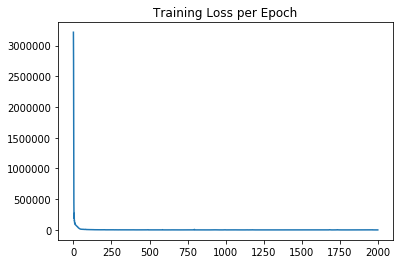

In [1678]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1679]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 3847.720636661737
MAE= 40.077765146891274
EVS= 0.9909406362077579


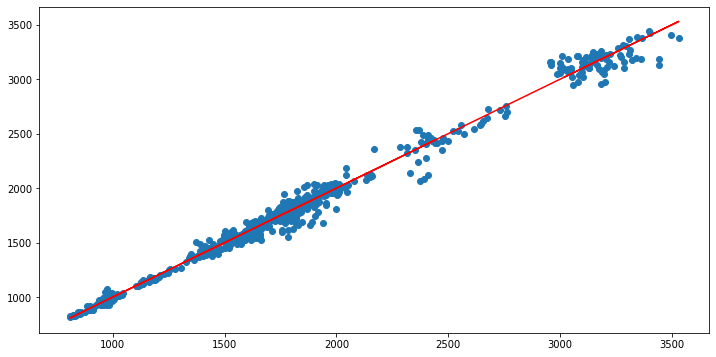

In [1680]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,"r")

In [1681]:
## PREDICTING THE WHOLE AMAZON DATA FRAME

all_data_to_predict = AMAZON.drop(['AMZN'],axis = 1 )
real_stock_prices = AMAZON[['AMZN']].rename(columns={"AMZN": "Amazonazon Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

In [1682]:
## Creating the data frame
real_stock_prices["Amazon Price Predictions"] = all_data_predictions
real_stock_prices.head()

Amazonazon Real price  Amazon Price Predictions
Reporting Date                                                 
2017-02-01                 832.349976                797.229614
2017-02-02                 839.950012                797.886353
2017-02-03                 810.200012                788.971008
2017-02-06                 807.640015                794.035278
2017-02-07                 812.500000                791.943359

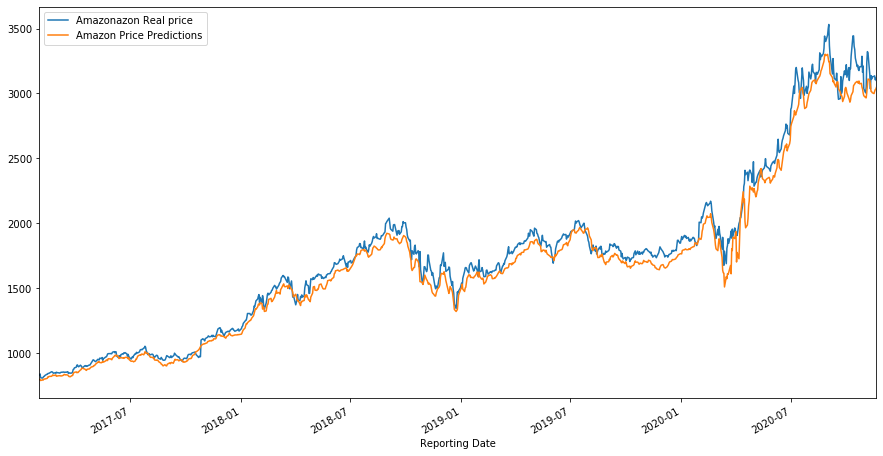

In [1683]:
real_stock_prices.plot(figsize = [15,8])

### PREDICTING t+1 reporting date future value for AMAZON

In [1688]:
## USING THE SAME NUMBER OF PREDICTING PERIODS = 30 AND STOCKS WITH ABS CORR > 0.8
AMAZON_SEC = ['AMZN', 'ADBE', 'PYPL', 'NASDAQ', 'NOW', 'ODFL', 'IDXX', 'ETSY', 'CRM', 'BIO', 'POOL', 'ADSK', 'MSFT', 'DPZ', 'NFLX', 'TMO', 'NDAQ', 'SPGI', 'ANSS', 'MSCI', 'CDNS', 'SNPS', 'ROL', 'DHR', 'HD', 'ABT', 'FAST', 'AAPL', 'GOOG', 'LOW', 'DG', 'GOOGL', 'ZTS', 'WST', 'TSCO', 'PKI', 'MCO', 'VRSK', 'CTLT', 'NKE', 'PGR', 'AMD', 'INTU', 'ACN', 'RMD', 'LIN', 'ISRG', 'FTNT', 'TYL', 'ZBRA', 'COST', 'DXCM', 'UNH', 'ROP', 'SHW', 'EXPD', 'HUM', 'AKAM', 'CTAS', 'APD', 'NEE', 'TMUS', 'TGT', 'A', 'CPRT', 'MA', 'BBY', 'JKHY', 'CMG', 'WMT', 'MKC', 'CLX', 'AJG', 'CTXS', 'PAYC', 'SP500', 'V', 'NVDA', 'STE', 'TTWO', 'TXN', 'CCI', 'SBAC', 'PLD', 'VRTX', 'INFO', 'CHD', 'TER', 'MKTX', 'ICE', 'AWK', 'KSU', 'HRL', 'UNP', 'LLY', 'FB', 'MNST', 'EL', 'GRMN', 'KLAC', 'MTD', 'FIS', 'EQIX', 'BR', 'QCOM', 'IEX', 'AMGN', 'MMC', 'TT', 'MXIM', 'EW', 'AME', 'AMT', 'LRCX', 'VRSN', 'ORLY', 'TROW', 'FMC', 'DHI', 'NSC', 'KEYS', 'ADI', 'IQV', 'TFX', 'ARE', 'DRE', 'DLR', 'QRVO', 'VAR', 'ILMN', 'ECL', 'NEM', 'BLL', 'GPN', 'XEL', 'DE', 'TDY', 'HOLX', 'CHTR', 'RSG', 'DOV', 'J', 'APH', 'WLTW', 'CSX', 'GWW', 'WEC', 'BAX', 'AEE', 'AON', 'ETN', 'CDW', 'AVGO', 'AZO', 'TWTR', 'ES', 'LDOS', 'MAS', 'WM', 'EBAY', 'COO', 'PG', 'FISV', 'SYK', 'MCD', 'DowJones', 'ORCL', 'ROK', 'PHM', 'ITW', 'MSI', 'ANTM', 'CMS', 'TJX', 'KMX', 'LNT', 'IBM', 'KIM', 'NOV', 'WMB', 'DISH', 'T', 'OXY', 'PFG', 'CXO', 'NCLH', 'WDC', '30 year Tbond', 'IRM', 'PM', 'VTRS', 'NWL', 'REG', 'SPG', 'FRT', 'DVN', 'KHC', 'BKR', 'MHK', 'LNC', 'F', 'HAL', 'PRU', 'OMC', 'GE', 'PBCT', 'FTI', 'IVZ', 'APA', 'MO', 'AIG', 'CCL', 'XOM', 'WFC', 'SLB', 'UNM', 'BEN', 'ALK', 'AAL', 'SLG', 'WBA', 'NLSN', 'VNO', 'TAP']
data = final_finacial_data[['AMZN']]

for symbol in AMAZON_SEC:
    for i in range(0,20):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['AMZN'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
data_to_predict

array([[0.00581537, 0.0083486 , 0.01032745, ..., 0.9722948 , 0.9683784 ,
        0.9461851 ],
       [0.00907184, 0.00581537, 0.0083486 , ..., 0.9738904 , 0.9722948 ,
        0.9683784 ],
       [0.01186206, 0.00907184, 0.00581537, ..., 0.95198727, 0.9738904 ,
        0.9722948 ],
       ...,
       [0.8436051 , 0.85469249, 0.85300373, ..., 0.03234696, 0.04395125,
        0.03843919],
       [0.84784917, 0.8436051 , 0.85469249, ..., 0.01682622, 0.03234696,
        0.04395125],
       [0.84138025, 0.84784917, 0.8436051 , ..., 0.00377137, 0.01682622,
        0.03234696]])

In [1689]:
## PREDICTION OF NEXT REPORTING DAY FOR AMAZON
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF AMAZON STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF AMAZON STOCK PRICE FOR THE NEXT REPORTING DAY IS: $3027.4404296875 USD


# NEXT:

1) [OPTIONAL] CHOOSE A STOCK AND PERFORM EXPLORATORY DATA ANALYSIS (RETURNS, CORREALATED STOCKS, STOCK PRICE CORRELATED EVOLUTION)

    a) RETURNS = returns function WIP --> PARAM: stock, date interval) 
    b) correlation function
    c) stock_correlation_evolution

1) CHOOSE A STOCK AND CREATE THE TRAINING DATA FRAME WITH THE PARAMETERS: PARAMETERS Security, Correlation, Training periods and print the head of the 
    
    a) training_data_set_gen

2) TRAIN A NEURAL NETWORK FUNCTION WITH THE FOLLOWING PATRAMETERS

3) PREDICT THE VALUE OF THE STOCK WITH THE FOLLOWING PARAMETERS STOCK, CORRELATION, PERIODS

In [1690]:
##CREATING A PORTFOLIO OF 5 STOCKS AND PREDICT THE PRICE FOR THE NEXT REPORTING DAY (DISNEY, STARBUCKS, FACEBOOK, BANK OF AMERICA, NETFLIX, AMERICAN AIRLINES)

## PARAMS for data gen and prediction: Corr = 0.8, periods = 60
## PARAMS for Neural Netwoerks: 5 layers and 1000 epochs

## DISNEY

In [1754]:
# CREATING TRAINING DATA SET FOR DISNEY
DISNEY = training_data_set_gen("DIS", 0.8, 60)
DISNEY.head()

Securities used to predict the price of DIS: ['DIS', 'WRB', 'PAYX', 'TDG', 'SBUX', 'SRE', 'DTE', 'HON', 'LYV', 'FLT', 'MDT', 'KO', 'WM', 'AZO', 'AES']


DIS     DIS t-1     DIS t-2     DIS t-3     DIS t-4  \
Reporting Date                                                               
2017-03-30      113.180000  112.529999  113.050003  112.379997  112.139999   
2017-03-31      113.389999  113.180000  112.529999  113.050003  112.379997   
2017-04-03      113.199997  113.389999  113.180000  112.529999  113.050003   
2017-04-04      113.040001  113.199997  113.389999  113.180000  112.529999   
2017-04-05      113.000000  113.040001  113.199997  113.389999  113.180000   

                   DIS t-5     DIS t-6     DIS t-7     DIS t-8     DIS t-9  \
Reporting Date                                                               
2017-03-30      112.239998  112.080002  111.750000  112.709999  111.760002   
2017-03-31      112.139999  112.239998  112.080002  111.750000  112.709999   
2017-04-03      112.379997  112.139999  112.239998  112.080002  111.750000   
2017-04-04      113.050003  112.379997  112.139999  112.239998  112.080002   
2017-04-05      112.529999  113.050003  112.379997  112.139999  112.239998   

                ...  AES t-51  AES t-52  AES t-53  AES t-54  AES t-55  \
Reporting Date  ...                                                     
2017-03-30      ...     11.91     11.72     11.58     11.77     11.33   
2017-03-31      ...     11.93     11.91     11.72     11.58     11.77   
2017-04-03      ...     11.73     11.93     11.91     11.72     11.58   
2017-04-04      ...     11.41     11.73     11.93     11.91     11.72   
2017-04-05      ...     11.22     11.41     11.73     11.93     11.91   

                AES t-56  AES t-57  AES t-58  AES t-59  AES t-60  
Reporting Date                                                    
2017-03-30         11.53     11.82     11.41     11.56     11.66  
2017-03-31         11.33     11.53     11.82     11.41     11.56  
2017-04-03         11.77     11.33     11.53     11.82     11.41  
2017-04-04         11.58     11.77     11.33     11.53     11.82  
2017-04-05         11.72     11.58     11.77     11.33     11.53  

[5 rows x 901 columns]

In [1755]:
# Convert Pandas to Numpy for Keras
# Features
X = DISNEY.drop(['DIS'], axis = 1).values
# Label
y = DISNEY['DIS'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1756]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 0s 1ms/step - loss: 13506.3252
Epoch 2/1000
6/6 [==============================] - 0s 956us/step - loss: 12003.7461
Epoch 3/1000
6/6 [==============================] - 0s 974us/step - loss: 9507.4062
Epoch 4/1000
6/6 [==============================] - 0s 1ms/step - loss: 6191.0645
Epoch 5/1000
6/6 [==============================] - 0s 1ms/step - loss: 3027.9800
Epoch 6/1000
6/6 [==============================] - 0s 1ms/step - loss: 2127.3933
Epoch 7/1000
6/6 [==============================] - 0s 1ms/step - loss: 2431.3130
Epoch 8/1000
6/6 [==============================] - 0s 1ms/step - loss: 1861.0135
Epoch 9/1000
6/6 [==============================] - 0s 1ms/step - loss: 1856.3070
Epoch 10/1000
6/6 [==============================] - 0s 1ms/step - loss: 1862.8743
Epoch 11/1000
6/6 [==============================] - 0s 1ms/step - loss: 1790.3142
Epoch 12/1000
6/6 [==============================] - 0s 1ms/step - loss: 1732.0630
Epoch 1

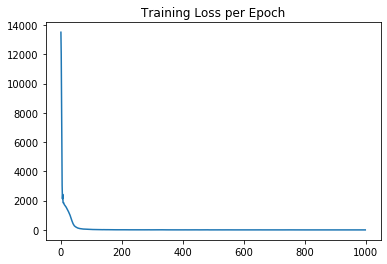

In [1757]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1758]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 11.255426451129729
MAE= 2.4206000514652417
EVS= 0.9471020259483087


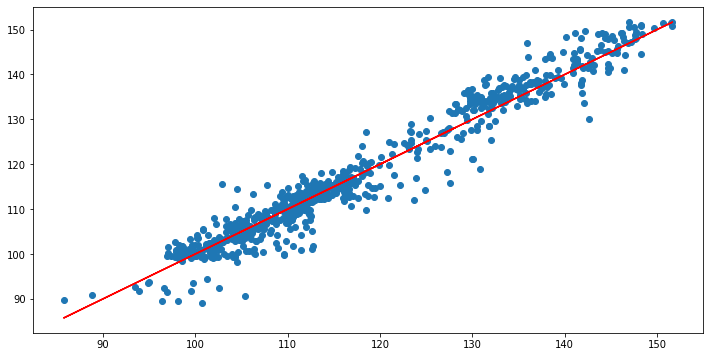

In [1759]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,"r")

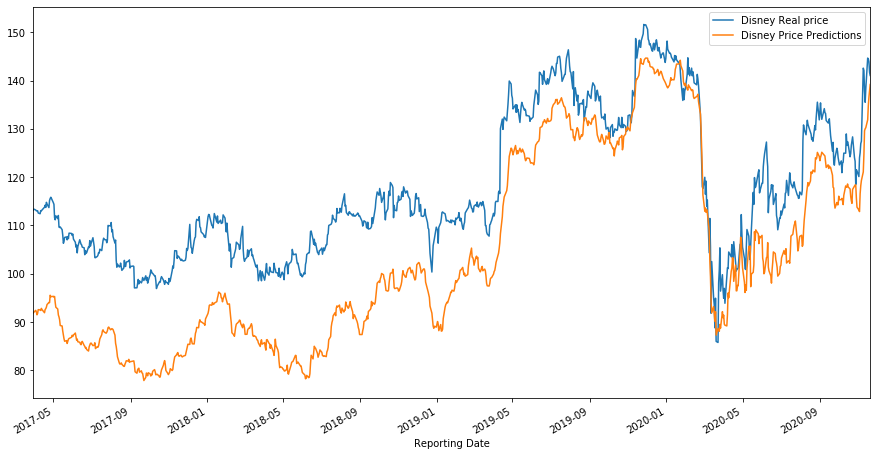

In [1760]:
## PREDICTING THE WHOLE DISNEY DATA FRAME

all_data_to_predict =DISNEY.drop(['DIS'],axis = 1 )
real_stock_prices = DISNEY[['DIS']].rename(columns={"DIS": "Disney Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

real_stock_prices["Disney Price Predictions"] = all_data_predictions
real_stock_prices.plot(figsize = [15,8])

In [1761]:
## PREDICTING DISNEY STOCK PRICE FOT t+1
DISNEY_SEC = ['DIS', 'WRB', 'PAYX', 'TDG', 'SBUX', 'SRE', 'DTE', 'HON', 'LYV', 'FLT', 'MDT', 'KO', 'WM', 'AZO', 'AES']
data = final_finacial_data[['DIS']]

for symbol in DISNEY_SEC:
    for i in range(0,60):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['DIS'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF DISNEY STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF DISNEY STOCK PRICE FOR THE NEXT REPORTING DAY IS: $138.97821044921875 USD


## STARBUCKS

In [1773]:
# CREATING TRAINING DATA SET FOR STARBUCKS
STARBUCKS = training_data_set_gen("SBUX", 0.8, 60)
STARBUCKS .head()

Securities used to predict the price of SBUX: ['SBUX', 'BLL', 'MDLZ', 'HSY', 'WRB', 'WM', 'ECL', 'RSG', 'AZO', 'CMS', 'WEC', 'PG', 'AON', 'ETR', 'AEP', 'MSI', 'TDG', 'CDW', 'EW', 'LNT', 'XEL', 'MCD', 'PEP', 'SYK', 'WLTW', 'MRK', 'AEE', 'COO', 'FISV', 'ES', 'IQV', 'KEYS', 'GPN', 'AWK', 'STE', 'PAYC', 'J', 'EXR', 'FIS', 'AJG', 'DIS', 'AMT', 'VRSK', 'ICE', 'EL', 'MKC', 'MMC', 'GRMN', 'CHD', 'MDT', 'ARE', 'TT', 'MA', 'DOV', 'V', 'PAYX', 'TFX', 'ADI', 'APD', 'INFO', 'ORLY', 'TDY', 'VRSN', 'MAA', 'FLT', 'PLD', 'CPRT', 'YUM', 'COST', 'ZTS', 'INTU', 'CTAS', 'CMG', 'ALLE', 'SRE', 'NEE', 'ABT', 'SO', 'DRE', 'ROP', 'KO', 'ATO', 'AME', 'AES', 'LIN', 'BSX', 'ZBRA', 'CMCSA', 'SBAC', 'LHX', 'KHC', 'VTRS']


SBUX   SBUX t-1   SBUX t-2   SBUX t-3   SBUX t-4  \
Reporting Date                                                          
2017-03-30      58.160000  57.540001  57.349998  57.230000  56.810001   
2017-03-31      58.389999  58.160000  57.540001  57.349998  57.230000   
2017-04-03      58.439999  58.389999  58.160000  57.540001  57.349998   
2017-04-04      58.320000  58.439999  58.389999  58.160000  57.540001   
2017-04-05      58.220001  58.320000  58.439999  58.389999  58.160000   

                 SBUX t-5   SBUX t-6   SBUX t-7   SBUX t-8   SBUX t-9  ...  \
Reporting Date                                                         ...   
2017-03-30      55.849998  55.889999  55.540001  55.810001  55.779999  ...   
2017-03-31      56.810001  55.849998  55.889999  55.540001  55.810001  ...   
2017-04-03      57.230000  56.810001  55.849998  55.889999  55.540001  ...   
2017-04-04      57.349998  57.230000  56.810001  55.849998  55.889999  ...   
2017-04-05      57.540001  57.349998  57.230000  56.810001  55.849998  ...   

                VTRS t-51  VTRS t-52  VTRS t-53  VTRS t-54  VTRS t-55  \
Reporting Date                                                          
2017-03-30      37.070000  36.730000  36.770000  37.279999  38.950001   
2017-03-31      37.189999  37.070000  36.730000  36.770000  37.279999   
2017-04-03      36.950001  37.189999  37.070000  36.730000  36.770000   
2017-04-04      37.070000  36.950001  37.189999  37.070000  36.730000   
2017-04-05      36.029999  37.070000  36.950001  37.189999  37.070000   

                VTRS t-56  VTRS t-57  VTRS t-58  VTRS t-59  VTRS t-60  
Reporting Date                                                         
2017-03-30      38.950001  38.500000  39.160000  39.630001  39.110001  
2017-03-31      38.950001  38.950001  38.500000  39.160000  39.630001  
2017-04-03      37.279999  38.950001  38.950001  38.500000  39.160000  
2017-04-04      36.770000  37.279999  38.950001  38.950001  38.500000  
2017-04-05      36.730000  36.770000  37.279999  38.950001  38.950001  

[5 rows x 5521 columns]

In [1763]:
# Convert Pandas to Numpy for Keras
# Features
X = STARBUCKS.drop(['SBUX'], axis = 1).values
# Label
y = STARBUCKS['SBUX'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1764]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 4315.4585
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 2195.8142
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 725.8647
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 781.5729
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 536.2353
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 561.4956
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 478.9910
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 453.9781
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 409.7234
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 376.9639
Epoch 11/1000
6/6 [==============================] - 0s 2ms/step - loss: 340.1872
Epoch 12/1000
6/6 [==============================] - 0s 2ms/step - loss: 303.6801
Epoch 13/1000
6/6 [====

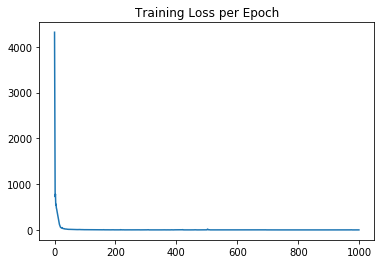

In [1765]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1766]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 3.141349430280155
MAE= 1.2706196567286616
EVS= 0.9845152738276205


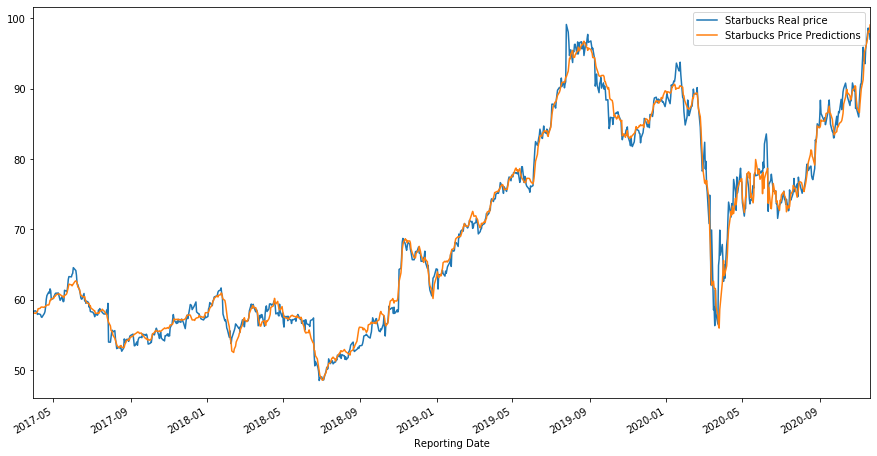

In [1768]:
## PREDICTING THE WHOLE STARBUCKS DATA FRAME

all_data_to_predict =STARBUCKS.drop(['SBUX'],axis = 1 )
real_stock_prices = STARBUCKS[['SBUX']].rename(columns={'SBUX': "Starbucks Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

real_stock_prices["Starbucks Price Predictions"] = all_data_predictions
real_stock_prices.plot(figsize = [15,8])

In [1769]:
## PREDICTING STARBUCKS STOCK PRICE FOT t+1
STARBUCKS_SEC = ['SBUX', 'BLL', 'MDLZ', 'HSY', 'WRB', 'WM', 'ECL', 'RSG', 'AZO', 'CMS', 'WEC', 'PG', 'AON', 'ETR', 'AEP', 'MSI', 'TDG', 'CDW', 'EW', 'LNT', 'XEL', 'MCD', 'PEP', 'SYK', 'WLTW', 'MRK', 'AEE', 'COO', 'FISV', 'ES', 'IQV', 'KEYS', 'GPN', 'AWK', 'STE', 'PAYC', 'J', 'EXR', 'FIS', 'AJG', 'DIS', 'AMT', 'VRSK', 'ICE', 'EL', 'MKC', 'MMC', 'GRMN', 'CHD', 'MDT', 'ARE', 'TT', 'MA', 'DOV', 'V', 'PAYX', 'TFX', 'ADI', 'APD', 'INFO', 'ORLY', 'TDY', 'VRSN', 'MAA', 'FLT', 'PLD', 'CPRT', 'YUM', 'COST', 'ZTS', 'INTU', 'CTAS', 'CMG', 'ALLE', 'SRE', 'NEE', 'ABT', 'SO', 'DRE', 'ROP', 'KO', 'ATO', 'AME', 'AES', 'LIN', 'BSX', 'ZBRA', 'CMCSA', 'SBAC', 'LHX', 'KHC', 'VTRS']
data = final_finacial_data[['SBUX']]

for symbol in STARBUCKS_SEC:
    for i in range(0,60):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['SBUX'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF STARBUCKS STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF STARBUCKS STOCK PRICE FOR THE NEXT REPORTING DAY IS: $98.11241912841797 USD


## FACEBOOK

In [1774]:
# CREATING TRAINING DATA SET FOR FACEBOOK
FACEBOOK = training_data_set_gen("FB", 0.8, 60)
FACEBOOK.head()

Securities used to predict the price of FB: ['FB', 'CTLT', 'NASDAQ', 'DHI', 'MAS', 'BBY', 'MNST', 'PYPL', 'AAPL', 'FMC', 'TER', 'ODFL', 'HD', 'SNPS', 'LRCX', 'KSU', 'GOOGL', 'BIO', 'GOOG', 'QRVO', 'MTD', 'SPGI', 'CDNS', 'ANSS', 'NVDA', 'ITW', 'POOL', 'LOW', 'IDXX', 'SP500', 'MCO', 'A', 'NDAQ', 'SHW', 'WST', 'ADSK', 'KLAC', 'DHR', 'ACN', 'NOW', 'APD', 'ADBE', 'LIN', 'TMO', 'TXN', 'EQIX', 'QCOM', 'PLD', 'TYL', 'AMZN', 'MCHP', 'MSFT', 'ETN', 'PHM', 'EBAY', 'CTAS', 'MSCI', 'ROK', 'AVGO', 'FAST', 'CHTR', 'CRM', 'INFO', 'TGT', 'NVR', 'AMD', 'MXIM', 'BLK', 'CPRT', 'TROW', 'MMC', 'TTWO', 'DRE', 'AME', 'TMUS', 'ZTS', 'PKI', 'MKTX', 'APH', 'NEE', 'HOLX', 'ROP', 'CMG', 'NEM', 'NKE', 'DG', 'RMD', 'LEN', 'ADI', 'WMT', 'EL', 'TT', 'ETSY', 'VAR', 'ARE', 'DE', 'AMAT', 'PCAR', 'ICE', 'KMX', 'SBAC', 'ABT', 'AWK', 'PAYC', 'CCI', 'WBA']


FB      FB t-1      FB t-2      FB t-3      FB t-4  \
Reporting Date                                                               
2017-03-30      142.410004  142.649994  141.759995  140.320007  140.339996   
2017-03-31      142.050003  142.410004  142.649994  141.759995  140.320007   
2017-04-03      142.279999  142.050003  142.410004  142.649994  141.759995   
2017-04-04      141.729996  142.279999  142.050003  142.410004  142.649994   
2017-04-05      141.850006  141.729996  142.279999  142.050003  142.410004   

                    FB t-5      FB t-6      FB t-7      FB t-8      FB t-9  \
Reporting Date                                                               
2017-03-30      139.529999  139.589996  138.509995  139.940002  139.839996   
2017-03-31      140.339996  139.529999  139.589996  138.509995  139.940002   
2017-04-03      140.320007  140.339996  139.529999  139.589996  138.509995   
2017-04-04      141.759995  140.320007  140.339996  139.529999  139.589996   
2017-04-05      142.649994  141.759995  140.320007  140.339996  139.529999   

                ...   WBA t-51   WBA t-52   WBA t-53   WBA t-54   WBA t-55  \
Reporting Date  ...                                                          
2017-03-30      ...  84.220001  83.820000  83.919998  84.430000  82.669998   
2017-03-31      ...  84.120003  84.220001  83.820000  83.919998  84.430000   
2017-04-03      ...  83.489998  84.120003  84.220001  83.820000  83.919998   
2017-04-04      ...  81.720001  83.489998  84.120003  84.220001  83.820000   
2017-04-05      ...  81.550003  81.720001  83.489998  84.120003  84.220001   

                 WBA t-56   WBA t-57   WBA t-58   WBA t-59   WBA t-60  
Reporting Date                                                         
2017-03-30      82.550003  83.099998  83.029999  82.980003  82.959999  
2017-03-31      82.669998  82.550003  83.099998  83.029999  82.980003  
2017-04-03      84.430000  82.669998  82.550003  83.099998  83.029999  
2017-04-04      83.919998  84.430000  82.669998  82.550003  83.099998  
2017-04-05      83.820000  83.919998  84.430000  82.669998  82.550003  

[5 rows x 6361 columns]

In [1775]:
# Convert Pandas to Numpy for Keras
# Features
X = FACEBOOK.drop(['FB'], axis = 1).values
# Label
y = FACEBOOK['FB'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1776]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 35272.8633
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 34675.9492
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 33536.7305
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 31526.6250
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 28098.1133
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 22853.2832
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 15776.9238
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 8219.1201
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 4381.9727
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 5604.8994
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 4776.9839
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step - loss: 4274.8193
Epoch 

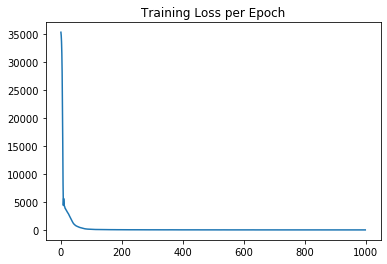

In [1777]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1778]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 39.51082784913524
MAE= 4.641788544862167
EVS= 0.9704439421975956


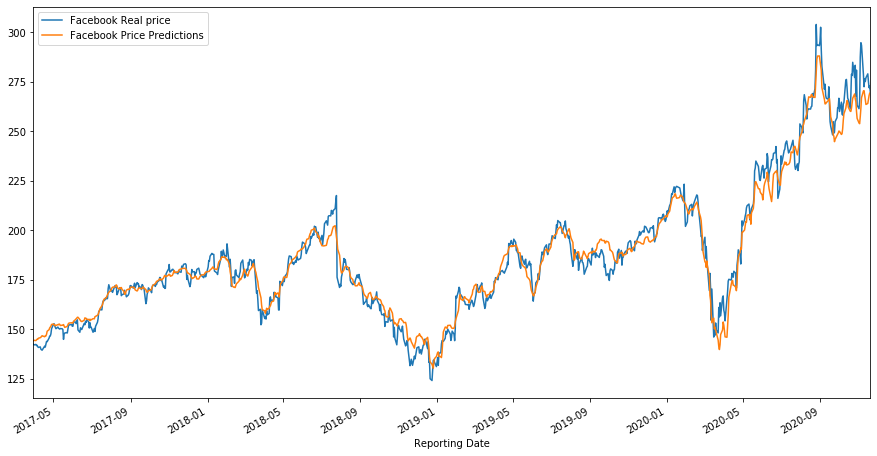

In [1779]:
all_data_to_predict = FACEBOOK.drop(['FB'],axis = 1 )
real_stock_prices = FACEBOOK[['FB']].rename(columns={'FB': "Facebook Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

real_stock_prices["Facebook Price Predictions"] = all_data_predictions
real_stock_prices.plot(figsize = [15,8])

In [1780]:
## PREDICTING FACEBOOK STOCK PRICE FOT t+1
FACEBOOK_SEC = ['FB', 'CTLT', 'NASDAQ', 'DHI', 'MAS', 'BBY', 'MNST', 'PYPL', 'AAPL', 'FMC', 'TER', 'ODFL', 'HD', 'SNPS', 'LRCX', 'KSU', 'GOOGL', 'BIO', 'GOOG', 'QRVO', 'MTD', 'SPGI', 'CDNS', 'ANSS', 'NVDA', 'ITW', 'POOL', 'LOW', 'IDXX', 'SP500', 'MCO', 'A', 'NDAQ', 'SHW', 'WST', 'ADSK', 'KLAC', 'DHR', 'ACN', 'NOW', 'APD', 'ADBE', 'LIN', 'TMO', 'TXN', 'EQIX', 'QCOM', 'PLD', 'TYL', 'AMZN', 'MCHP', 'MSFT', 'ETN', 'PHM', 'EBAY', 'CTAS', 'MSCI', 'ROK', 'AVGO', 'FAST', 'CHTR', 'CRM', 'INFO', 'TGT', 'NVR', 'AMD', 'MXIM', 'BLK', 'CPRT', 'TROW', 'MMC', 'TTWO', 'DRE', 'AME', 'TMUS', 'ZTS', 'PKI', 'MKTX', 'APH', 'NEE', 'HOLX', 'ROP', 'CMG', 'NEM', 'NKE', 'DG', 'RMD', 'LEN', 'ADI', 'WMT', 'EL', 'TT', 'ETSY', 'VAR', 'ARE', 'DE', 'AMAT', 'PCAR', 'ICE', 'KMX', 'SBAC', 'ABT', 'AWK', 'PAYC', 'CCI', 'WBA']
data = final_finacial_data[['FB']]

for symbol in FACEBOOK_SEC:
    for i in range(0,60):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['FB'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF FACEBOOK STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF FACEBOOK STOCK PRICE FOR THE NEXT REPORTING DAY IS: $267.9388732910156 USD


## BANK OF AMERICA

In [1784]:
# CREATING TRAINING DATA SET FOR BANCK OF AMERICA
BANK_OF_AMERICA = training_data_set_gen("BAC", 0.8, 60)
BANK_OF_AMERICA.head()

Securities used to predict the price of BAC: ['BAC', 'JPM', 'MAR', 'PNC', 'GL', 'TFC', 'RJF', 'RTX', 'FLIR', 'NTRS', 'EMR', 'VFC', 'AFL']


BAC    BAC t-1    BAC t-2    BAC t-3    BAC t-4  \
Reporting Date                                                          
2017-03-30      23.870001  23.350000  23.480000  23.030001  23.120001   
2017-03-31      23.590000  23.870001  23.350000  23.480000  23.030001   
2017-04-03      23.590000  23.590000  23.870001  23.350000  23.480000   
2017-04-04      23.440001  23.590000  23.590000  23.870001  23.350000   
2017-04-05      23.170000  23.440001  23.590000  23.590000  23.870001   

                  BAC t-5    BAC t-6    BAC t-7    BAC t-8    BAC t-9  ...  \
Reporting Date                                                         ...   
2017-03-30      23.070000  22.940001  23.020000  24.440001  24.860001  ...   
2017-03-31      23.120001  23.070000  22.940001  23.020000  24.440001  ...   
2017-04-03      23.030001  23.120001  23.070000  22.940001  23.020000  ...   
2017-04-04      23.480000  23.030001  23.120001  23.070000  22.940001  ...   
2017-04-05      23.350000  23.480000  23.030001  23.120001  23.070000  ...   

                 AFL t-51   AFL t-52   AFL t-53   AFL t-54   AFL t-55  \
Reporting Date                                                          
2017-03-30      34.939999  34.820000  34.785000  34.930000  34.715000   
2017-03-31      34.985001  34.939999  34.820000  34.785000  34.930000   
2017-04-03      34.730000  34.985001  34.939999  34.820000  34.785000   
2017-04-04      35.040001  34.730000  34.985001  34.939999  34.820000   
2017-04-05      34.674999  35.040001  34.730000  34.985001  34.939999   

                 AFL t-56   AFL t-57   AFL t-58   AFL t-59   AFL t-60  
Reporting Date                                                         
2017-03-30      34.759998  35.095001  34.974998  35.205002  34.884998  
2017-03-31      34.715000  34.759998  35.095001  34.974998  35.205002  
2017-04-03      34.930000  34.715000  34.759998  35.095001  34.974998  
2017-04-04      34.785000  34.930000  34.715000  34.759998  35.095001  
2017-04-05      34.820000  34.785000  34.930000  34.715000  34.759998  

[5 rows x 781 columns]

In [1785]:
# Convert Pandas to Numpy for Keras
# Features
X = BANK_OF_AMERICA.drop(['BAC'], axis = 1).values
# Label
y = BANK_OF_AMERICA['BAC'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1786]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 0s 1ms/step - loss: 755.9511
Epoch 2/1000
6/6 [==============================] - 0s 949us/step - loss: 658.0554
Epoch 3/1000
6/6 [==============================] - 0s 949us/step - loss: 488.4762
Epoch 4/1000
6/6 [==============================] - 0s 918us/step - loss: 255.3280
Epoch 5/1000
6/6 [==============================] - 0s 959us/step - loss: 64.2835
Epoch 6/1000
6/6 [==============================] - 0s 863us/step - loss: 82.8277
Epoch 7/1000
6/6 [==============================] - 0s 914us/step - loss: 57.5992
Epoch 8/1000
6/6 [==============================] - 0s 892us/step - loss: 40.3493
Epoch 9/1000
6/6 [==============================] - 0s 967us/step - loss: 47.6008
Epoch 10/1000
6/6 [==============================] - 0s 957us/step - loss: 37.4639
Epoch 11/1000
6/6 [==============================] - 0s 1ms/step - loss: 37.6881
Epoch 12/1000
6/6 [==============================] - 0s 1ms/step - loss: 37.2358
Epoch 13/1000
6

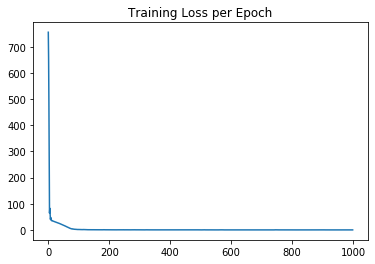

In [1787]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1788]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 0.8838153710345147
MAE= 0.6799288728962773
EVS= 0.9363996632469148


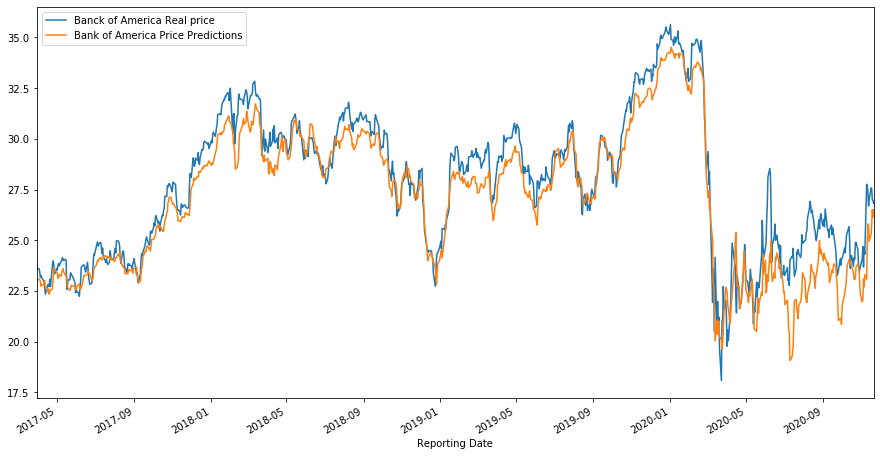

In [1789]:
all_data_to_predict = BANK_OF_AMERICA.drop(['BAC'],axis = 1 )
real_stock_prices = BANK_OF_AMERICA[['BAC']].rename(columns={'BAC': "Banck of America Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

real_stock_prices["Bank of America Price Predictions"] = all_data_predictions
real_stock_prices.plot(figsize = [15,8])

In [1790]:
## PREDICTING Bank of America STOCK PRICE FOT t+1
BANK_OF_AMER_SEC = ['BAC', 'JPM', 'MAR', 'PNC', 'GL', 'TFC', 'RJF', 'RTX', 'FLIR', 'NTRS', 'EMR', 'VFC', 'AFL']
data = final_finacial_data[['BAC']]

for symbol in BANK_OF_AMER_SEC:
    for i in range(0,60):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['BAC'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF BANK OF AMERICA STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF BANK OF AMERICA STOCK PRICE FOR THE NEXT REPORTING DAY IS: $25.682384490966797 USD


## NETFLIX

In [1797]:
# CREATING TRAINING DATA SET FOR NETFLIX
NETFLIX = training_data_set_gen("NFLX", 0.8, 60)
NETFLIX.head()

Securities used to predict the price of NFLX: ['NFLX', 'AMZN', 'ADBE', 'DPZ', 'CRM', 'ISRG', 'UNH', 'PGR', 'ADSK', 'PYPL', 'ROL', 'NOW', 'EXPD', 'NASDAQ', 'ETSY', 'INTU', 'NDAQ', 'JKHY', 'FTNT', 'ODFL', 'ABT', 'PKI', 'MSFT', 'CTXS', 'MSCI', 'IDXX', 'SPGI', 'GOOG', 'NKE', 'ANSS', 'GOOGL', 'MCO', 'TMO', 'BIO', 'ZBRA', 'HUM', 'ROP', 'MA', 'VRSK', 'BR', 'HD', 'ACN', 'UNP', 'VRTX', 'ZTS', 'V', 'ILMN', 'POOL', 'TYL', 'AKAM', 'RMD', 'LIN', 'TXN', 'CDNS', 'FAST', 'BBY', 'CPRT', 'DG', 'STE', 'TSCO', 'TROW', 'DHR', 'IEX', 'LOW', 'VRSN', 'TTWO', 'CTAS', 'SP500', 'A', 'EL', 'SNPS', 'AJG', 'PAYC', 'COST', 'MXIM', 'LLY', 'NEE', 'NSC', 'CTLT', 'AAPL', 'TWTR', 'CSX', 'DXCM', 'MKC', 'AMD', 'GWW', 'ICE', 'SBAC', 'WMT', 'NVDA', 'SHW', 'FIS', 'MO', 'AIG', 'DISH', 'NWL', 'VNO', 'BEN', 'WBA', 'GE', 'NLSN', 'ALK', 'TAP']


NFLX    NFLX t-1    NFLX t-2    NFLX t-3    NFLX t-4  \
Reporting Date                                                               
2017-03-30      148.059998  146.470001  145.169998  144.059998  142.020004   
2017-03-31      147.809998  148.059998  146.470001  145.169998  144.059998   
2017-04-03      146.919998  147.809998  148.059998  146.470001  145.169998   
2017-04-04      145.500000  146.919998  147.809998  148.059998  146.470001   
2017-04-05      143.619995  145.500000  146.919998  147.809998  148.059998   

                  NFLX t-5    NFLX t-6    NFLX t-7    NFLX t-8    NFLX t-9  \
Reporting Date                                                               
2017-03-30      141.839996  142.649994  142.419998  145.830002  145.110001   
2017-03-31      142.020004  141.839996  142.649994  142.419998  145.830002   
2017-04-03      144.059998  142.020004  141.839996  142.649994  142.419998   
2017-04-04      145.169998  144.059998  142.020004  141.839996  142.649994   
2017-04-05      146.470001  145.169998  144.059998  142.020004  141.839996   

                ...   TAP t-51   TAP t-52   TAP t-53   TAP t-54   TAP t-55  \
Reporting Date  ...                                                          
2017-03-30      ...  97.910004  97.620003  95.430000  95.669998  96.410004   
2017-03-31      ...  98.199997  97.910004  97.620003  95.430000  95.669998   
2017-04-03      ...  97.540001  98.199997  97.910004  97.620003  95.430000   
2017-04-04      ...  97.620003  97.540001  98.199997  97.910004  97.620003   
2017-04-05      ...  96.190002  97.620003  97.540001  98.199997  97.910004   

                 TAP t-56   TAP t-57   TAP t-58   TAP t-59   TAP t-60  
Reporting Date                                                         
2017-03-30      98.279999  99.790001  99.680000  99.410004  97.879997  
2017-03-31      96.410004  98.279999  99.790001  99.680000  99.410004  
2017-04-03      95.669998  96.410004  98.279999  99.790001  99.680000  
2017-04-04      95.430000  95.669998  96.410004  98.279999  99.790001  
2017-04-05      97.620003  95.430000  95.669998  96.410004  98.279999  

[5 rows x 6181 columns]

In [1798]:
# Convert Pandas to Numpy for Keras
# Features
X = NETFLIX.drop(['NFLX'], axis = 1).values
# Label
y = NETFLIX['NFLX'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1799]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 110021.8906
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 103809.5859
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 90884.5625
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 68737.9297
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 40318.6484
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 11888.5498
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 6950.3247
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 8236.8828
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 4322.2651
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 4780.6899
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 3838.5579
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step - loss: 3505.2107
Epoch

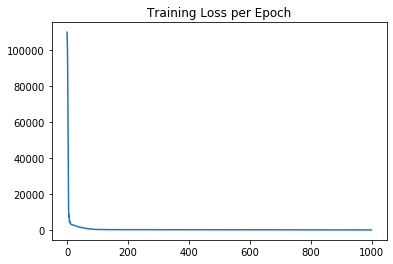

In [1800]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1801]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 217.10877202568278
MAE= 10.646717983743418
EVS= 0.9806441676813663


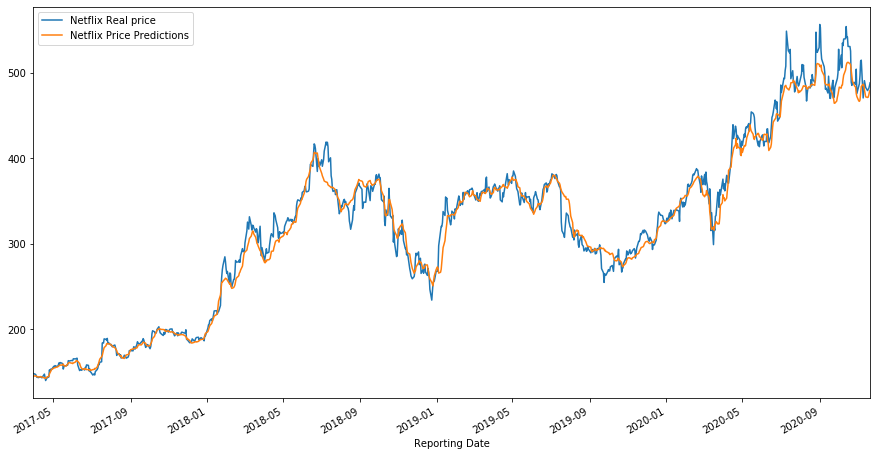

In [1802]:
all_data_to_predict = NETFLIX.drop(['NFLX'],axis = 1 )
real_stock_prices = NETFLIX[['NFLX']].rename(columns={'NFLX': "Netflix Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

real_stock_prices["Netflix Price Predictions"] = all_data_predictions
real_stock_prices.plot(figsize = [15,8])

In [1803]:
## PREDICTING Netflix STOCK PRICE FOT t+1
NETFLIX_SEC = ['NFLX', 'AMZN', 'ADBE', 'DPZ', 'CRM', 'ISRG', 'UNH', 'PGR', 'ADSK', 'PYPL', 'ROL', 'NOW', 'EXPD', 'NASDAQ', 'ETSY', 'INTU', 'NDAQ', 'JKHY', 'FTNT', 'ODFL', 'ABT', 'PKI', 'MSFT', 'CTXS', 'MSCI', 'IDXX', 'SPGI', 'GOOG', 'NKE', 'ANSS', 'GOOGL', 'MCO', 'TMO', 'BIO', 'ZBRA', 'HUM', 'ROP', 'MA', 'VRSK', 'BR', 'HD', 'ACN', 'UNP', 'VRTX', 'ZTS', 'V', 'ILMN', 'POOL', 'TYL', 'AKAM', 'RMD', 'LIN', 'TXN', 'CDNS', 'FAST', 'BBY', 'CPRT', 'DG', 'STE', 'TSCO', 'TROW', 'DHR', 'IEX', 'LOW', 'VRSN', 'TTWO', 'CTAS', 'SP500', 'A', 'EL', 'SNPS', 'AJG', 'PAYC', 'COST', 'MXIM', 'LLY', 'NEE', 'NSC', 'CTLT', 'AAPL', 'TWTR', 'CSX', 'DXCM', 'MKC', 'AMD', 'GWW', 'ICE', 'SBAC', 'WMT', 'NVDA', 'SHW', 'FIS', 'MO', 'AIG', 'DISH', 'NWL', 'VNO', 'BEN', 'WBA', 'GE', 'NLSN', 'ALK', 'TAP']
data = final_finacial_data[['NFLX']]

for symbol in NETFLIX_SEC:
    for i in range(0,60):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['NFLX'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF NETFLIX STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF NETFLIX STOCK PRICE FOR THE NEXT REPORTING DAY IS: $479.5888366699219 USD


## AMERICAN AIRLINES

In [1804]:
# CREATING TRAINING DATA SET FOR AMERICAN AIRLINES
AMERICAN_AIRLINES = training_data_set_gen("AAL", 0.8, 60)
AMERICAN_AIRLINES.head()

Securities used to predict the price of AAL: ['AAL', 'UNM', 'IVZ', 'CCL', 'LNC', 'BEN', 'PRU', 'SLB', 'HAL', 'MHK', 'DD', 'PBCT', 'NLSN', 'VTRS', 'IP', 'F', 'FTI', 'TPR', 'CXO', 'WRK', 'SLG', 'GD', 'MO', 'TAP', 'WFC', 'PFG', 'APA', 'XOM', 'VNO', 'AIG', 'WMB', 'DXC', 'DVN', 'BK', 'OXY', 'WBA', 'NOV', '30 year Tbond', 'MMM', 'WDC', 'LUV', 'PXD', 'HST', 'HBI', 'NUE', '20 year Tbond', 'KHC', 'MGM', 'MTB', 'EOG', 'FANG', 'ALK', 'NCLH', 'IRM', 'CMA', '10 year Tbond', 'PVH', 'KEY', 'GPS', 'PRGO', 'CFG', 'STT', 'ROP', 'LIN', 'KLAC', 'SHW', 'DLR', 'DRE', 'AZO', 'ICE', 'CMS', 'AAPL', 'CRM', 'GRMN', 'TDY', 'PGR', 'PG', 'ECL', 'NKE', 'FIS', 'JKHY', 'AEE', 'VRTX', 'CPRT', 'NASDAQ', 'PYPL', 'ADSK', 'INFO', 'ODFL', 'AJG', 'APD', 'ETSY', 'IDXX', 'EQIX', 'PLD', 'VRSN', 'TGT', 'TSCO', 'WMT', 'ORLY', 'CTXS', 'EW', 'WST', 'AMZN', 'V', 'FAST', 'MCO', 'ES', 'NDAQ', 'MA', 'BLL', 'ZBRA', 'POOL', 'TYL', 'XEL', 'INTU', 'ANSS', 'SPGI', 'AKAM', 'WEC', 'KEYS', 'BIO', 'TMUS', 'SNPS', 'STE', 'CHD', 'PAYC', 'CDNS', '

AAL    AAL t-1    AAL t-2    AAL t-3    AAL t-4  \
Reporting Date                                                          
2017-03-30      42.540001  41.959999  42.599998  41.740002  41.730000   
2017-03-31      42.299999  42.540001  41.959999  42.599998  41.740002   
2017-04-03      42.450001  42.299999  42.540001  41.959999  42.599998   
2017-04-04      40.900002  42.450001  42.299999  42.540001  41.959999   
2017-04-05      41.310001  40.900002  42.450001  42.299999  42.540001   

                  AAL t-5    AAL t-6    AAL t-7    AAL t-8    AAL t-9  ...  \
Reporting Date                                                         ...   
2017-03-30      41.410000  40.349998  40.419998  41.700001  41.720001  ...   
2017-03-31      41.730000  41.410000  40.349998  40.419998  41.700001  ...   
2017-04-03      41.740002  41.730000  41.410000  40.349998  40.419998  ...   
2017-04-04      42.599998  41.740002  41.730000  41.410000  40.349998  ...   
2017-04-05      41.959999  42.599998  41.740002  41.730000  41.410000  ...   

                 LLY t-51   LLY t-52   LLY t-53   LLY t-54   LLY t-55  \
Reporting Date                                                          
2017-03-30      76.849998  77.400002  77.150002  75.260002  76.269997   
2017-03-31      77.529999  76.849998  77.400002  77.150002  75.260002   
2017-04-03      76.839996  77.529999  76.849998  77.400002  77.150002   
2017-04-04      76.809998  76.839996  77.529999  76.849998  77.400002   
2017-04-05      76.320000  76.809998  76.839996  77.529999  76.849998   

                 LLY t-56   LLY t-57   LLY t-58   LLY t-59   LLY t-60  
Reporting Date                                                         
2017-03-30      76.269997  75.669998  75.589996  74.720001  74.599998  
2017-03-31      76.269997  76.269997  75.669998  75.589996  74.720001  
2017-04-03      75.260002  76.269997  76.269997  75.669998  75.589996  
2017-04-04      77.150002  75.260002  76.269997  76.269997  75.669998  
2017-04-05      77.400002  77.150002  75.260002  76.269997  76.269997  

[5 rows x 9301 columns]

In [1805]:
# Convert Pandas to Numpy for Keras
# Features
X = AMERICAN_AIRLINES.drop(['AAL'], axis = 1).values
# Label
y = AMERICAN_AIRLINES['AAL'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1806]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs= 1000)

Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 925.6149
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 172.3509
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 32.9828
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 37.2292
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 29.6566
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 19.8346
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 24.2208
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 20.0683
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 20.5089
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 16.1300
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 13.6960
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step - loss: 12.8890
Epoch 13/1000
6/6 [================

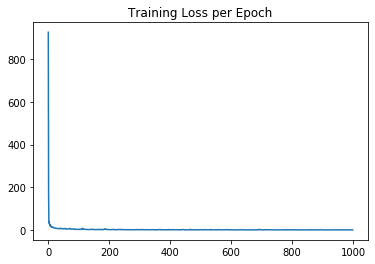

In [1807]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [1808]:
predictions = model.predict(X_test)
print("MSE=" , mean_squared_error(y_test,predictions))
print("MAE=", mean_absolute_error(y_test,predictions))
print("EVS=", explained_variance_score(y_test,predictions))

MSE= 1.724603118087279
MAE= 0.9844215279040129
EVS= 0.9912992066150061


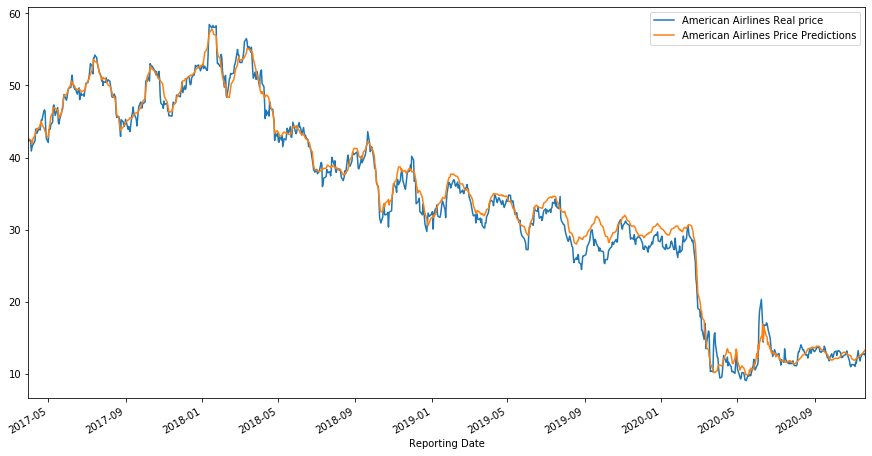

In [1809]:
all_data_to_predict = AMERICAN_AIRLINES.drop(['AAL'],axis = 1 )
real_stock_prices = AMERICAN_AIRLINES[['AAL']].rename(columns={'AAL': "American Airlines Real price"})
## SCALING THE DATA
scaler.fit(all_data_to_predict)
all_data_to_predict = scaler.transform(all_data_to_predict)

all_data_predictions =  model.predict(all_data_to_predict)

real_stock_prices["American Airlines Price Predictions"] = all_data_predictions
real_stock_prices.plot(figsize = [15,8])

In [1810]:
## PREDICTING NAmerican Aillines STOCK PRICE FOT t+1
AMERICAN_AILINES_SEC = ['AAL', 'UNM', 'IVZ', 'CCL', 'LNC', 'BEN', 'PRU', 'SLB', 'HAL', 'MHK', 'DD', 'PBCT', 'NLSN', 'VTRS', 'IP', 'F', 'FTI', 'TPR', 'CXO', 'WRK', 'SLG', 'GD', 'MO', 'TAP', 'WFC', 'PFG', 'APA', 'XOM', 'VNO', 'AIG', 'WMB', 'DXC', 'DVN', 'BK', 'OXY', 'WBA', 'NOV', '30 year Tbond', 'MMM', 'WDC', 'LUV', 'PXD', 'HST', 'HBI', 'NUE', '20 year Tbond', 'KHC', 'MGM', 'MTB', 'EOG', 'FANG', 'ALK', 'NCLH', 'IRM', 'CMA', '10 year Tbond', 'PVH', 'KEY', 'GPS', 'PRGO', 'CFG', 'STT', 'ROP', 'LIN', 'KLAC', 'SHW', 'DLR', 'DRE', 'AZO', 'ICE', 'CMS', 'AAPL', 'CRM', 'GRMN', 'TDY', 'PGR', 'PG', 'ECL', 'NKE', 'FIS', 'JKHY', 'AEE', 'VRTX', 'CPRT', 'NASDAQ', 'PYPL', 'ADSK', 'INFO', 'ODFL', 'AJG', 'APD', 'ETSY', 'IDXX', 'EQIX', 'PLD', 'VRSN', 'TGT', 'TSCO', 'WMT', 'ORLY', 'CTXS', 'EW', 'WST', 'AMZN', 'V', 'FAST', 'MCO', 'ES', 'NDAQ', 'MA', 'BLL', 'ZBRA', 'POOL', 'TYL', 'XEL', 'INTU', 'ANSS', 'SPGI', 'AKAM', 'WEC', 'KEYS', 'BIO', 'TMUS', 'SNPS', 'STE', 'CHD', 'PAYC', 'CDNS', 'TMO', 'ABT', 'CLX', 'DHR', 'ADBE', 'DPZ', 'ZTS', 'AWK', 'NEE', 'MKC', 'AMD', 'VRSK', 'MKTX', 'RMD', 'NOW', 'CMG', 'CCI', 'AMT', 'SBAC', 'FTNT', 'COST', 'MSFT', 'HRL', 'MSCI', 'DG', 'DXCM', 'LLY']
data = final_finacial_data[['AAL']]

for symbol in AMERICAN_AILINES_SEC:
    for i in range(0,60):
        data[f'{symbol}t-{i+1}'] = final_finacial_data[[symbol]].shift(i)
        
data_to_predict = data.drop(['AAL'],axis = 1)
data_to_predict.dropna(axis=0, how='any', inplace= True)
scaler.fit(data_to_predict)
data_to_predict = scaler.transform(data_to_predict)
next_day_prediction =  model.predict(data_to_predict)
print(f'THE PREDICTION OF AMERICAN AIRLINES STOCK PRICE FOR THE NEXT REPORTING DAY IS: ${next_day_prediction[-1][0]} USD')

THE PREDICTION OF AMERICAN AIRLINES STOCK PRICE FOR THE NEXT REPORTING DAY IS: $13.32202434539795 USD


# CALCULATING THE VALUE OF MY PORTFOLIO FOR THE NEXT REPORTING DAY  
 - Buying 50 units of each stock: DISNEY, STARBUCKS, FACEBOOK, BANK OF AMERICA, NETFLIX, AMERICAN AIRLINES

In [1850]:
def return_on_investment(investment_date):

    ## GETTING THE DATA
    # Symbols
    porfolio_stocks = ["DIS", "SBUX", "FB", "BAC", "NFLX", "AAL"]
    # Predicted prices
    predicted_prices = [138.97821044921875, 98.11241912841797, 267.9388732910156, 25.682384490966797,479.5888366699219,13.32202434539795]

    # Real prices of 10 datys ago for the same stocks
    historical_prices = final_finacial_data.set_index('Reporting Date')[porfolio_stocks]
    historical_prices = historical_prices.reset_index()
    historical_prices = historical_prices[historical_prices['Reporting Date'] == investment_date].drop(['Reporting Date'], axis = 1)
    historical_prices_list = []
    for column in historical_prices.columns:
        for price in historical_prices[column]:
            historical_prices_list.append(price)

    ## GENRATING ROI DATA FRAME

    ROI_df = pd.DataFrame({'Stock':porfolio_stocks ,f'Price of {investment_date}': historical_prices_list, 'Predicted proces for next reporting date': predicted_prices})
    ROI_df[f'Stock units value on {investment_date}'] = ROI_df[f'Price of {investment_date}'].apply(lambda x: x * 50)
    ROI_df[f'Stock units predicted value on next reporting day'] = ROI_df['Predicted proces for next reporting date'].apply(lambda x: x * 50)
    ROI_df['Proffit/loss'] = ROI_df['Predicted proces for next reporting date'] - ROI_df[f'Price of {investment_date}']
    return ROI_df['Proffit/loss'].sum()

In [1862]:
print('Predicted return of investment: ', return_on_investment('2020-06-10'))
print('Predicted return of investment: ', return_on_investment('2020-07-10'))
print('Predicted return of investment: ', return_on_investment('2020-08-10'))
print('Predicted return of investment: ', return_on_investment('2020-09-14'))
print('Predicted return of investment: ', return_on_investment('2020-10-14'))

Predicted return of investment:  107.60273838043213
Predicted return of investment:  0.23276329040527344
Predicted return of investment:  30.422749519348145
Predicted return of investment:  24.322747230529785
Predicted return of investment:  -41.527265548706055


Text(0.5, 1.0, 'Predicted Return on investment of my porfolio in next future reporting date based on investment date')

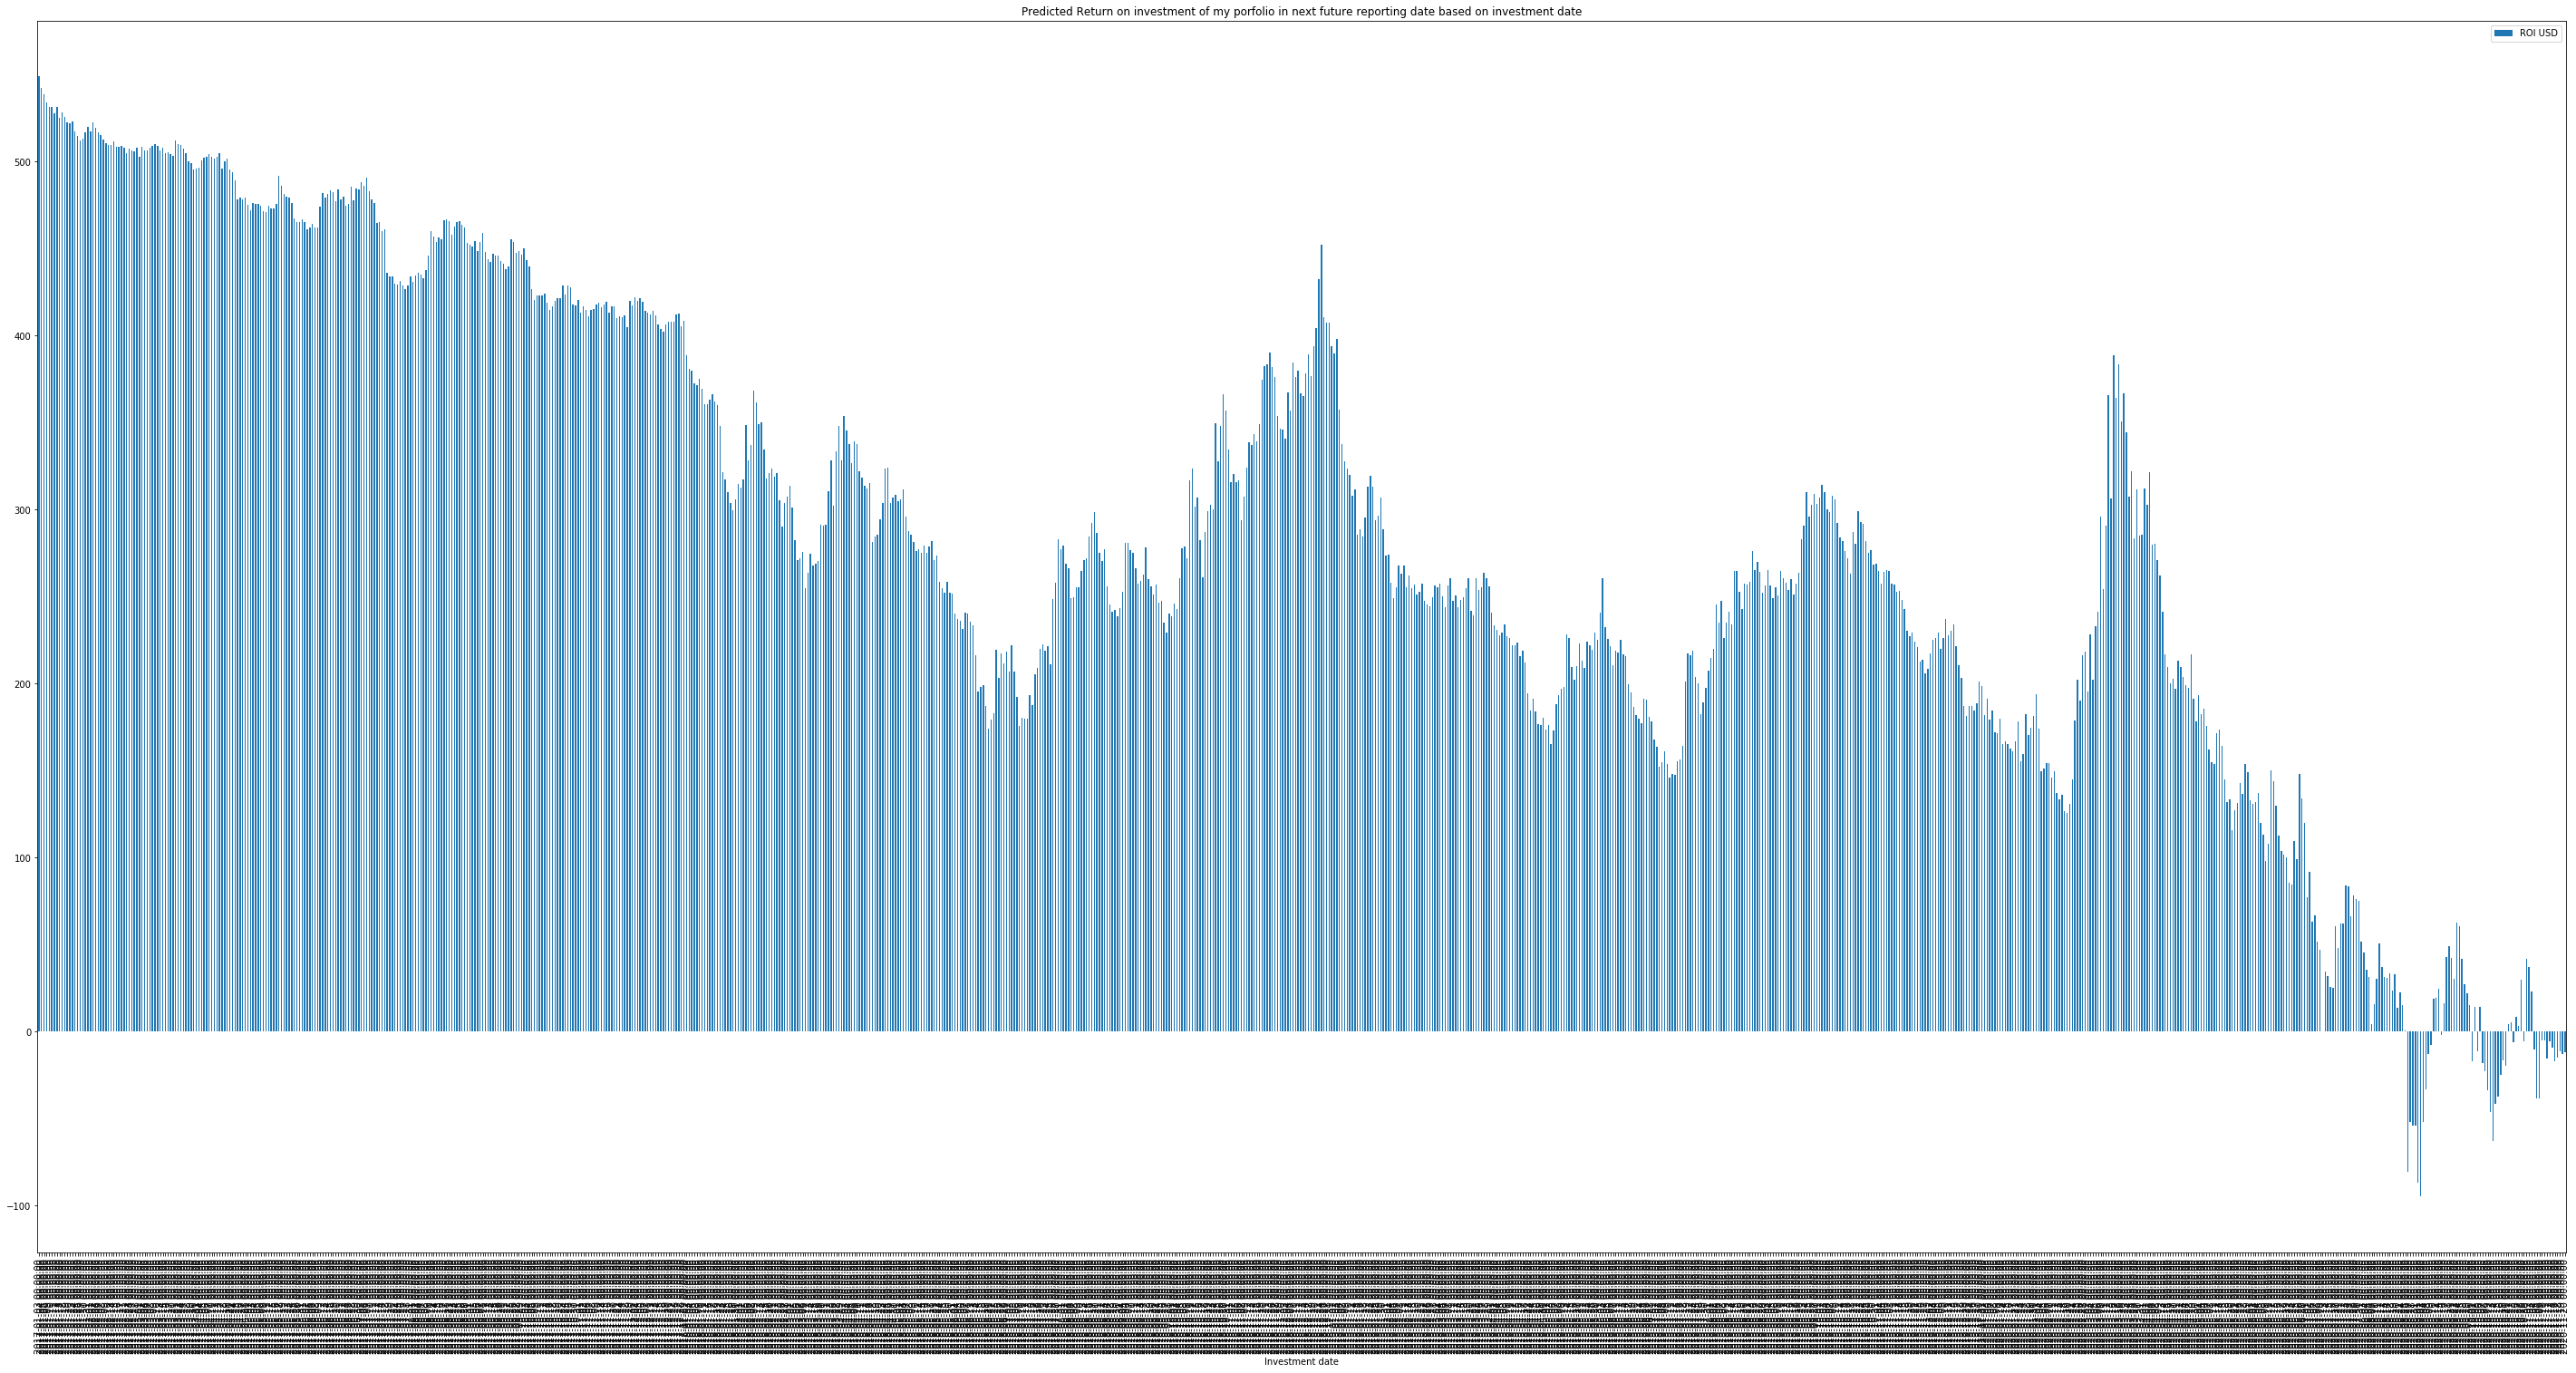

In [1877]:
list_dates = [i for i in final_finacial_data["Reporting Date"]]
ROIS = []
for date in final_finacial_data["Reporting Date"]:
    ROI = return_on_investment(date)
    ROIS.append(ROI)
    
ROI_prediction_evol = pd.DataFrame({"Investment date":list_dates, "ROI USD":ROIS})
ROI_prediction_evol.set_index("Investment date").plot(kind = "bar", figsize = [50,25])
plt.title("Predicted Return on investment of my porfolio in next future reporting date based on investment date")

    

# FINAL COMMENTS 

## Comments on data collection
1) Getting the data set was not hard at all, but dealing with the data was very challenging, a lot of null values, lot of dates that were not suposed to report closing prices

2) A good relfection I did during this project is that if you are dealing with huge data sets (many columns) it is better to build functions to do your exploratory data analysis. In this case I created a function to calculate correlations, returns, stock prices evolutions and generation of different training data sets per stock with a variety of parameters

## Comments on the model
1) I decided to use Deep Learning Sequential Neural Network since it was the algorithm with the best prediction results. During my first tests I tried with: Regression, Decission Tree, Random Forest In the most of cases, ANN had the lowest Mean Squared Errors

## Comments on the results
1) We can see that we have a healty porfolio. Obiously if we invested months ago, we would have a larger predicted return of investment. But in most part of cases, Our ANN is showing a t+1 positive return

Disney
-------> Prediction: 138.98, Closing price 23-11-2020: 145.98

Starbucks
-------> Prediction: 98.11, Closing price 23-11-2020: 96.88

Facebook
-------> Prediction: 267.94, Closing price 23-11-2020: 268.43

Bank of America
-------> Prediction: 25.68, Closing price 23-11-2020: 27.39

Netflix
-------> Prediction: 479.58, Closing price 23-11-2020: 476.62

American Airlines
-------> Prediction: 13.32, Closing price 23-11-2020: 13.56